In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74263, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.29842,1.29803,1.29777,1.29863
2020-01-01 17:15:00,1.29845,1.29816,1.29796,1.29845
2020-01-01 17:30:00,1.29817,1.29803,1.29803,1.29824
2020-01-01 17:45:00,1.29804,1.29847,1.29804,1.29852
2020-01-01 18:00:00,1.29853,1.29765,1.29753,1.29853


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74262, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29803,1.29777,1.29863,1.29816,17,2,1,0.00039,1.298200,0.00086,1.298212
2020-01-01 17:15:00,1.29845,1.29816,1.29796,1.29845,1.29803,17,2,1,0.00029,1.298205,0.00049,1.298255
2020-01-01 17:30:00,1.29817,1.29803,1.29803,1.29824,1.29847,17,2,1,0.00014,1.298135,0.00021,1.298118
2020-01-01 17:45:00,1.29804,1.29847,1.29804,1.29852,1.29765,17,2,1,-0.00043,1.298280,0.00048,1.298268
2020-01-01 18:00:00,1.29853,1.29765,1.29753,1.29853,1.29761,18,2,1,0.00088,1.298030,0.00100,1.298060


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29803,1.29777,1.29863,1.29816,17,2,1,0.00039,1.298200,0.00086,1.298212,-25.516733
2020-01-01 17:15:00,1.29845,1.29816,1.29796,1.29845,1.29803,17,2,1,0.00029,1.298205,0.00049,1.298255,-25.516838
2020-01-01 17:30:00,1.29817,1.29803,1.29803,1.29824,1.29847,17,2,1,0.00014,1.298135,0.00021,1.298118,-25.516838
2020-01-01 17:45:00,1.29804,1.29847,1.29804,1.29852,1.29765,17,2,1,-0.00043,1.298280,0.00048,1.298268,-25.516790
2020-01-01 18:00:00,1.29853,1.29765,1.29753,1.29853,1.29761,18,2,1,0.00088,1.298030,0.00100,1.298060,-25.517239


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29777  1.29863         1.29816    17    2   
2020-01-01 17:15:00  1.29845  1.29796  1.29845         1.29803    17    2   
2020-01-01 17:30:00  1.29817  1.29803  1.29824         1.29847    17    2   
2020-01-01 17:45:00  1.29804  1.29804  1.29852         1.29765    17    2   
2020-01-01 18:00:00  1.29853  1.29753  1.29853         1.29761    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00039   1.298200  0.00086    1.298212 -25.516733  
2020-01-01 17:15:00     1   0.00029   1.298205  0.00049    1.298255 -25.516838  
2020-01-01 17:30:00     1   0.00014   1.298135  0.00021    1.298118 -25.516838  
2020-01-01 17:45:00     1  -0.00043   1.298280  0.00048

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59409
59409
7500
7500
7353
7353


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape

(59409, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59384, 24, 12)
(7475, 24, 12)
(7328, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59384, 1)
(7475, 1)
(7328, 1)


array([[0.36816883],
       [0.36865902],
       [0.36877203],
       ...,
       [0.29607248],
       [0.29486656],
       [0.2973919 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.36816883, 0.36865902, 0.36877203, ..., 0.29607248, 0.29486656,
       0.2973919 ], dtype=float32)

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 654.8864 - mae: 6.4108 - mse: 654.8864 - root_mean_squared_error: 25.5907 - mape: 35122.0898
Epoch 1: val_mse improved from inf to 0.14267, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 205s 402ms/step - loss: 654.8864 - mae: 6.4108 - mse: 654.8864 - root_mean_squared_error: 25.5907 - mape: 35122.0898 - val_loss: 0.1427 - val_mae: 0.3228 - val_mse: 0.1427 - val_root_mean_squared_error: 0.3777 - val_mape: 114887.2031
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.1542 - mae: 0.3478 - mse: 0.1542 - root_mean_squared_error: 0.3926 - mape: 10488.4131
Epoch 2: val_mse improved from 0.14267 to 0.04310, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 177s 381ms/step - loss: 0.1542 - mae: 0.3478 - mse: 0.1542 - root_mean_squared_error: 0.3926 - mape: 10488.4131 - val_loss: 0.0431 - val_mae: 0.1580 - val_mse: 0.0431 - val_root_mean_squared_error: 0.2076 - val_mape: 70240.6875
Epoch 3/75
464/464 [==============================] - ETA: 0s - loss: 0.0557 - mae: 0.2042 - mse: 0.0557 - root_mean_squared_error: 0.2360 - mape: 7039.4937
Epoch 3: val_mse did not improve from 0.04310
464/464 [==============================] - 135s 291ms/step - loss: 0.0557 - mae: 0.2042 - mse: 0.0557 - root_mean_squared_error: 0.2360 - mape: 7039.4937 - val_loss: 0.0574 - val_mae: 0.1982 - val_mse: 0.0574 - val_root_mean_squared_error: 0.2395 - val_mape: 55591.9102
Epoch 4/75
464/464 [==============================] - ETA: 0s - loss: 0.0412 - mae: 0.1716 - mse: 0.0412 - root_mean_squared_error: 0.2030 - mape: 6961.2202
Epoch 4: val_mse did not improve from 0.04310
464/464 [==============================] - 138s 298ms

464/464 [==============================] - 182s 393ms/step - loss: 0.0180 - mae: 0.1054 - mse: 0.0180 - root_mean_squared_error: 0.1342 - mape: 5480.2769 - val_loss: 0.0066 - val_mae: 0.0684 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0812 - val_mape: 31789.4375
Epoch 12/75
464/464 [==============================] - ETA: 0s - loss: 0.0099 - mae: 0.0767 - mse: 0.0099 - root_mean_squared_error: 0.0997 - mape: 3830.3281
Epoch 12: val_mse did not improve from 0.00659
464/464 [==============================] - 141s 304ms/step - loss: 0.0099 - mae: 0.0767 - mse: 0.0099 - root_mean_squared_error: 0.0997 - mape: 3830.3281 - val_loss: 0.0095 - val_mae: 0.0775 - val_mse: 0.0095 - val_root_mean_squared_error: 0.0974 - val_mape: 26829.1973
Epoch 13/75
464/464 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0695 - mse: 0.0081 - root_mean_squared_error: 0.0899 - mape: 3826.6067
Epoch 13: val_mse did not improve from 0.00659
464/464 [==============================] - 139s 29

464/464 [==============================] - 184s 396ms/step - loss: 0.0058 - mae: 0.0578 - mse: 0.0058 - root_mean_squared_error: 0.0759 - mape: 3622.5874 - val_loss: 0.0063 - val_mae: 0.0567 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0793 - val_mape: 24030.2578
Epoch 16/75
464/464 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0525 - mse: 0.0048 - root_mean_squared_error: 0.0696 - mape: 3233.9326
Epoch 16: val_mse improved from 0.00629 to 0.00401, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 180s 388ms/step - loss: 0.0048 - mae: 0.0525 - mse: 0.0048 - root_mean_squared_error: 0.0696 - mape: 3233.9326 - val_loss: 0.0040 - val_mae: 0.0458 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0633 - val_mape: 22783.8867
Epoch 17/75
464/464 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0463 - mse: 0.0039 - root_mean_squared_error: 0.0623 - mape: 3402.7500
Epoch 17: val_mse improved from 0.00401 to 0.00313, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 183s 395ms/step - loss: 0.0039 - mae: 0.0463 - mse: 0.0039 - root_mean_squared_error: 0.0623 - mape: 3402.7500 - val_loss: 0.0031 - val_mae: 0.0381 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0560 - val_mape: 21010.6797
Epoch 18/75
464/464 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0420 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 2721.8169
Epoch 18: val_mse did not improve from 0.00313
464/464 [==============================] - 139s 300ms/step - loss: 0.0032 - mae: 0.0420 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 2721.8169 - val_loss: 0.0035 - val_mae: 0.0464 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0588 - val_mape: 19517.0566
Epoch 19/75
464/464 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0392 - mse: 0.0028 - root_mean_squared_error: 0.0530 - mape: 2603.3923
Epoch 19: val_mse improved from 0.00313 to 0.00266, saving model to /content/drive/MyDrive/modelw

464/464 [==============================] - 183s 396ms/step - loss: 0.0028 - mae: 0.0392 - mse: 0.0028 - root_mean_squared_error: 0.0530 - mape: 2603.3923 - val_loss: 0.0027 - val_mae: 0.0391 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0516 - val_mape: 18289.8496
Epoch 20/75
464/464 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0361 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 2231.4722
Epoch 20: val_mse improved from 0.00266 to 0.00248, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 185s 399ms/step - loss: 0.0024 - mae: 0.0361 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 2231.4722 - val_loss: 0.0025 - val_mae: 0.0358 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0498 - val_mape: 16988.7910
Epoch 21/75
464/464 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0327 - mse: 0.0020 - root_mean_squared_error: 0.0443 - mape: 2829.4492
Epoch 21: val_mse did not improve from 0.00248
464/464 [==============================] - 139s 300ms/step - loss: 0.0020 - mae: 0.0327 - mse: 0.0020 - root_mean_squared_error: 0.0443 - mape: 2829.4492 - val_loss: 0.0027 - val_mae: 0.0394 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0522 - val_mape: 15722.3184
Epoch 22/75
464/464 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0305 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 2010.7323
Epoch 22: val_mse did not improve from 0.00248
464/464 [==============================] - 143s 30

464/464 [==============================] - 180s 389ms/step - loss: 0.0014 - mae: 0.0280 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1896.9908 - val_loss: 0.0021 - val_mae: 0.0336 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 13735.0850
Epoch 24/75
464/464 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 1818.5610
Epoch 24: val_mse improved from 0.00209 to 0.00168, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 185s 399ms/step - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 1818.5610 - val_loss: 0.0017 - val_mae: 0.0302 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 12648.7988
Epoch 25/75
464/464 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0240 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 1563.8608
Epoch 25: val_mse improved from 0.00168 to 0.00167, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 184s 397ms/step - loss: 0.0010 - mae: 0.0240 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 1563.8608 - val_loss: 0.0017 - val_mae: 0.0315 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0408 - val_mape: 11678.6680
Epoch 26/75
464/464 [==============================] - ETA: 0s - loss: 9.2982e-04 - mae: 0.0229 - mse: 9.2982e-04 - root_mean_squared_error: 0.0305 - mape: 1403.4226
Epoch 26: val_mse did not improve from 0.00167
464/464 [==============================] - 142s 306ms/step - loss: 9.2982e-04 - mae: 0.0229 - mse: 9.2982e-04 - root_mean_squared_error: 0.0305 - mape: 1403.4226 - val_loss: 0.0017 - val_mae: 0.0313 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0415 - val_mape: 10946.7568
Epoch 27/75
464/464 [==============================] - ETA: 0s - loss: 7.9278e-04 - mae: 0.0213 - mse: 7.9278e-04 - root_mean_squared_error: 0.0282 - mape: 1431.3750
Epoch 27: val_mse improved from 0.00167 to 0.00124, saving model to /cont

464/464 [==============================] - 184s 397ms/step - loss: 7.9278e-04 - mae: 0.0213 - mse: 7.9278e-04 - root_mean_squared_error: 0.0282 - mape: 1431.3750 - val_loss: 0.0012 - val_mae: 0.0269 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 10247.3184
Epoch 28/75
464/464 [==============================] - ETA: 0s - loss: 7.0569e-04 - mae: 0.0201 - mse: 7.0569e-04 - root_mean_squared_error: 0.0266 - mape: 1476.5973
Epoch 28: val_mse improved from 0.00124 to 0.00119, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 186s 401ms/step - loss: 7.0569e-04 - mae: 0.0201 - mse: 7.0569e-04 - root_mean_squared_error: 0.0266 - mape: 1476.5973 - val_loss: 0.0012 - val_mae: 0.0256 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 9612.7666
Epoch 29/75
464/464 [==============================] - ETA: 0s - loss: 5.8727e-04 - mae: 0.0184 - mse: 5.8727e-04 - root_mean_squared_error: 0.0242 - mape: 1231.6241
Epoch 29: val_mse did not improve from 0.00119
464/464 [==============================] - 142s 306ms/step - loss: 5.8727e-04 - mae: 0.0184 - mse: 5.8727e-04 - root_mean_squared_error: 0.0242 - mape: 1231.6241 - val_loss: 0.0015 - val_mae: 0.0271 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 9128.1787
Epoch 30/75
464/464 [==============================] - ETA: 0s - loss: 5.3146e-04 - mae: 0.0175 - mse: 5.3146e-04 - root_mean_squared_error: 0.0231 - mape: 1148.3346
Epoch 30: val_mse improved from 0.00119 to 0.00118, saving model to

464/464 [==============================] - 180s 388ms/step - loss: 5.3146e-04 - mae: 0.0175 - mse: 5.3146e-04 - root_mean_squared_error: 0.0231 - mape: 1148.3346 - val_loss: 0.0012 - val_mae: 0.0237 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 8467.9971
Epoch 31/75
464/464 [==============================] - ETA: 0s - loss: 4.6169e-04 - mae: 0.0164 - mse: 4.6169e-04 - root_mean_squared_error: 0.0215 - mape: 1154.5137
Epoch 31: val_mse improved from 0.00118 to 0.00093, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 183s 394ms/step - loss: 4.6169e-04 - mae: 0.0164 - mse: 4.6169e-04 - root_mean_squared_error: 0.0215 - mape: 1154.5137 - val_loss: 9.3344e-04 - val_mae: 0.0216 - val_mse: 9.3344e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 8068.9370
Epoch 32/75
464/464 [==============================] - ETA: 0s - loss: 3.8383e-04 - mae: 0.0149 - mse: 3.8383e-04 - root_mean_squared_error: 0.0196 - mape: 1029.4072
Epoch 32: val_mse improved from 0.00093 to 0.00077, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 185s 400ms/step - loss: 3.8383e-04 - mae: 0.0149 - mse: 3.8383e-04 - root_mean_squared_error: 0.0196 - mape: 1029.4072 - val_loss: 7.6725e-04 - val_mae: 0.0198 - val_mse: 7.6725e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 7685.1387
Epoch 33/75
464/464 [==============================] - ETA: 0s - loss: 3.2408e-04 - mae: 0.0137 - mse: 3.2408e-04 - root_mean_squared_error: 0.0180 - mape: 969.5639
Epoch 33: val_mse did not improve from 0.00077
464/464 [==============================] - 145s 312ms/step - loss: 3.2408e-04 - mae: 0.0137 - mse: 3.2408e-04 - root_mean_squared_error: 0.0180 - mape: 969.5639 - val_loss: 0.0011 - val_mae: 0.0222 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0324 - val_mape: 7189.4653
Epoch 34/75
464/464 [==============================] - ETA: 0s - loss: 2.8824e-04 - mae: 0.0130 - mse: 2.8824e-04 - root_mean_squared_error: 0.0170 - mape: 877.6407
Epoch 34: val_mse improved from 0.00077 to 0.00072, saving mod

464/464 [==============================] - 184s 397ms/step - loss: 2.8824e-04 - mae: 0.0130 - mse: 2.8824e-04 - root_mean_squared_error: 0.0170 - mape: 877.6407 - val_loss: 7.1523e-04 - val_mae: 0.0194 - val_mse: 7.1523e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 6798.8545
Epoch 35/75
464/464 [==============================] - ETA: 0s - loss: 2.3868e-04 - mae: 0.0118 - mse: 2.3868e-04 - root_mean_squared_error: 0.0154 - mape: 890.8580
Epoch 35: val_mse did not improve from 0.00072
464/464 [==============================] - 140s 301ms/step - loss: 2.3868e-04 - mae: 0.0118 - mse: 2.3868e-04 - root_mean_squared_error: 0.0154 - mape: 890.8580 - val_loss: 7.5926e-04 - val_mae: 0.0192 - val_mse: 7.5926e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 6359.3813
Epoch 36/75
464/464 [==============================] - ETA: 0s - loss: 2.3553e-04 - mae: 0.0117 - mse: 2.3553e-04 - root_mean_squared_error: 0.0153 - mape: 765.7801
Epoch 36: val_mse did not improve from 0.00072
464/464 

464/464 [==============================] - 185s 398ms/step - loss: 1.7785e-04 - mae: 0.0101 - mse: 1.7785e-04 - root_mean_squared_error: 0.0133 - mape: 742.8477 - val_loss: 6.6008e-04 - val_mae: 0.0182 - val_mse: 6.6008e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 5720.4375
Epoch 39/75
464/464 [==============================] - ETA: 0s - loss: 1.4614e-04 - mae: 0.0092 - mse: 1.4614e-04 - root_mean_squared_error: 0.0121 - mape: 699.1149
Epoch 39: val_mse improved from 0.00066 to 0.00041, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 188s 406ms/step - loss: 1.4614e-04 - mae: 0.0092 - mse: 1.4614e-04 - root_mean_squared_error: 0.0121 - mape: 699.1149 - val_loss: 4.0706e-04 - val_mae: 0.0155 - val_mse: 4.0706e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 5435.7603
Epoch 40/75
464/464 [==============================] - ETA: 0s - loss: 1.5023e-04 - mae: 0.0093 - mse: 1.5023e-04 - root_mean_squared_error: 0.0123 - mape: 698.9387
Epoch 40: val_mse did not improve from 0.00041
464/464 [==============================] - 141s 303ms/step - loss: 1.5023e-04 - mae: 0.0093 - mse: 1.5023e-04 - root_mean_squared_error: 0.0123 - mape: 698.9387 - val_loss: 7.6987e-04 - val_mae: 0.0204 - val_mse: 7.6987e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 5356.0396
Epoch 41/75
464/464 [==============================] - ETA: 0s - loss: 1.4235e-04 - mae: 0.0091 - mse: 1.4235e-04 - root_mean_squared_error: 0.0119 - mape: 749.6974
Epoch 41: val_mse did not improve from 0.00041
464/464 

464/464 [==============================] - 181s 390ms/step - loss: 7.0664e-05 - mae: 0.0063 - mse: 7.0664e-05 - root_mean_squared_error: 0.0084 - mape: 536.5285 - val_loss: 2.6688e-04 - val_mae: 0.0124 - val_mse: 2.6688e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 3891.6550
Epoch 51/75
464/464 [==============================] - ETA: 0s - loss: 8.6935e-05 - mae: 0.0069 - mse: 8.6935e-05 - root_mean_squared_error: 0.0093 - mape: 491.0986
Epoch 51: val_mse did not improve from 0.00027
464/464 [==============================] - 142s 306ms/step - loss: 8.6935e-05 - mae: 0.0069 - mse: 8.6935e-05 - root_mean_squared_error: 0.0093 - mape: 491.0986 - val_loss: 0.0011 - val_mae: 0.0288 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 3996.2129
Epoch 52/75
464/464 [==============================] - ETA: 0s - loss: 6.8659e-05 - mae: 0.0061 - mse: 6.8659e-05 - root_mean_squared_error: 0.0083 - mape: 501.1064
Epoch 52: val_mse did not improve from 0.00027
464/464 [=======

464/464 [==============================] - 188s 406ms/step - loss: 3.8468e-05 - mae: 0.0046 - mse: 3.8468e-05 - root_mean_squared_error: 0.0062 - mape: 251.2032 - val_loss: 1.9010e-04 - val_mae: 0.0106 - val_mse: 1.9010e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 1978.4565
Epoch 67/75
464/464 [==============================] - ETA: 0s - loss: 3.6375e-05 - mae: 0.0045 - mse: 3.6375e-05 - root_mean_squared_error: 0.0060 - mape: 252.3120
Epoch 67: val_mse did not improve from 0.00019
464/464 [==============================] - 145s 313ms/step - loss: 3.6375e-05 - mae: 0.0045 - mse: 3.6375e-05 - root_mean_squared_error: 0.0060 - mape: 252.3120 - val_loss: 3.1597e-04 - val_mae: 0.0146 - val_mse: 3.1597e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 1891.6379
Epoch 68/75
464/464 [==============================] - ETA: 0s - loss: 4.1820e-05 - mae: 0.0046 - mse: 4.1820e-05 - root_mean_squared_error: 0.0065 - mape: 268.0900
Epoch 68: val_mse did not improve from 0.00019
464/464 

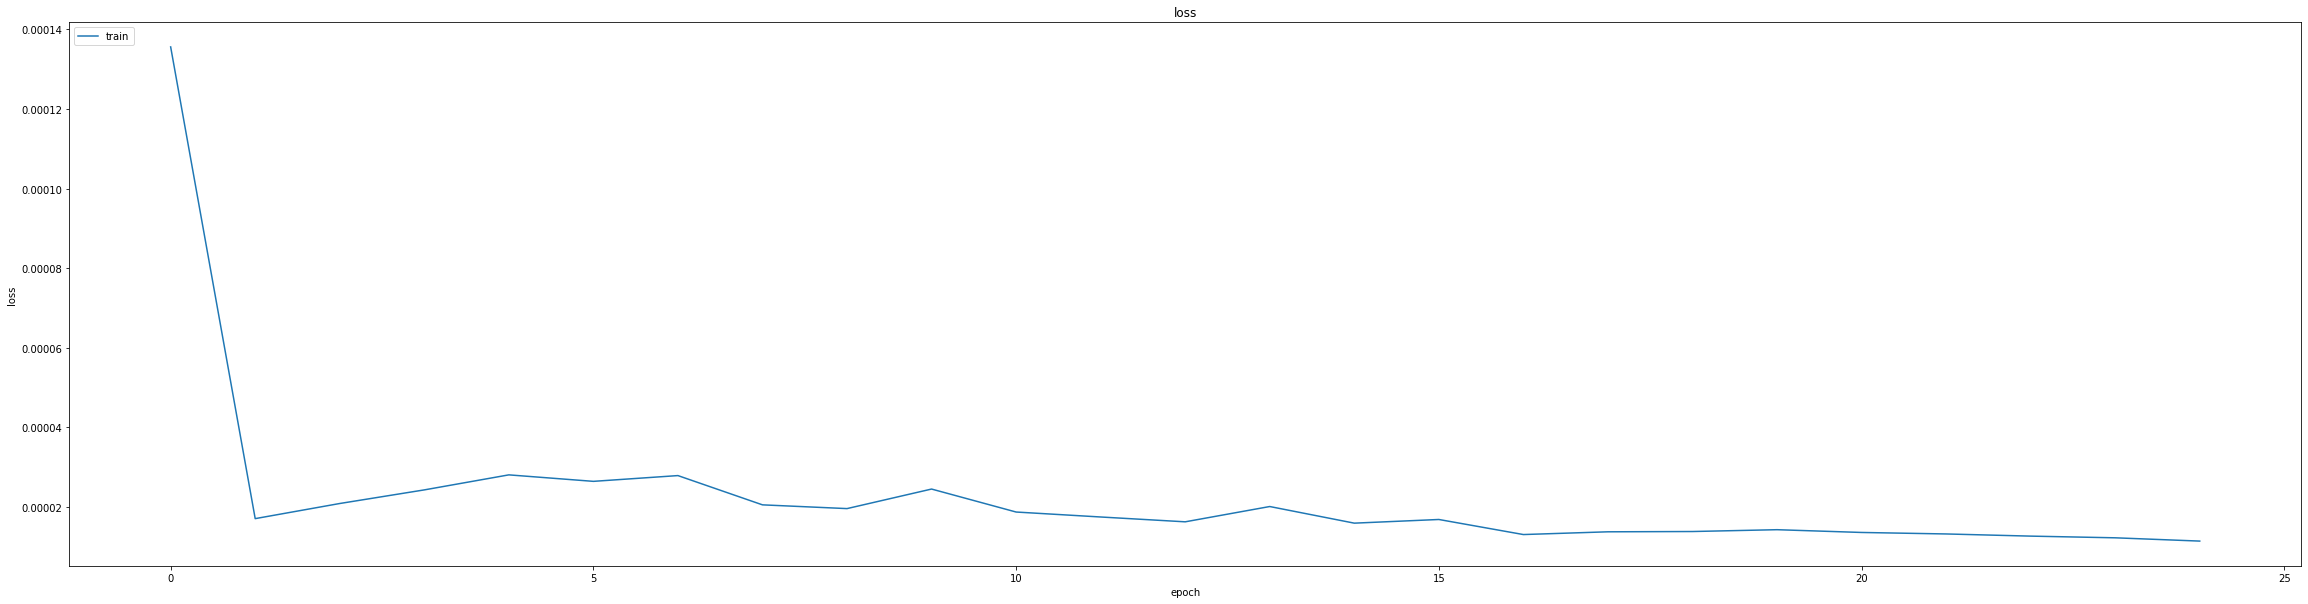

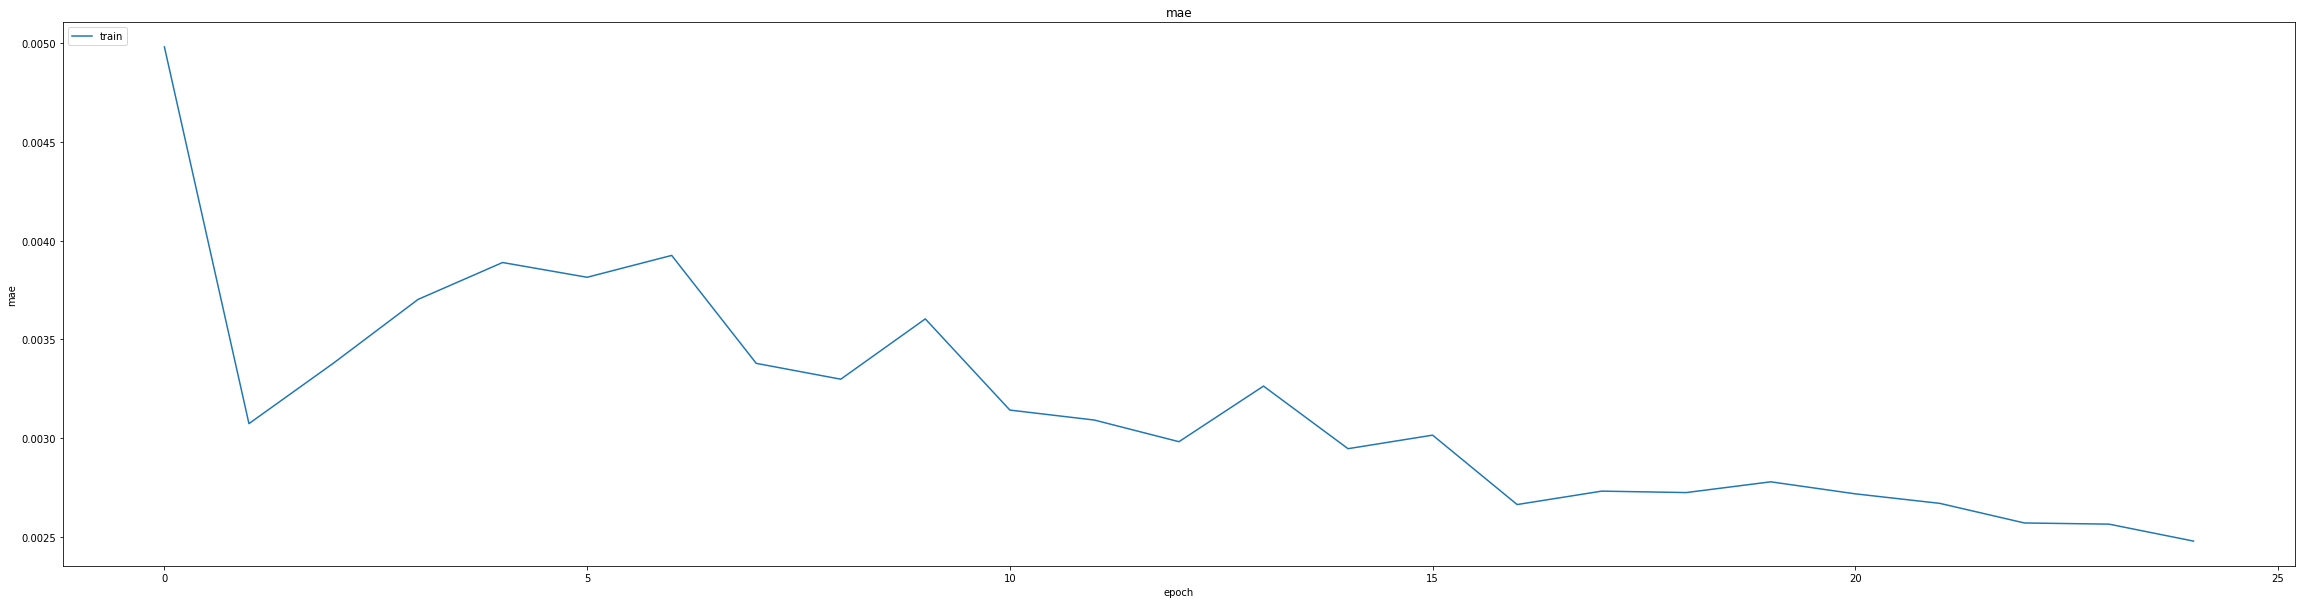

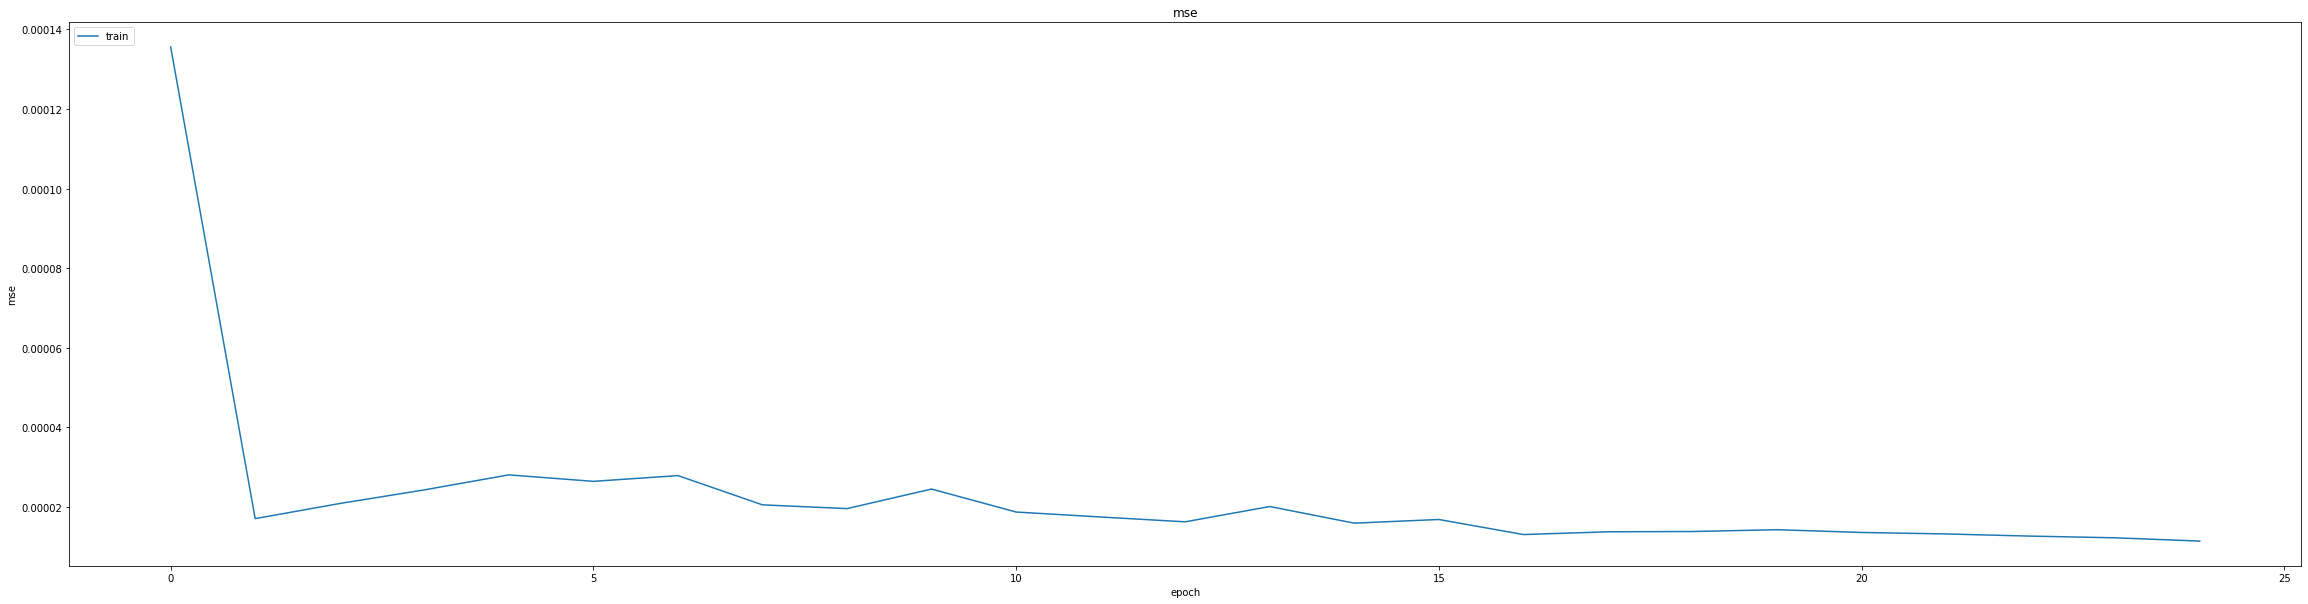

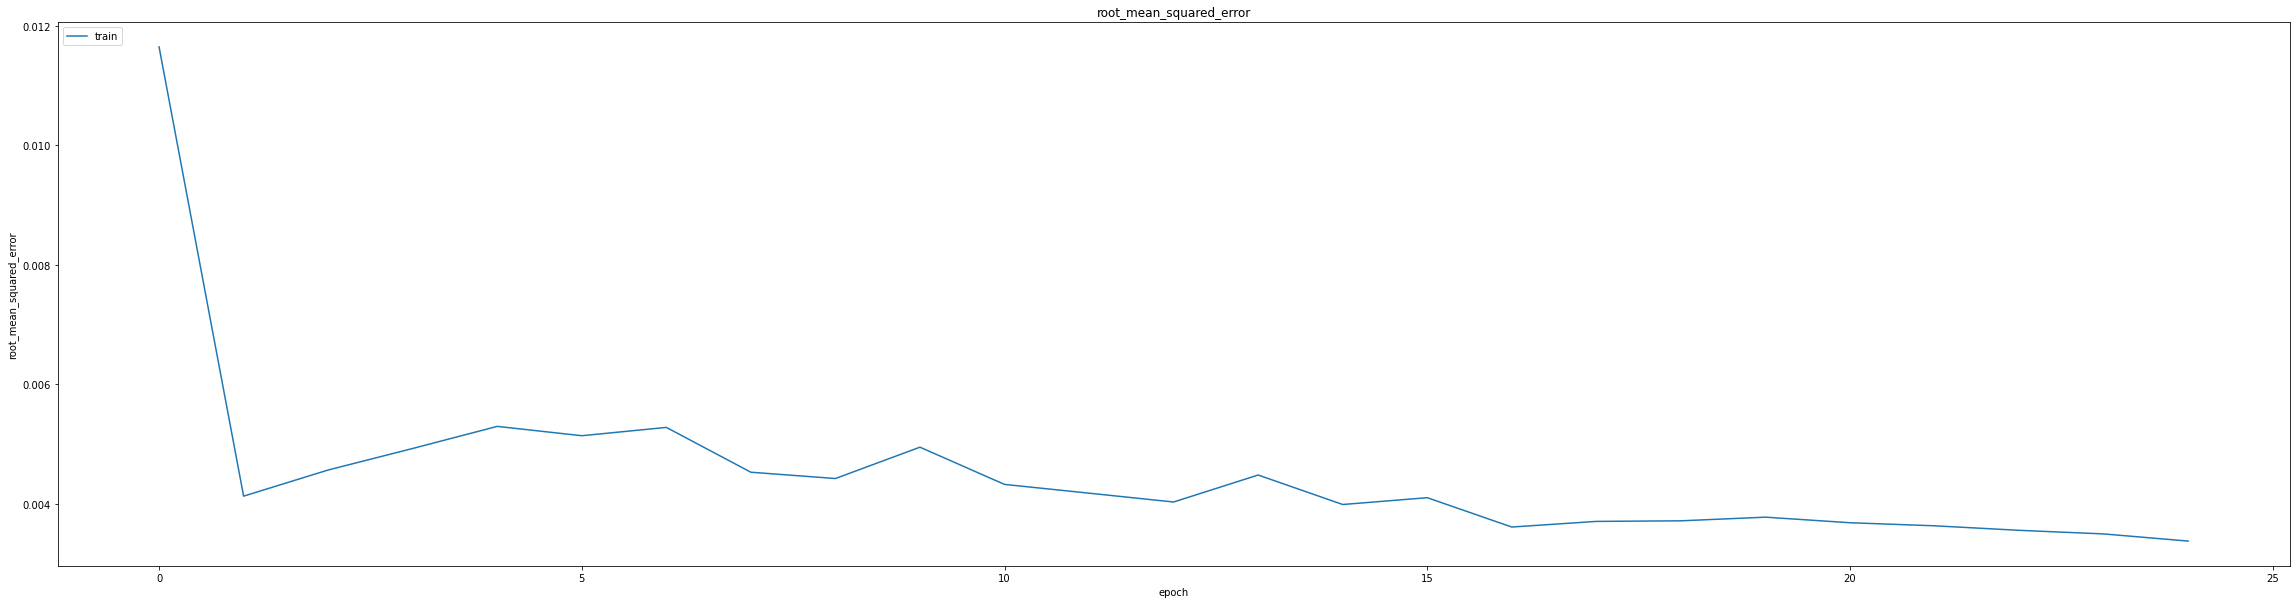

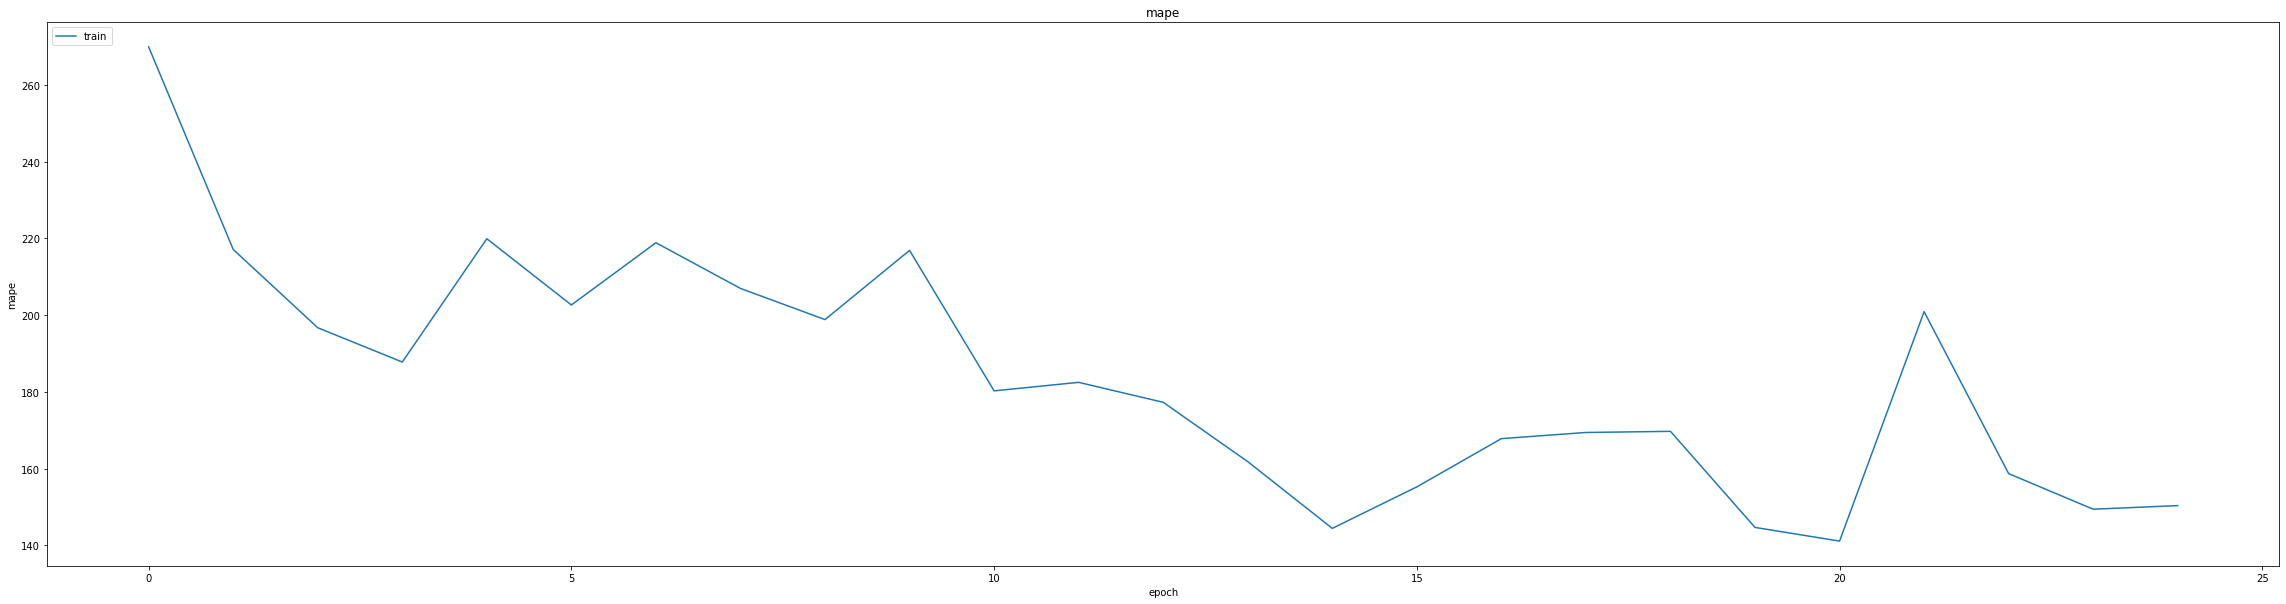

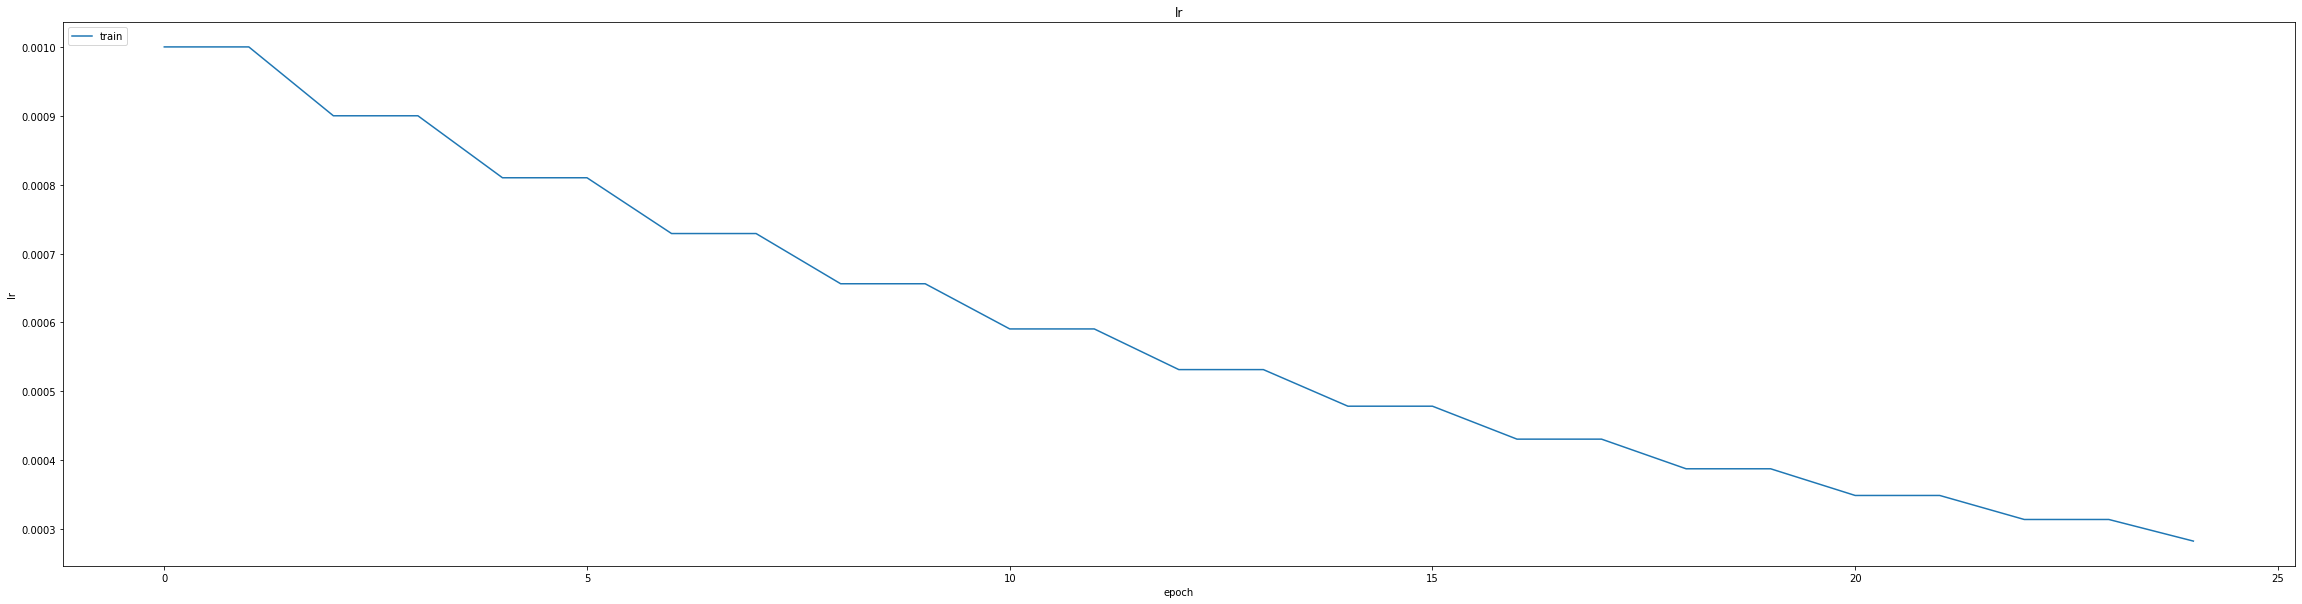

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009593414142727852
0.012629536911845207
234/234 [==============================] - 12s 41ms/step
0.995608070873418


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/8
464/464 [==============================] - ETA: 0s - loss: 1.1087e-04 - mae: 0.0043 - mse: 1.1087e-04 - root_mean_squared_error: 0.0105 - mape: 172.8901
Epoch 1: val_mse did not improve from 0.00016
464/464 [==============================] - 158s 317ms/step - loss: 1.1087e-04 - mae: 0.0043 - mse: 1.1087e-04 - root_mean_squared_error: 0.0105 - mape: 172.8901 - val_loss: 2.2502e-04 - val_mae: 0.0121 - val_mse: 2.2502e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 1643.0106 - lr: 0.0010
Epoch 2/8
464/464 [==============================] - ETA: 0s - loss: 1.3388e-05 - mae: 0.0027 - mse: 1.3388e-05 - root_mean_squared_error: 0.0037 - mape: 181.6968
Epoch 2: val_mse did not improve from 0.00016
464/464 [==============================] - 145s 312ms/step - loss: 1.3388e-05 - mae: 0.0027 - mse: 1.3388e-05 - root_mean_squared_error: 0.0037 - mape: 181.6968 - val_loss: 2.0812e-04 - val_mae: 0.0115 - val_mse: 2.0812e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 1386.1678 -

464/464 [==============================] - 192s 413ms/step - loss: 2.4386e-05 - mae: 0.0036 - mse: 2.4386e-05 - root_mean_squared_error: 0.0049 - mape: 160.8959 - val_loss: 1.5397e-04 - val_mae: 0.0093 - val_mse: 1.5397e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 1711.4491 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/8
464/464 [==============================] - ETA: 0s - loss: 1.6495e-05 - mae: 0.0030 - mse: 1.6495e-05 - root_mean_squared_error: 0.0041 - mape: 154.4364
Epoch 7: val_mse improved from 0.00015 to 0.00013, saving model to /content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM


464/464 [==============================] - 190s 409ms/step - loss: 1.6495e-05 - mae: 0.0030 - mse: 1.6495e-05 - root_mean_squared_error: 0.0041 - mape: 154.4364 - val_loss: 1.2567e-04 - val_mae: 0.0081 - val_mse: 1.2567e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 1651.3634 - lr: 7.2900e-04
Epoch 8/8
464/464 [==============================] - ETA: 0s - loss: 1.8476e-05 - mae: 0.0031 - mse: 1.8476e-05 - root_mean_squared_error: 0.0043 - mape: 164.3298
Epoch 8: val_mse did not improve from 0.00013
464/464 [==============================] - 143s 308ms/step - loss: 1.8476e-05 - mae: 0.0031 - mse: 1.8476e-05 - root_mean_squared_error: 0.0043 - mape: 164.3298 - val_loss: 1.3699e-04 - val_mae: 0.0087 - val_mse: 1.3699e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 1441.4215 - lr: 7.2900e-04


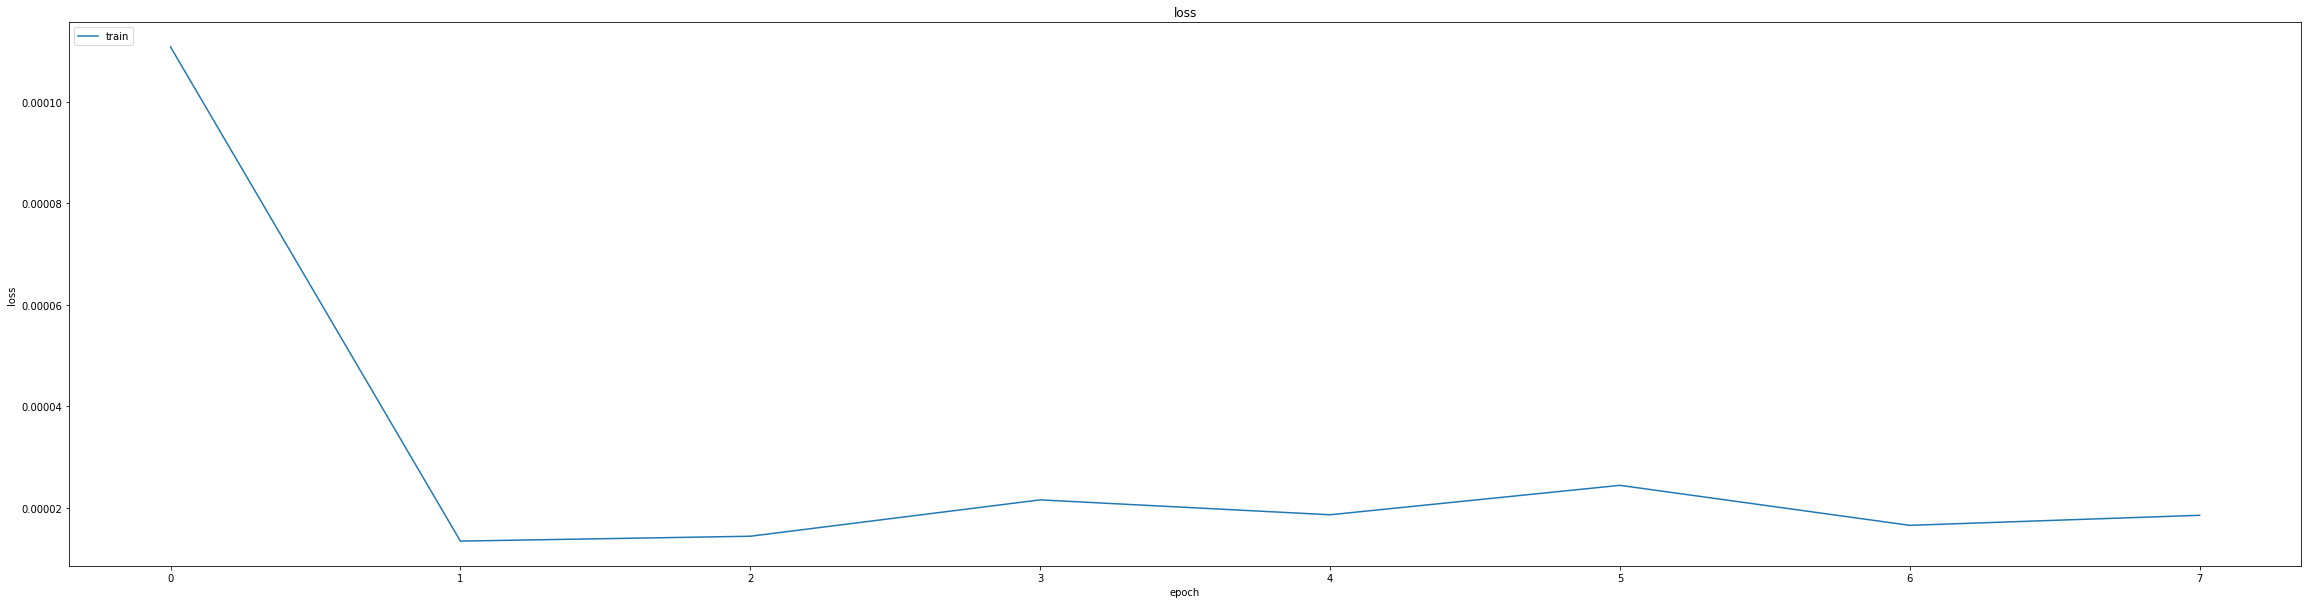

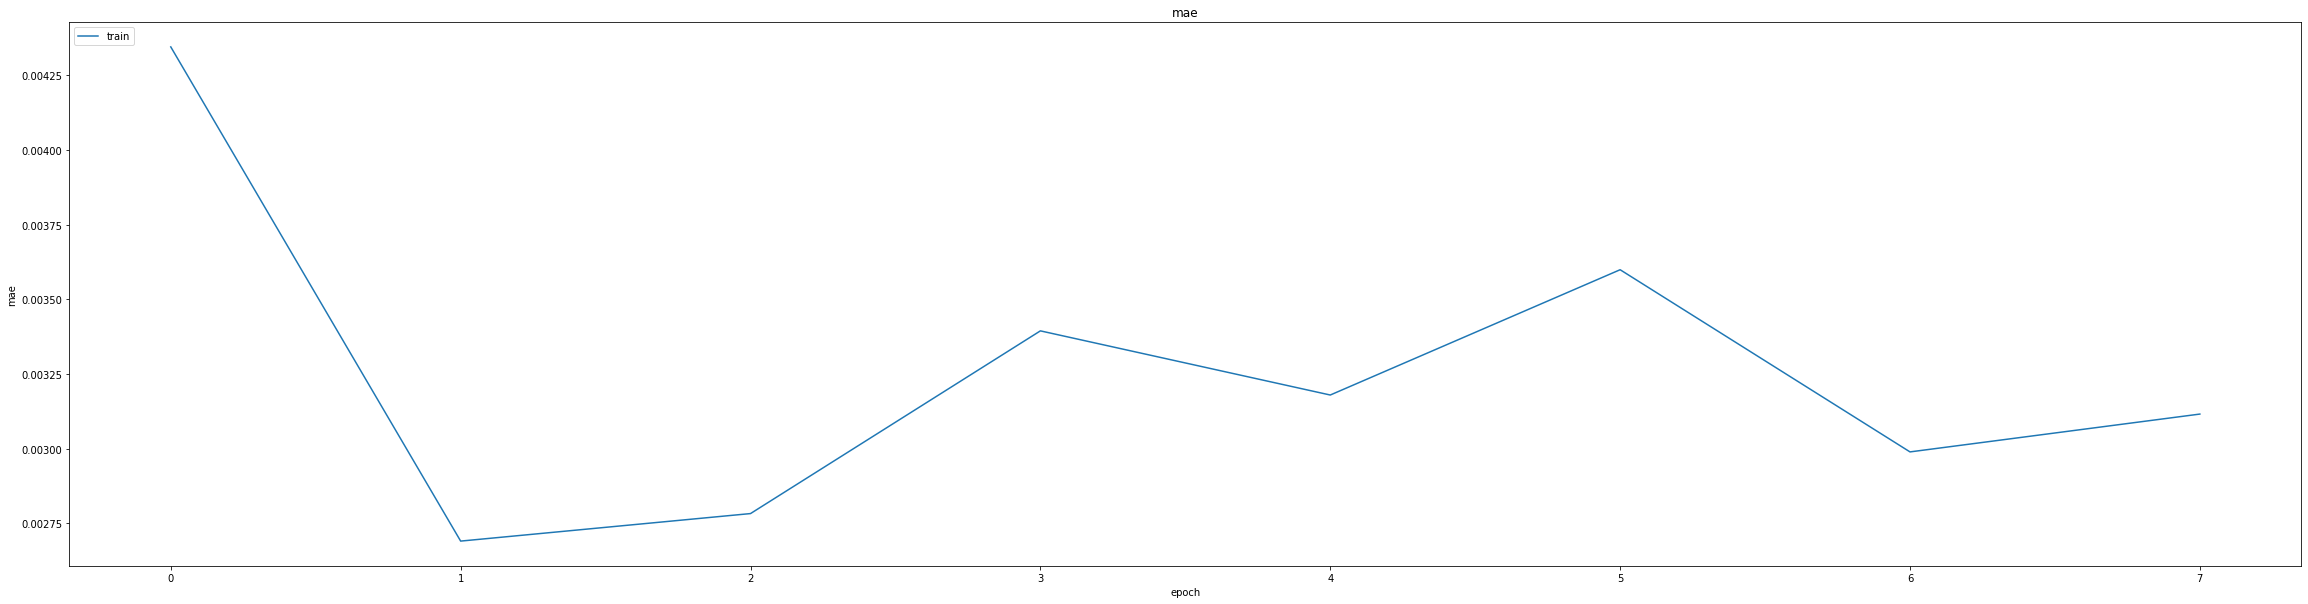

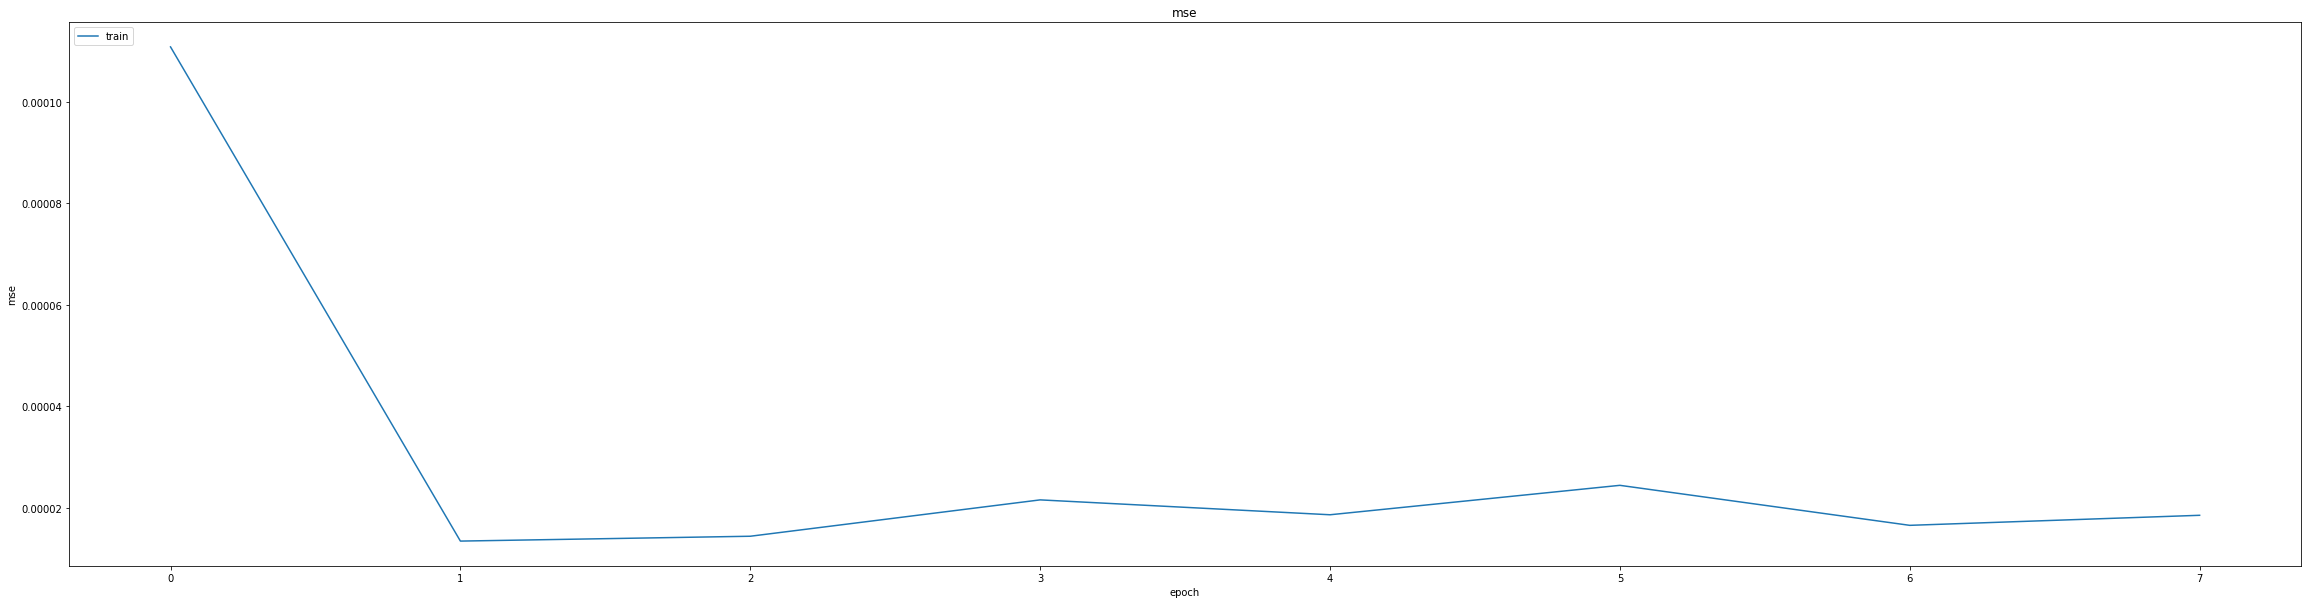

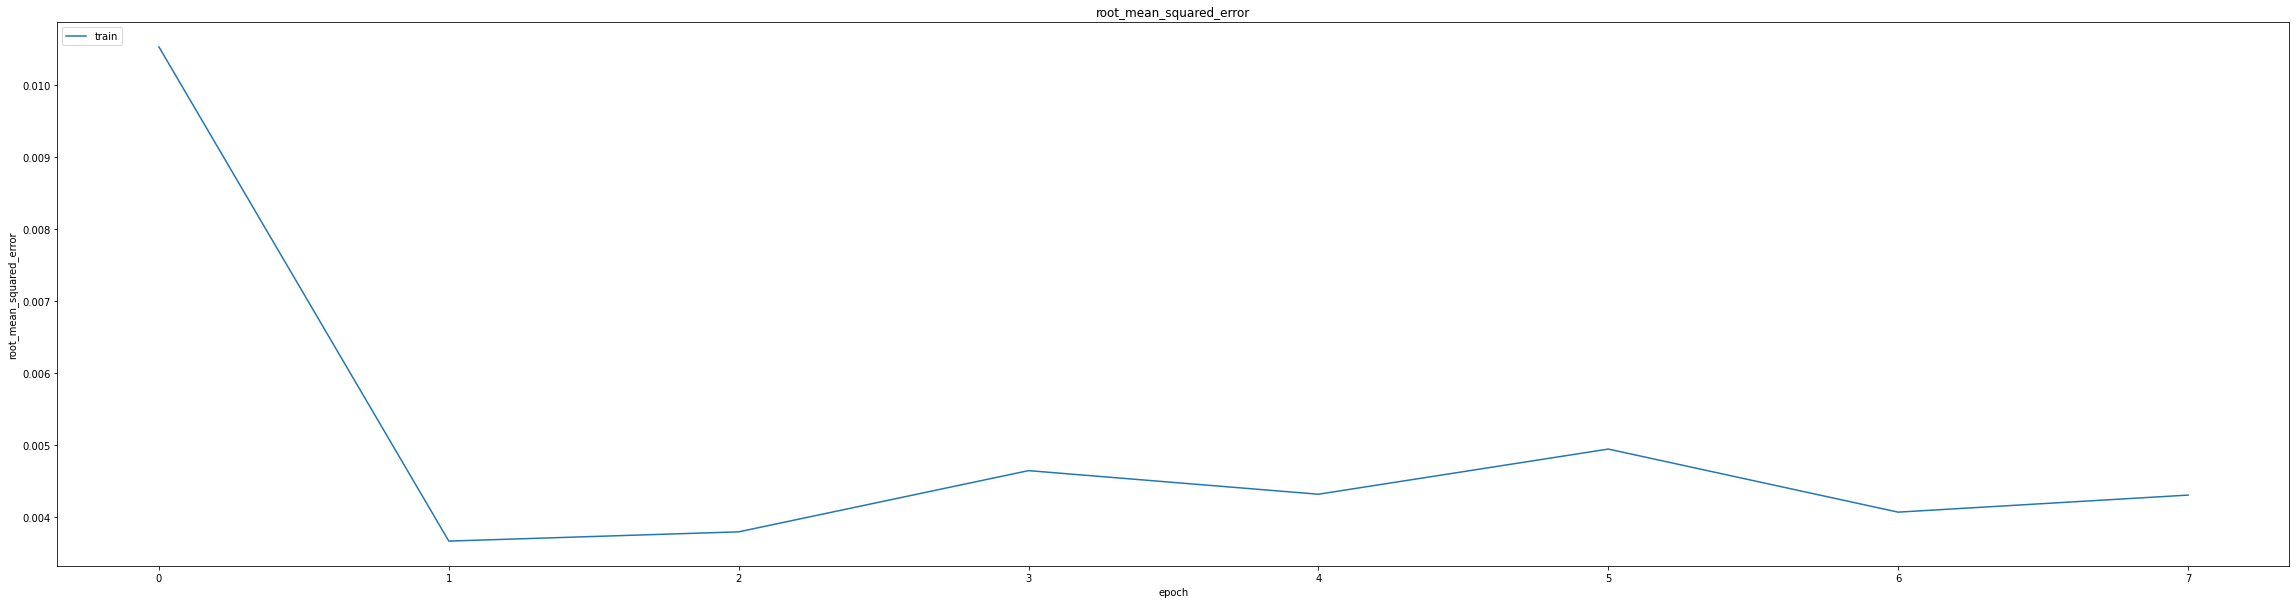

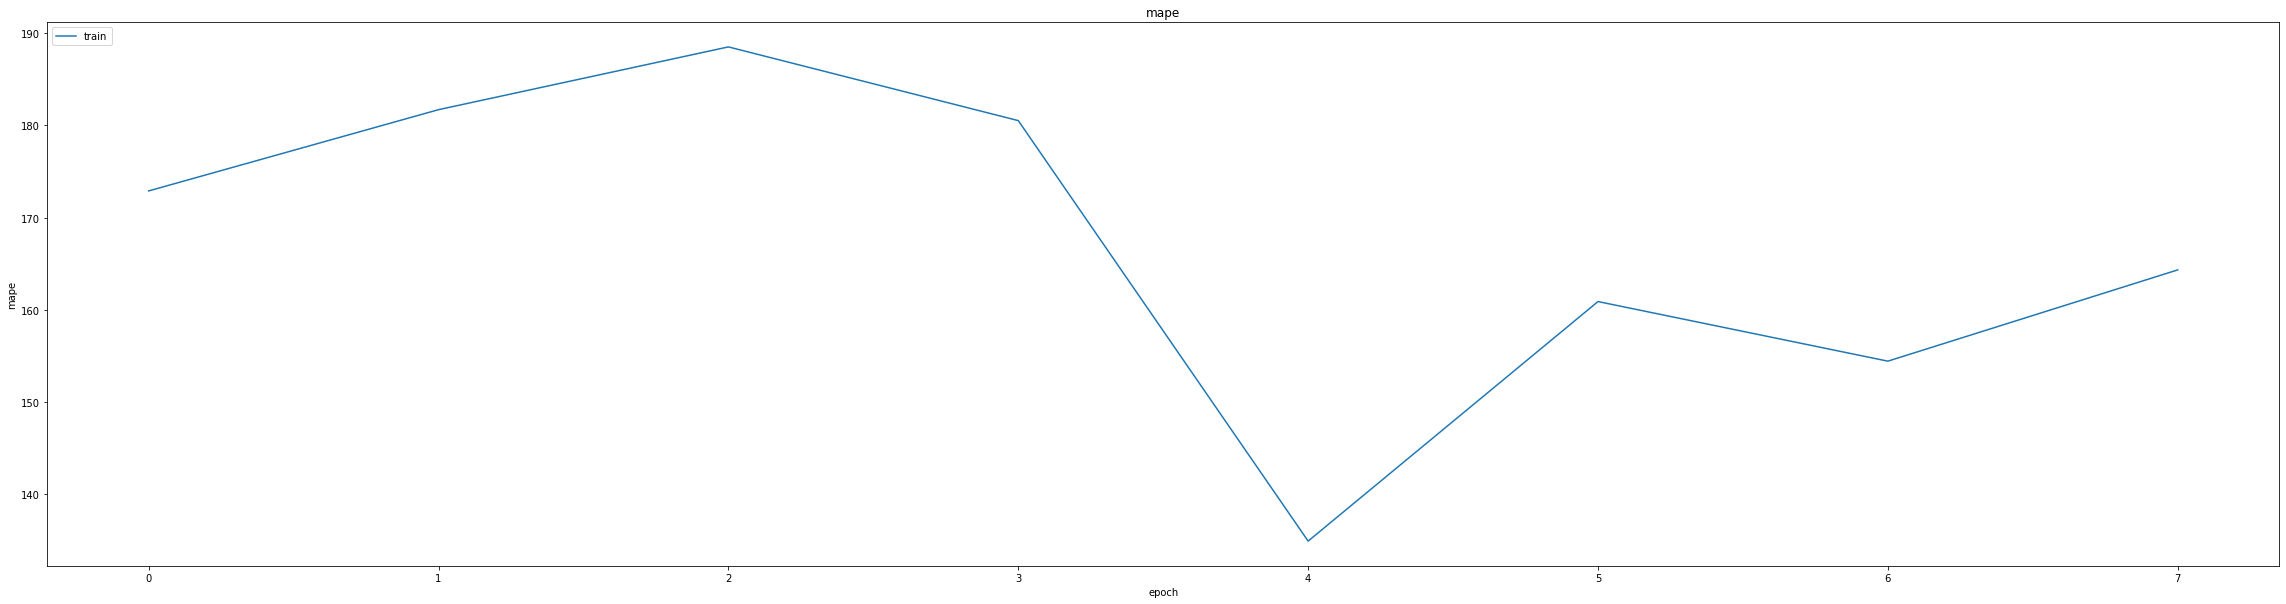

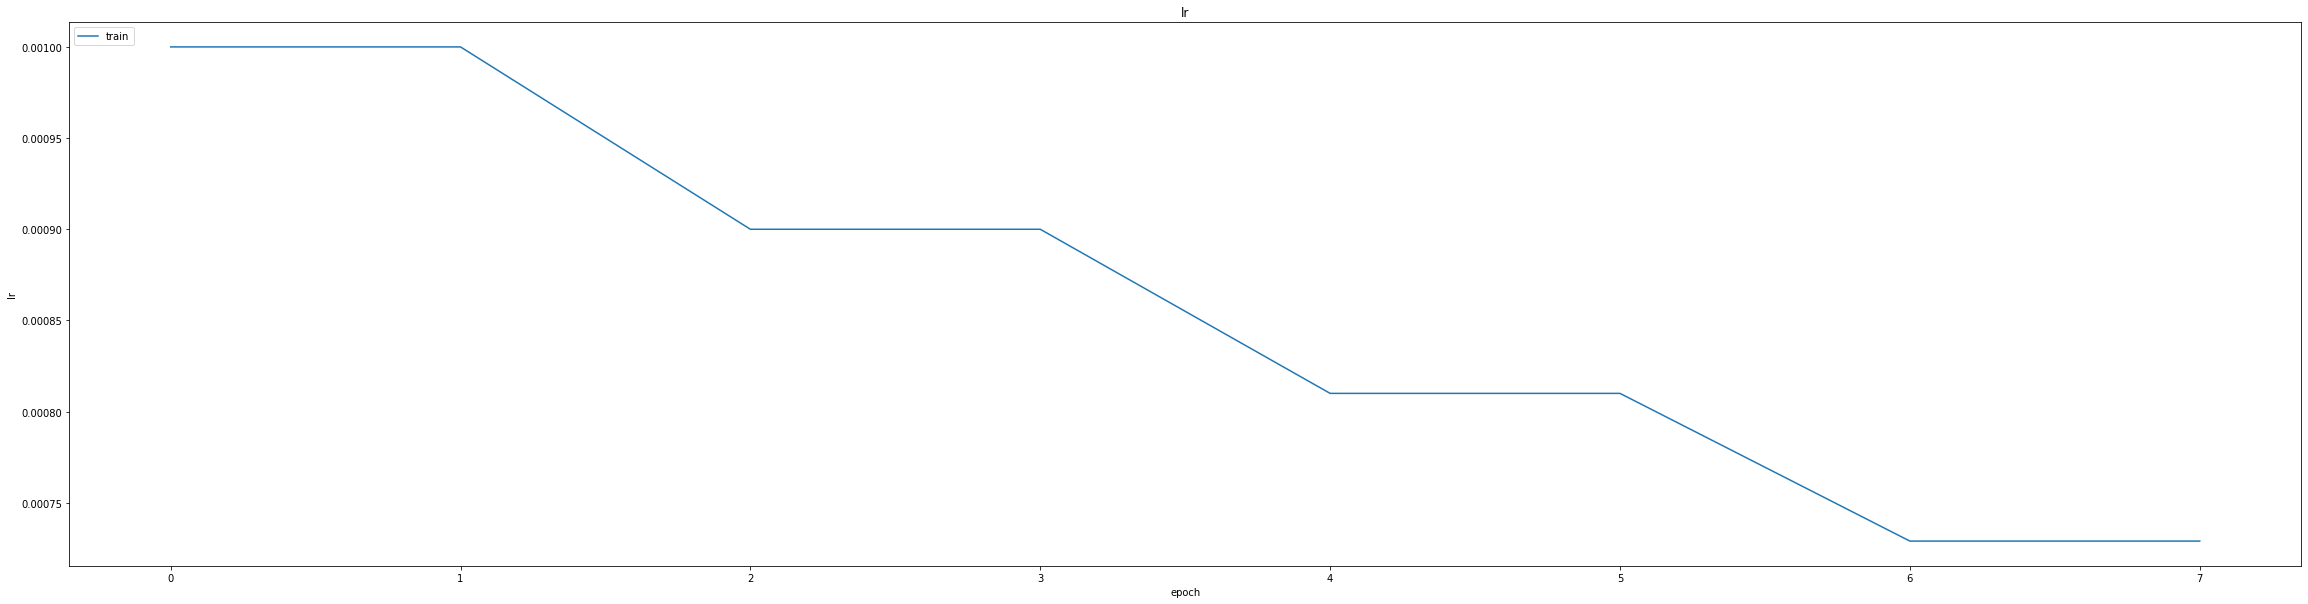

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00807774905115366
0.01121033076196909
234/234 [==============================] - 12s 41ms/step
0.9967380788939321


234/234 [==============================] - 10s 41ms/step


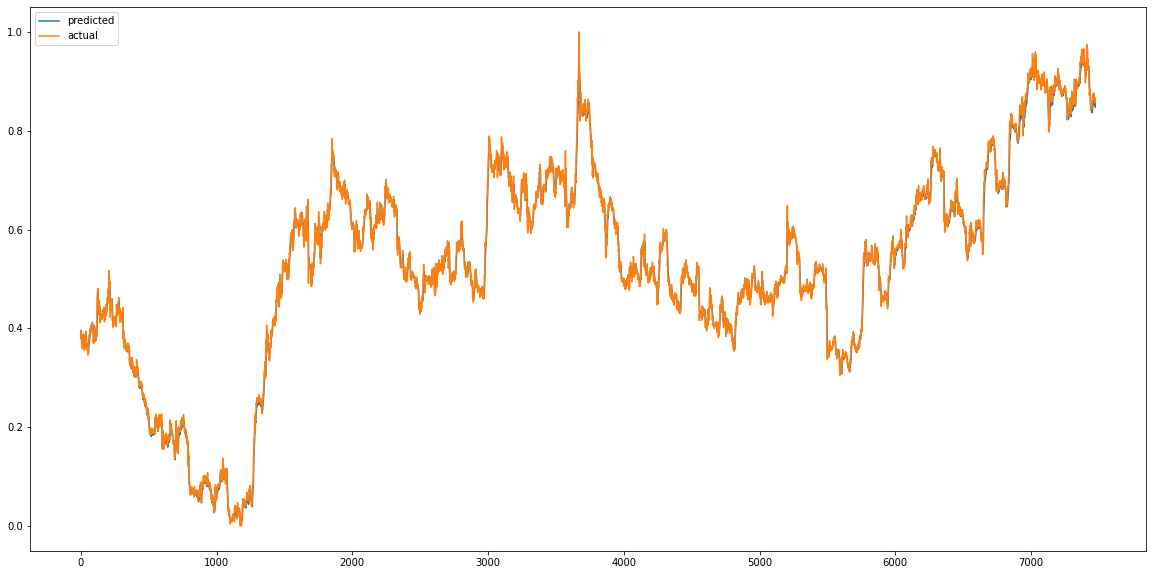

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD15_BiLSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


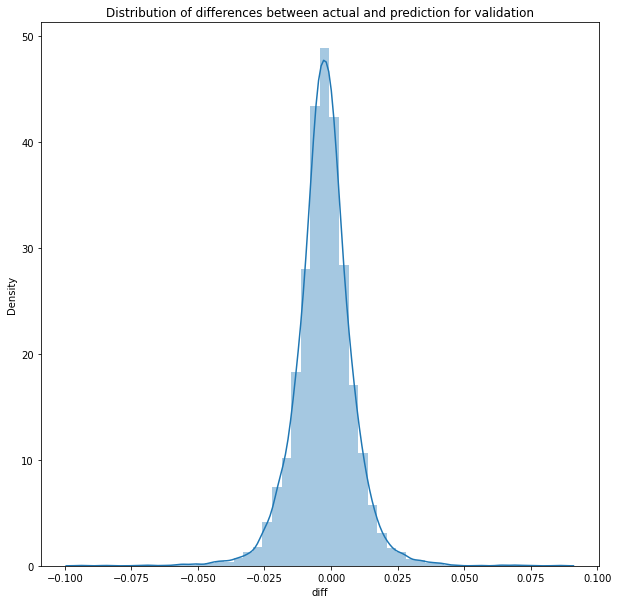

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 41ms/step


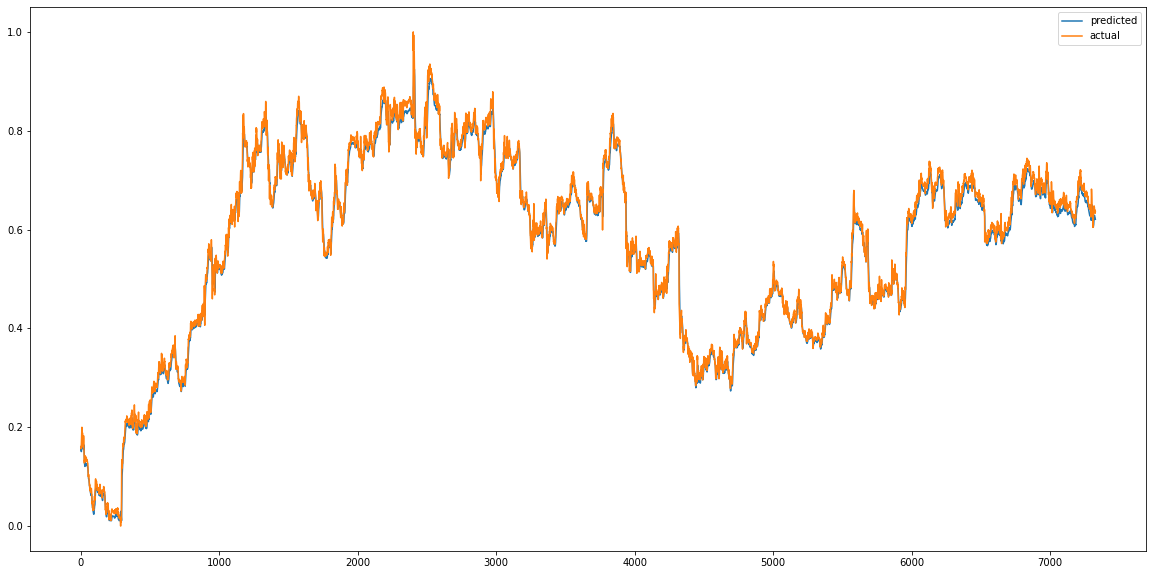

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


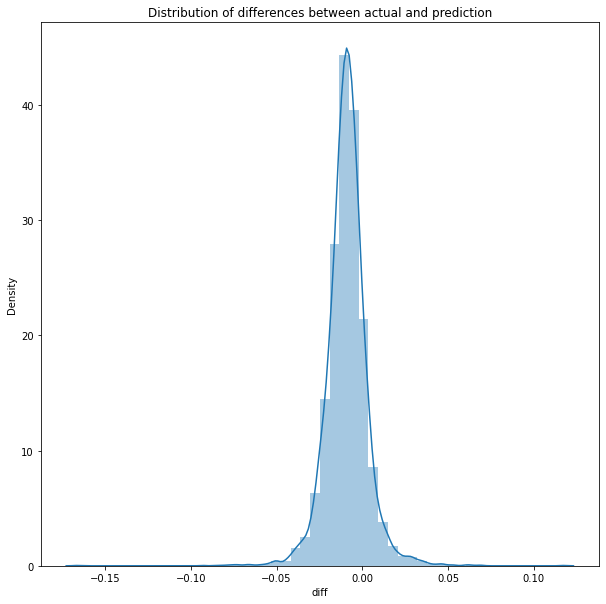

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0002257865899296701
MAE :  0.011707150503153217
RMSE  : 0.015026196788597908
229/229 [==============================] - 10s 42ms/step
R2_Score  : 0.9941319515240459


count    7328.000000
mean       -0.009072
std         0.011979
min        -0.166573
25%        -0.015037
50%        -0.009028
75%        -0.003017
max         0.117011
Name: diff, dtype: float64

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 775.1052 - mae: 9.7029 - mse: 775.1052 - root_mean_squared_error: 27.8407 - mape: 111082.0938
Epoch 1: val_mse improved from inf to 2.29746, saving model to weights.best.hdf5
464/464 [==============================] - 131s 269ms/step - loss: 775.1052 - mae: 9.7029 - mse: 775.1052 - root_mean_squared_error: 27.8407 - mape: 111082.0938 - val_loss: 2.2975 - val_mae: 1.5018 - val_mse: 2.2975 - val_root_mean_squared_error: 1.5157 - val_mape: 272588.7188
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 1.6098 - mae: 1.2232 - mse: 1.6098 - root_mean_squared_error: 1.2688 - mape: 23046.7676
Epoch 2: val_mse improved from 2.29746 to 0.45193, saving model to weights.best.hdf5
464/464 [==============================] - 119s 256ms/step - loss: 1.6098 - mae: 1.2232 - mse: 1.6098 - root_mean_squared_error: 1.2688 - mape: 23046.7676 - val_loss: 0.4519 - val_mae: 0.6402 - val_mse: 0.4519 - val_root_mean_squared_

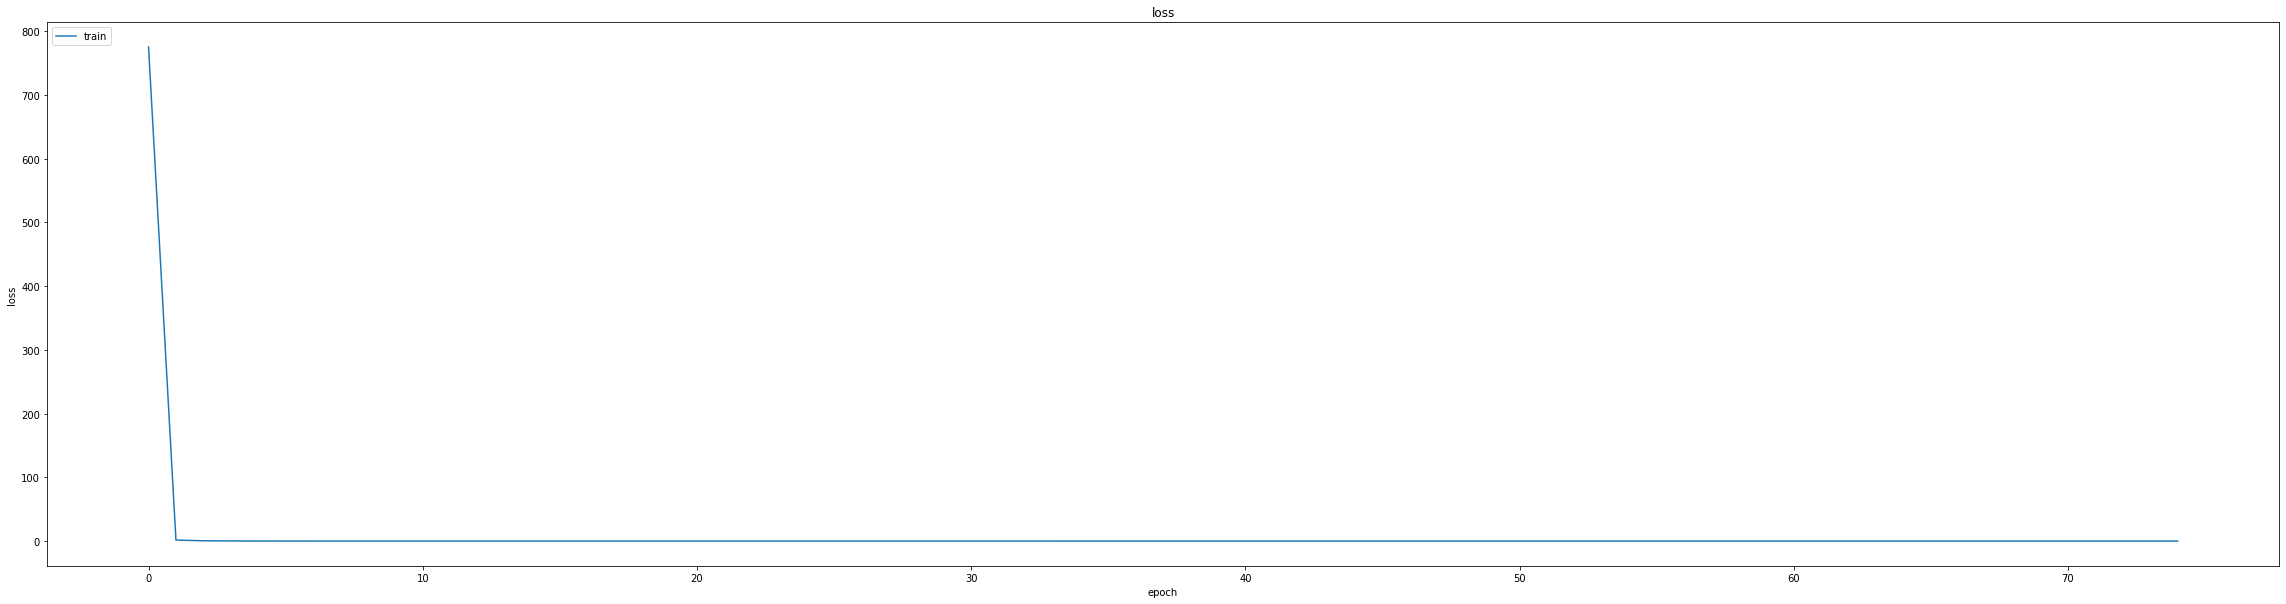

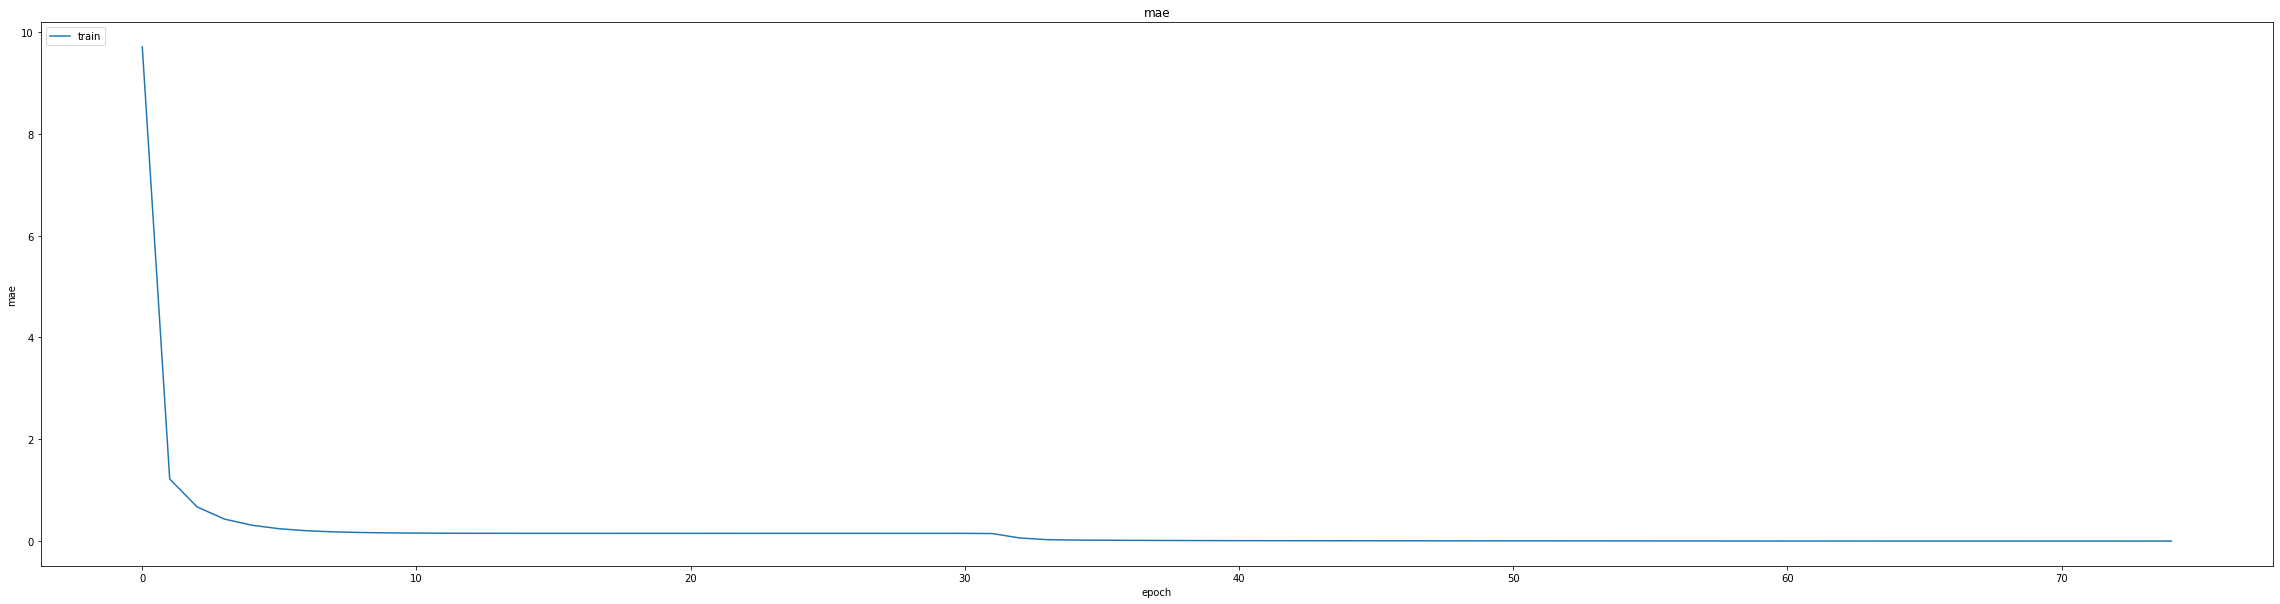

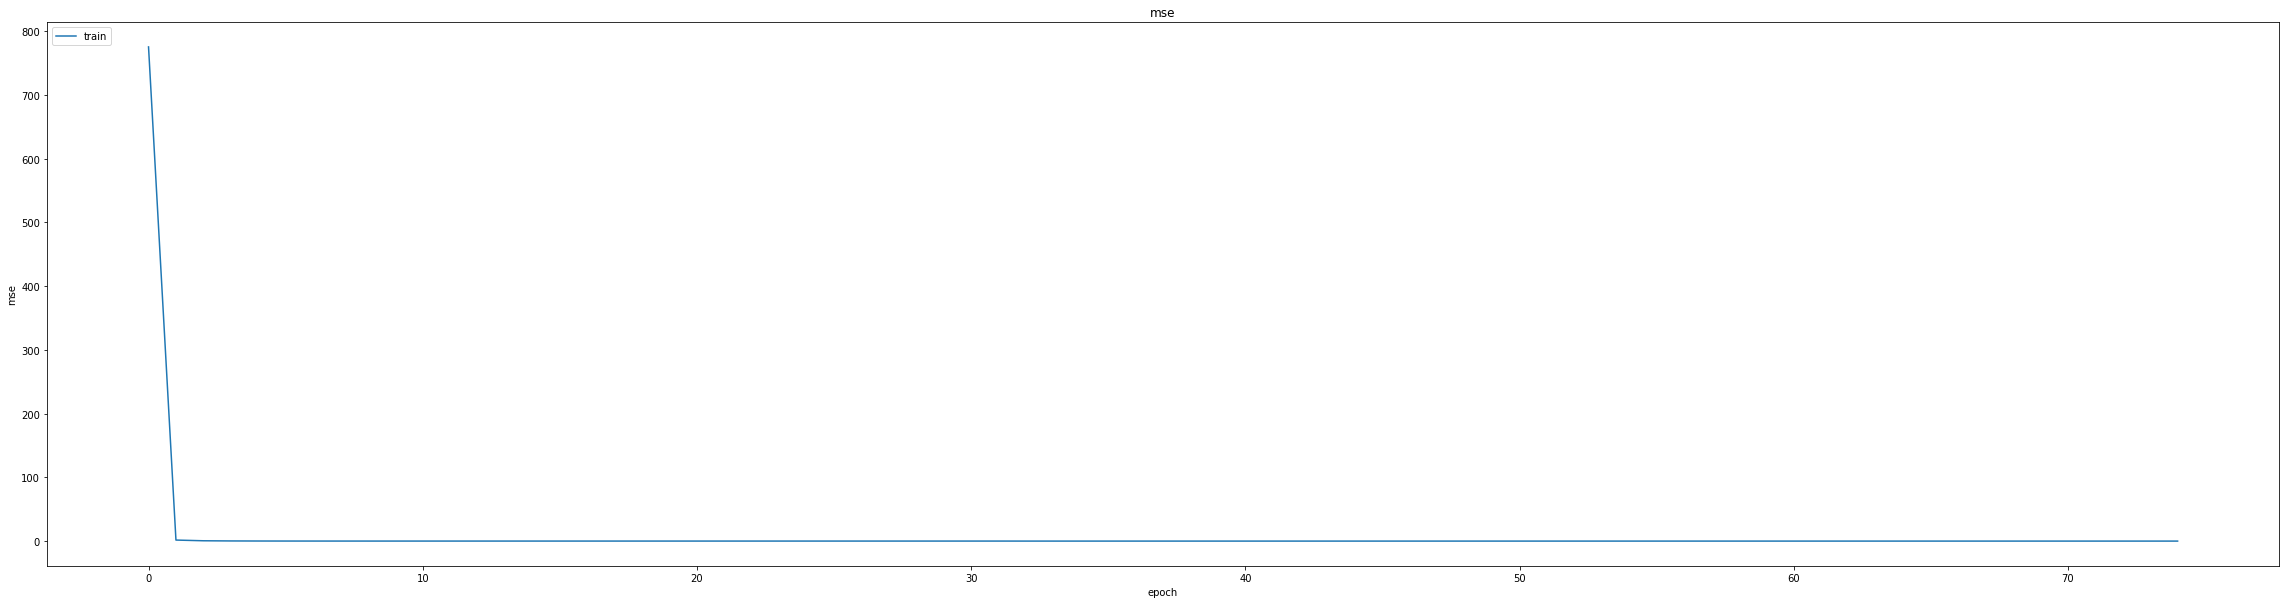

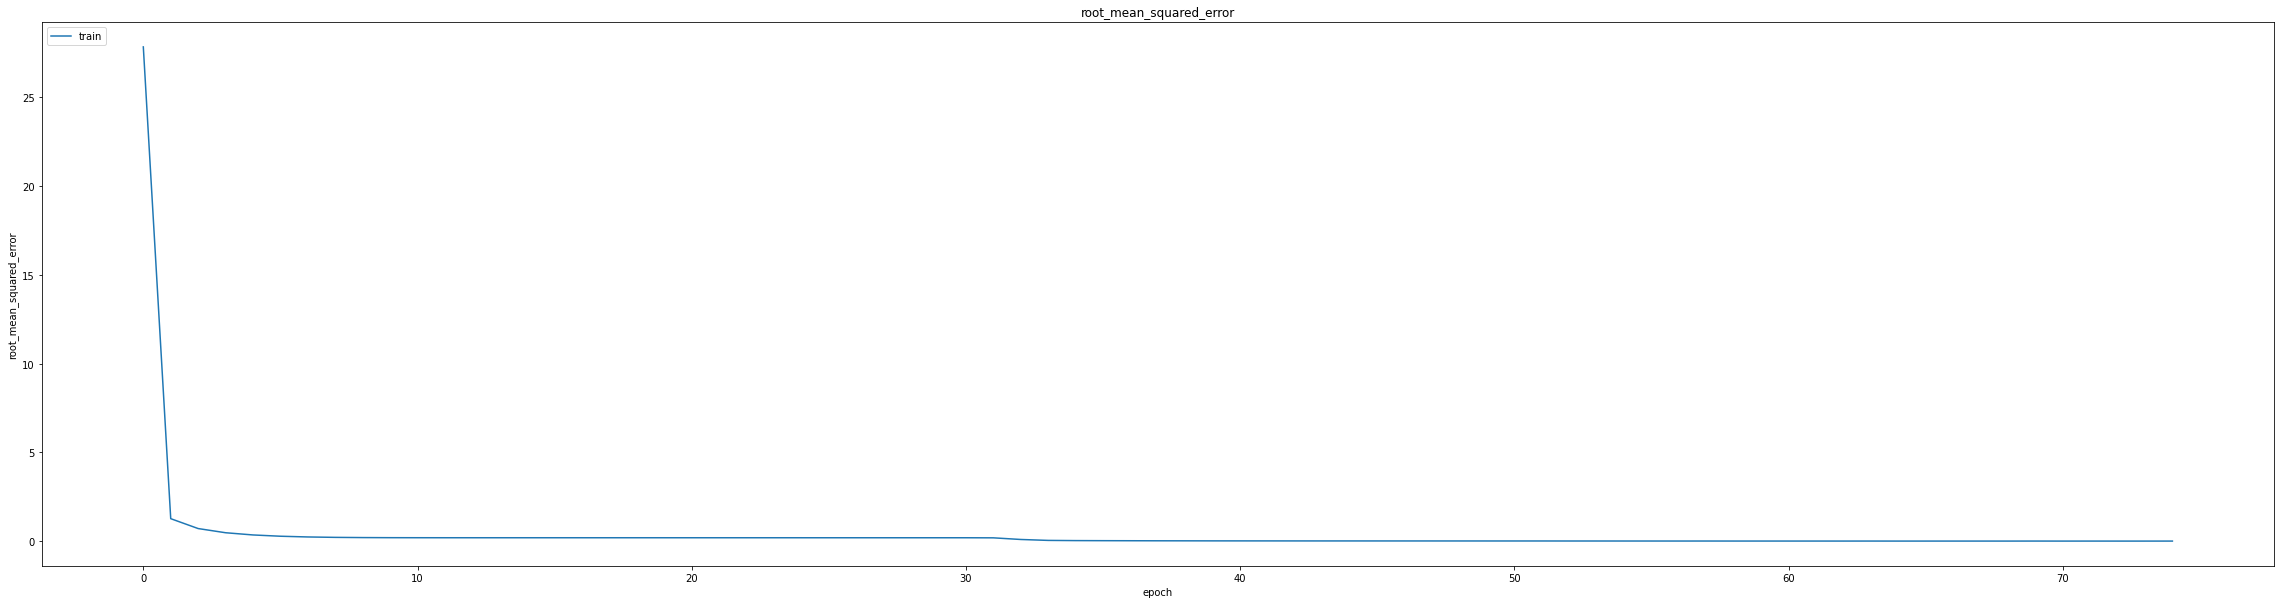

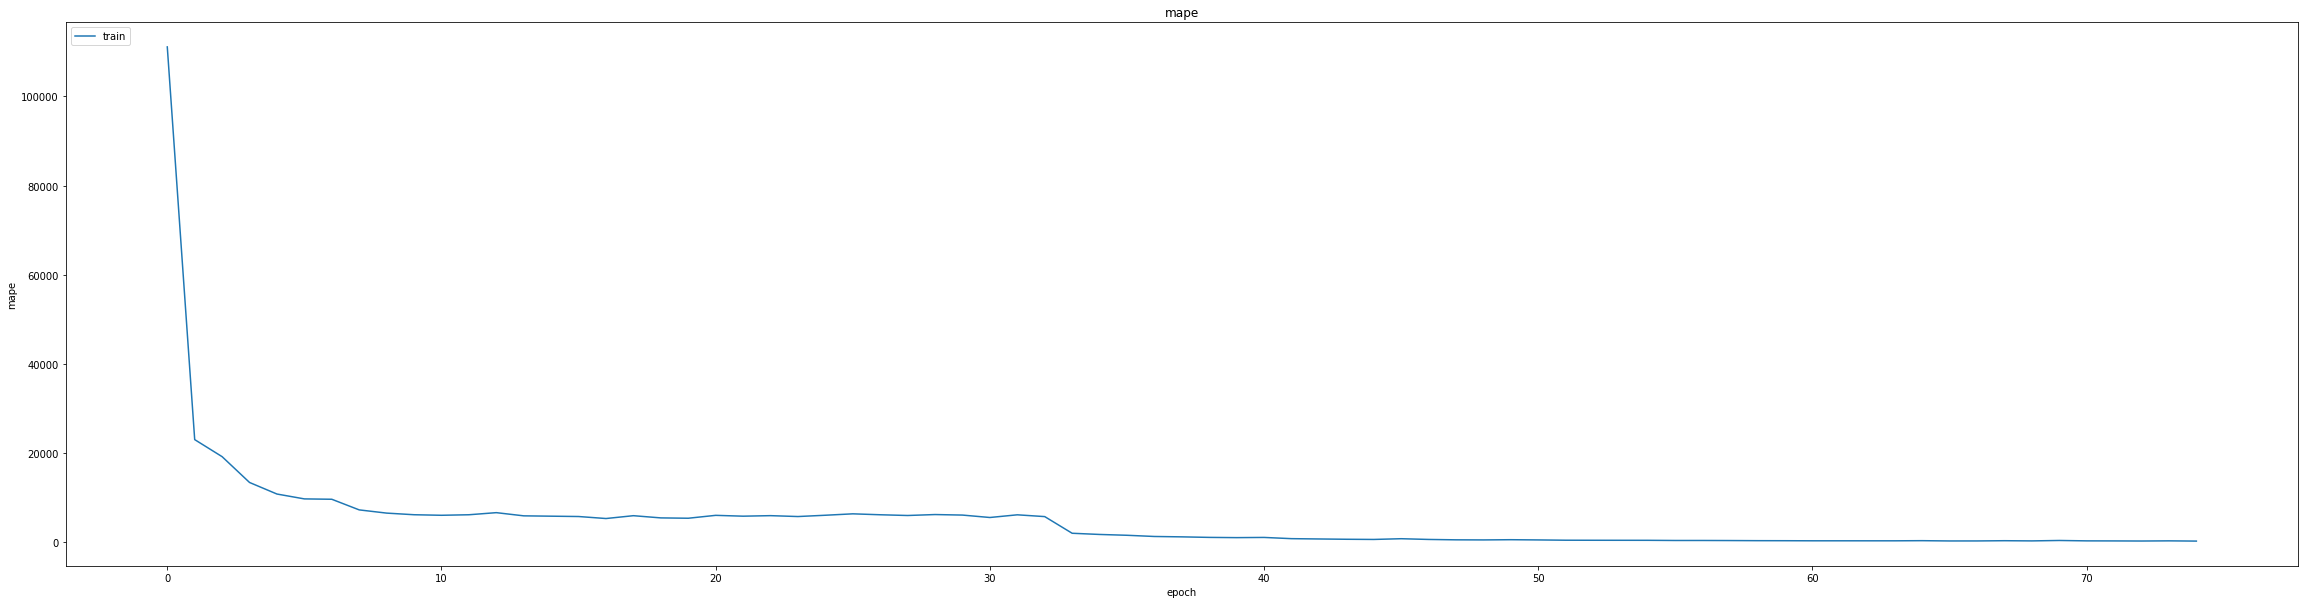

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009843395091593266
0.013680441305041313
234/234 [==============================] - 15s 51ms/step
0.9892403824554374


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(75/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 9.7628e-05 - mae: 0.0050 - mse: 9.7628e-05 - root_mean_squared_error: 0.0099 - mape: 281.3484
Epoch 1: val_mse did not improve from 0.00019
464/464 [==============================] - 133s 276ms/step - loss: 9.7628e-05 - mae: 0.0050 - mse: 9.7628e-05 - root_mean_squared_error: 0.0099 - mape: 281.3484 - val_loss: 2.8898e-04 - val_mae: 0.0138 - val_mse: 2.8898e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 2532.3169 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.3136e-05 - mae: 0.0036 - mse: 2.3136e-05 - root_mean_squared_error: 0.0048 - mape: 319.5016
Epoch 2: val_mse improved from 0.00019 to 0.00019, saving model to weights.best.hdf5
464/464 [==============================] - 119s 257ms/step - loss: 2.3136e-05 - mae: 0.0036 - mse: 2.3136e-05 - root_mean_squared_error: 0.0048 - mape: 319.5016 - val_loss: 1.8600e-04 - val_mae: 0.0100 - val_mse: 1.8600e-04 - val_root_mean_squa

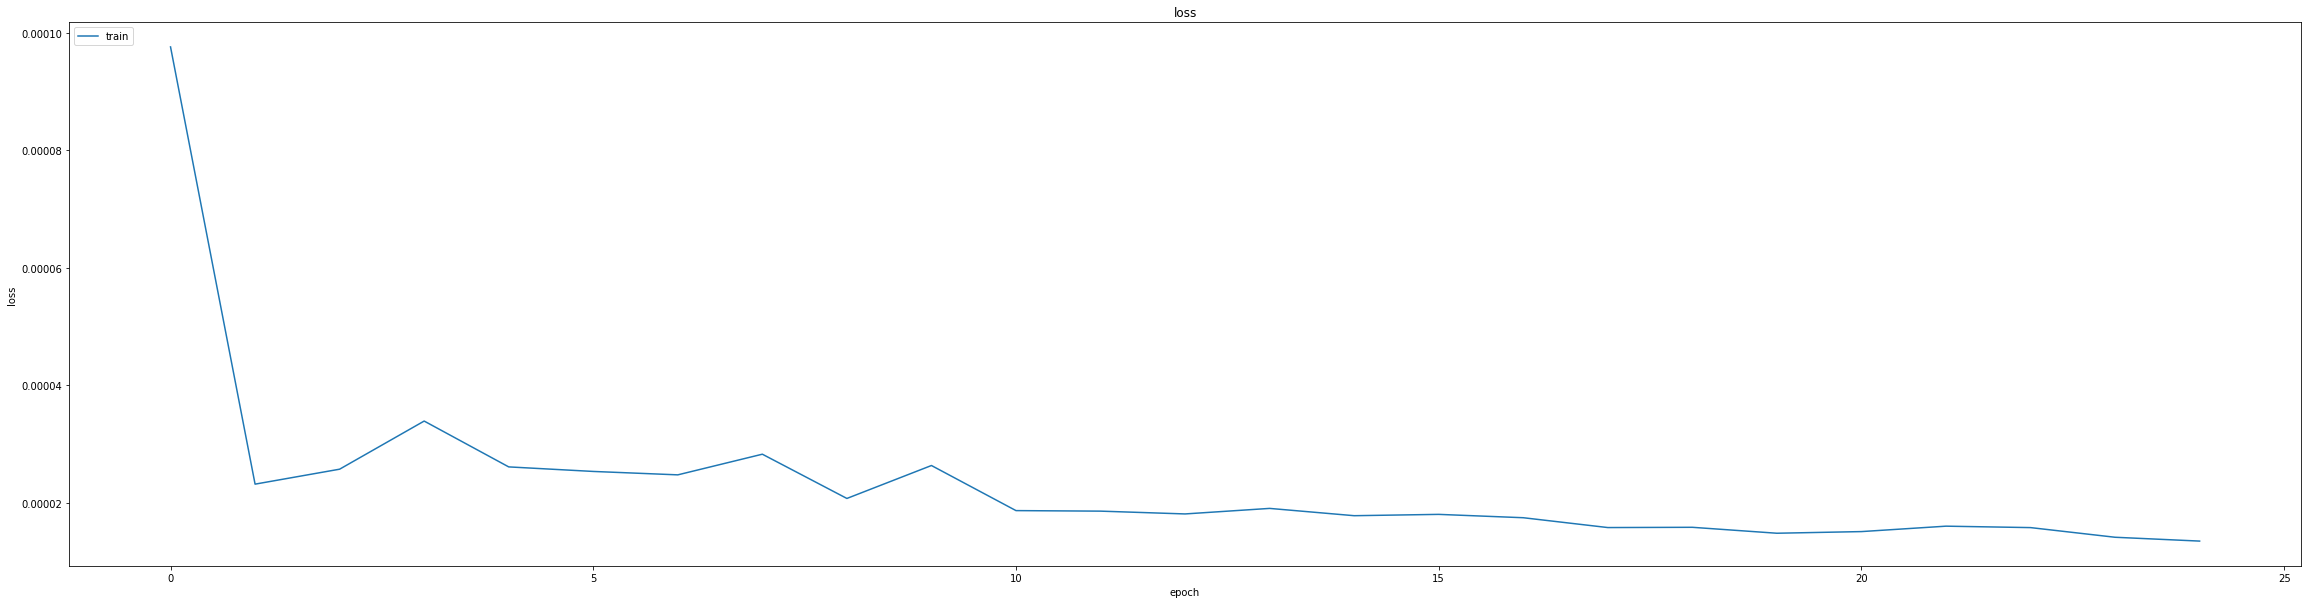

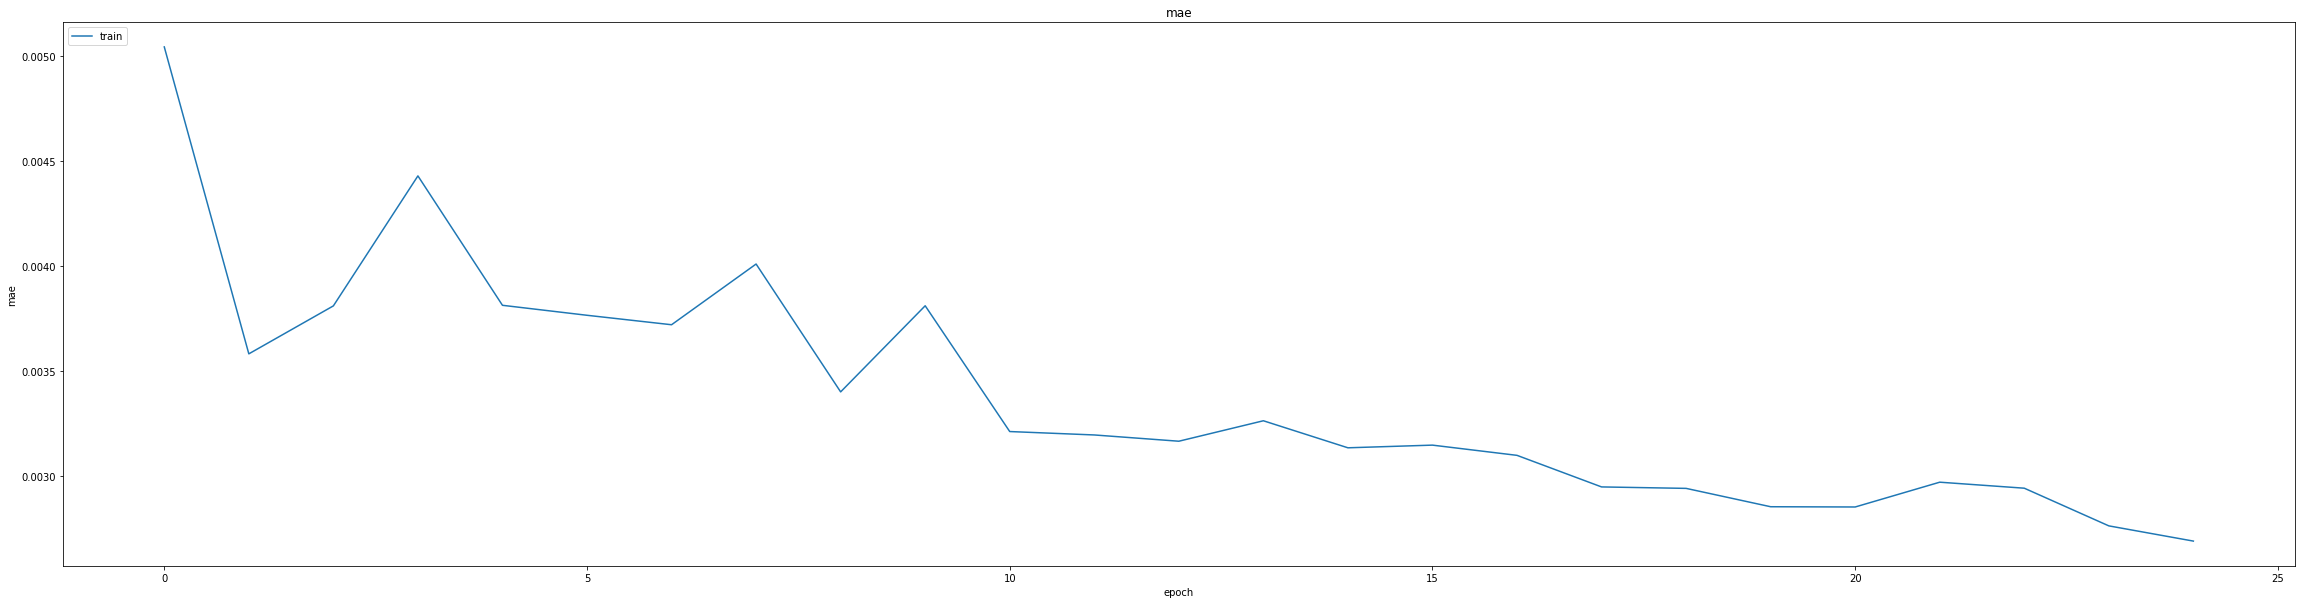

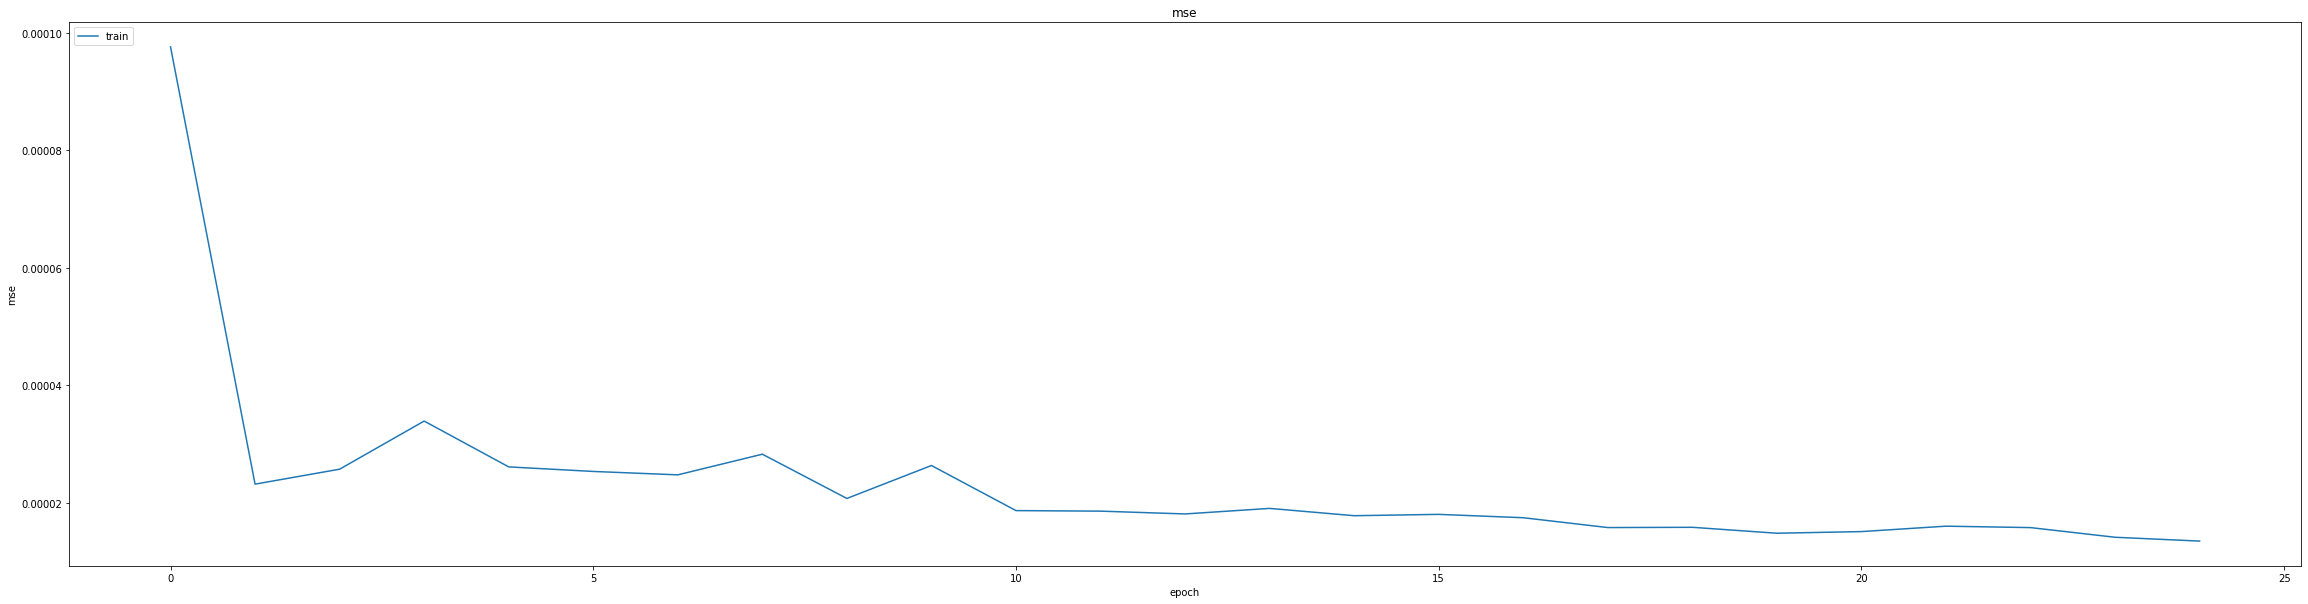

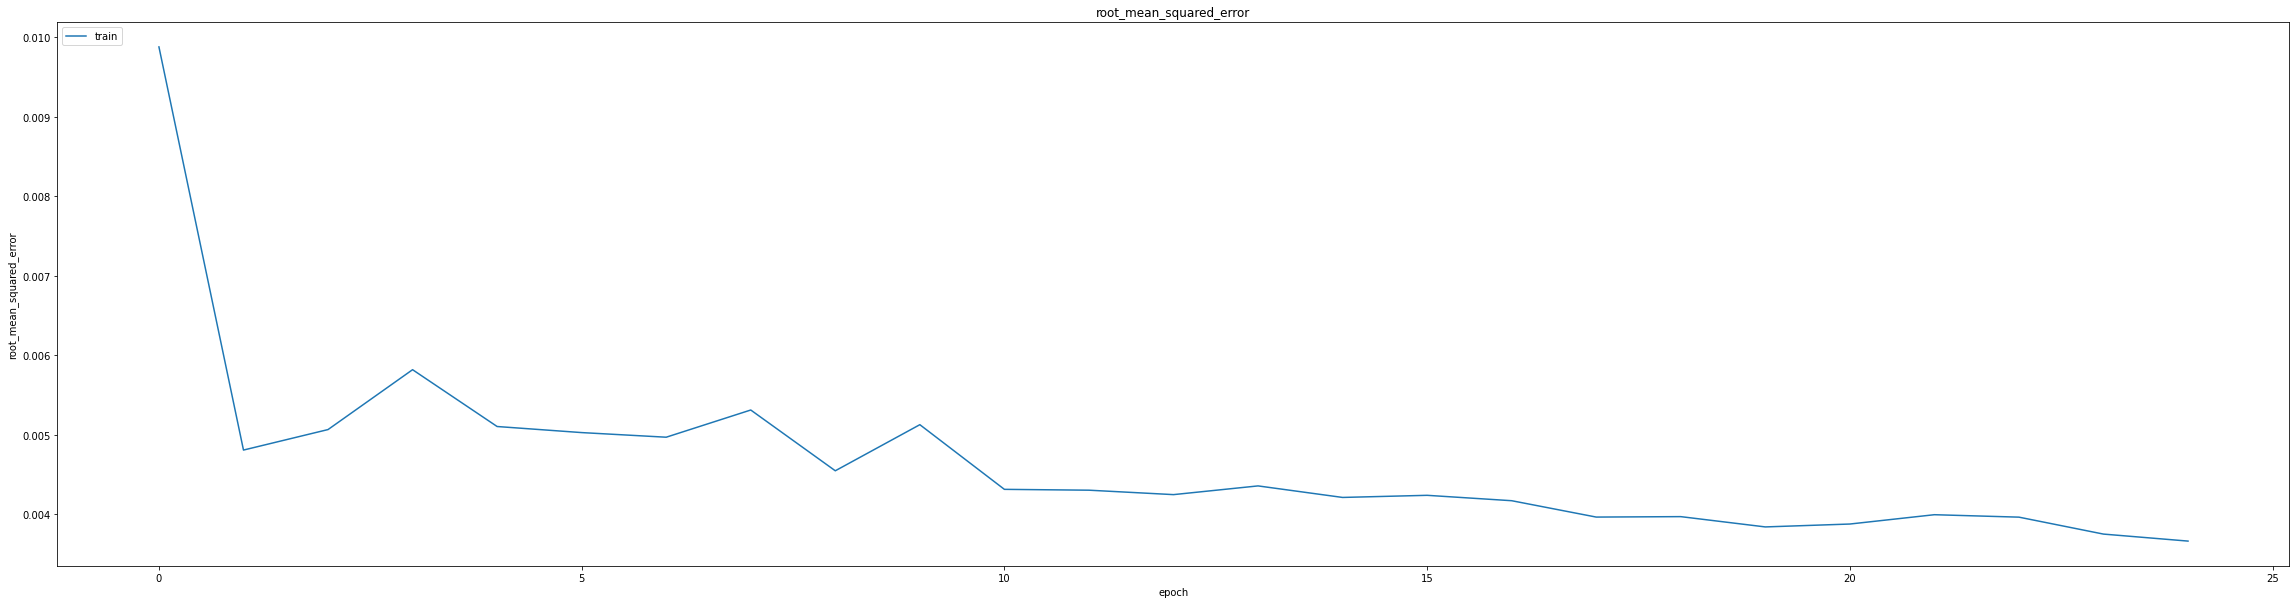

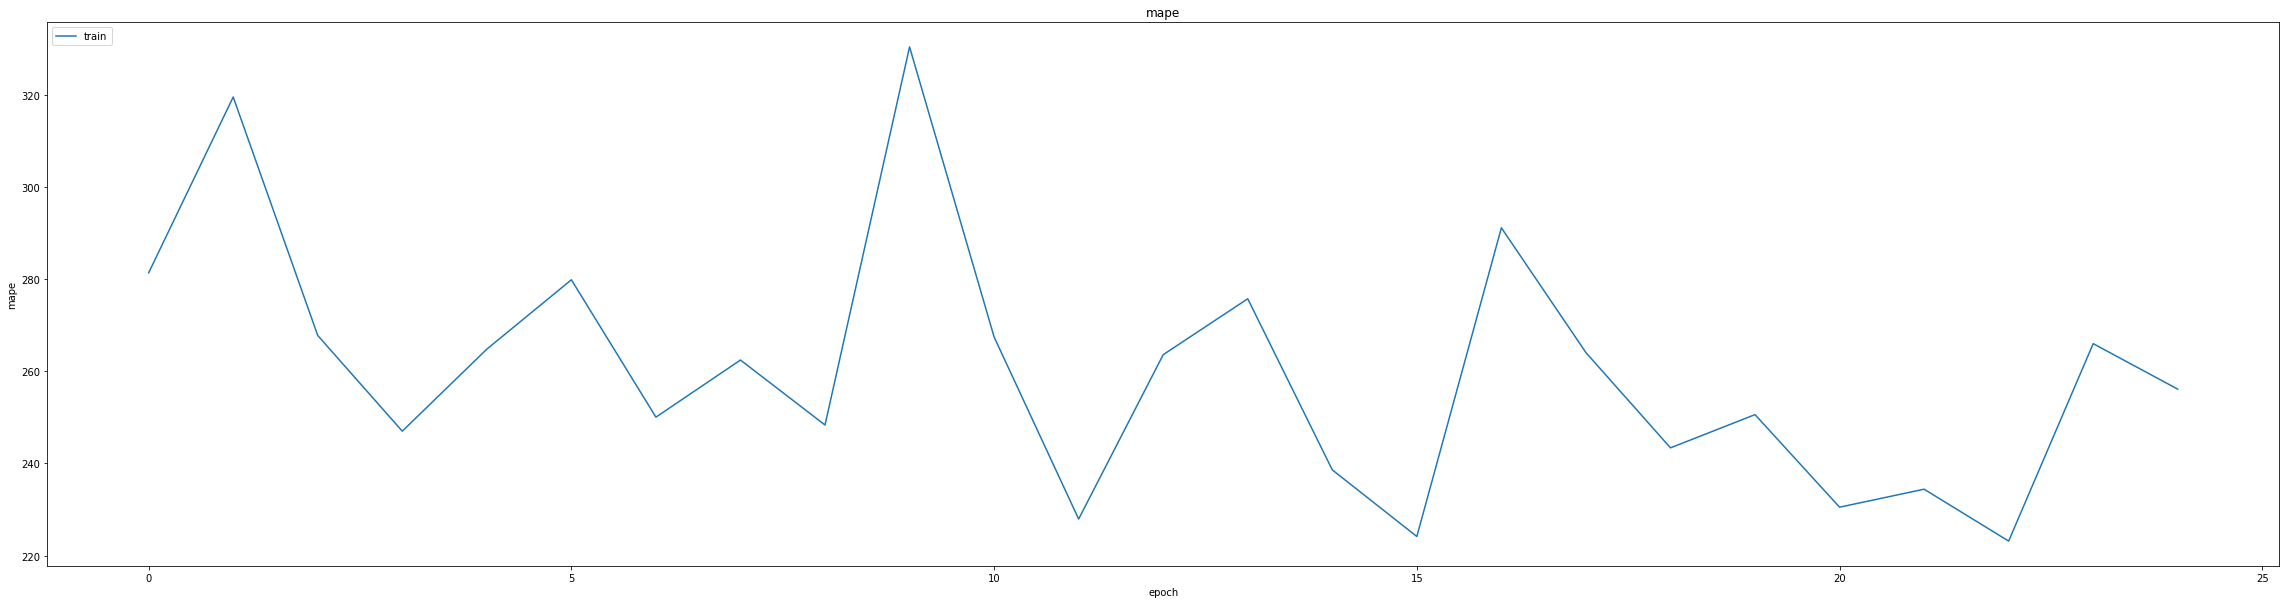

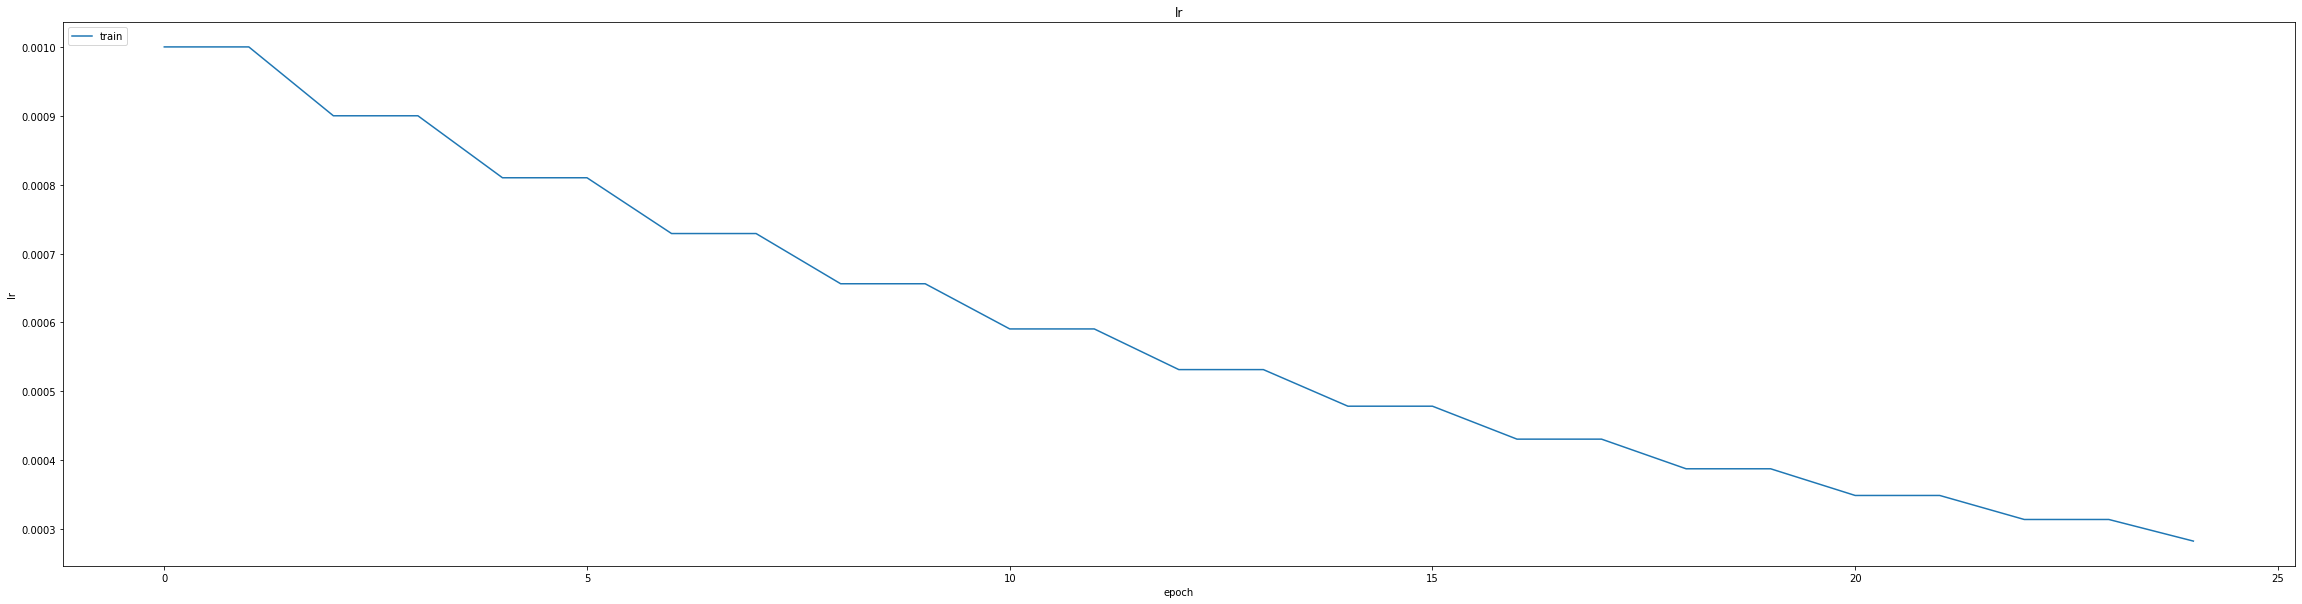

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008406500332057476
0.01184135489165783
234/234 [==============================] - 10s 37ms/step
0.9953161179199362


234/234 [==============================] - 9s 37ms/step


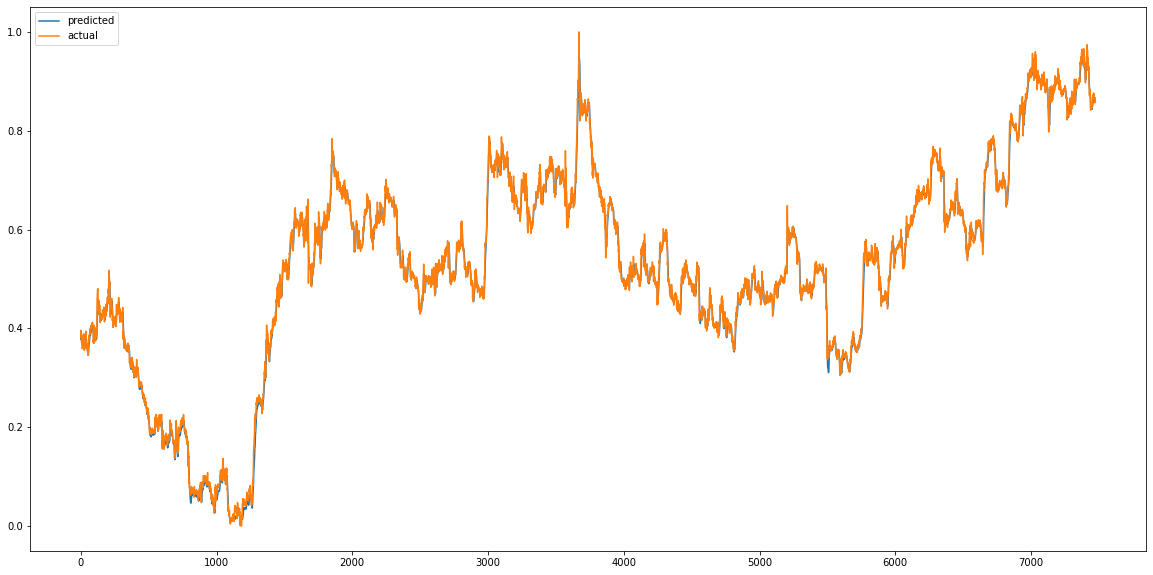

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


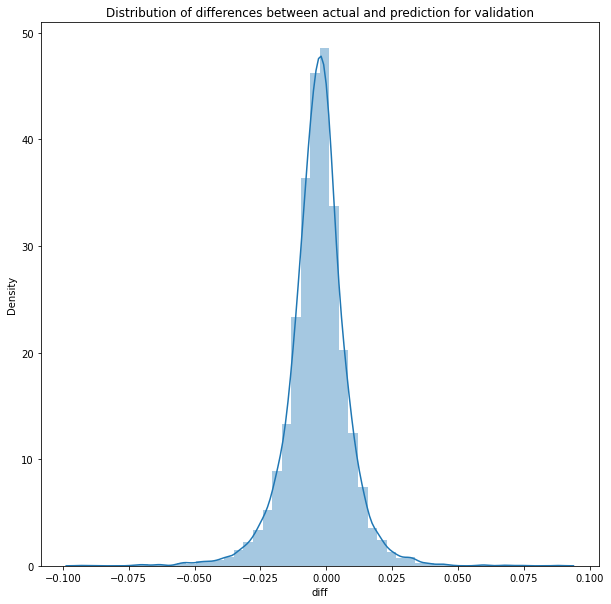

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 37ms/step


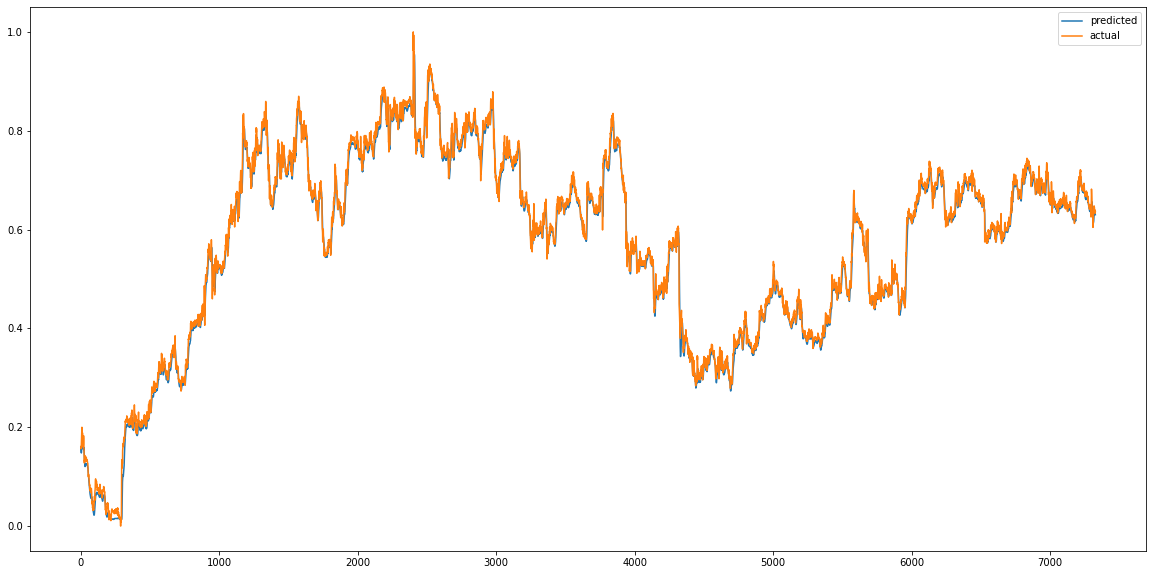

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


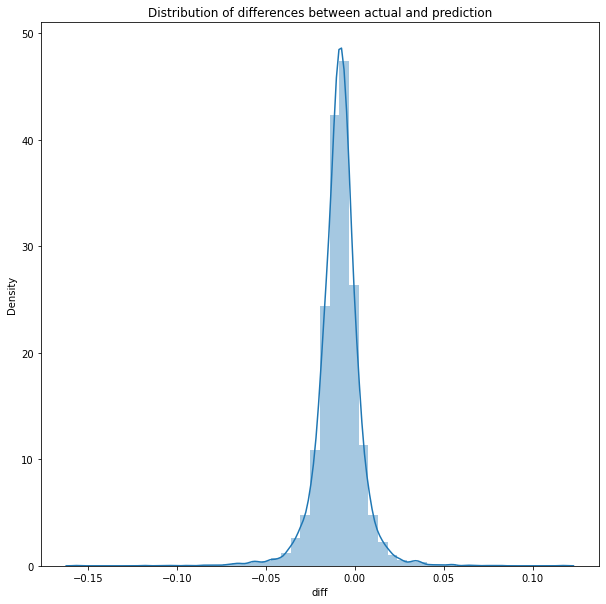

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00022322563018655888
MAE :  0.011244356164919197
RMSE  : 0.014940737270515096
229/229 [==============================] - 9s 38ms/step
R2_Score  : 0.9941985092254024


count    7328.000000
mean       -0.008729
std         0.012126
min        -0.155963
25%        -0.014176
50%        -0.008334
75%        -0.003010
max         0.116798
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 342.9367 - mae: 2.5138 - mse: 342.9367 - root_mean_squared_error: 18.5186 - mape: 5744.1729
Epoch 1: val_mse improved from inf to 0.11259, saving model to weights.best.hdf5
464/464 [==============================] - 141s 289ms/step - loss: 342.9367 - mae: 2.5138 - mse: 342.9367 - root_mean_squared_error: 18.5186 - mape: 5744.1729 - val_loss: 0.1126 - val_mae: 0.2978 - val_mse: 0.1126 - val_root_mean_squared_error: 0.3355 - val_mape: 36871.4648
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0398 - mae: 0.1524 - mse: 0.0398 - root_mean_squared_error: 0.1995 - mape: 5816.7920
Epoch 2: val_mse improved from 0.11259 to 0.08481, saving model to weights.best.hdf5
464/464 [==============================] - 136s 293ms/step - loss: 0.0398 - mae: 0.1524 - mse: 0.0398 - root_mean_squared_error: 0.1995 - mape: 5816.7920 - val_loss: 0.0848 - val_mae: 0.2534 - val_mse: 0.0848 - val_root_mean_squared_error: 

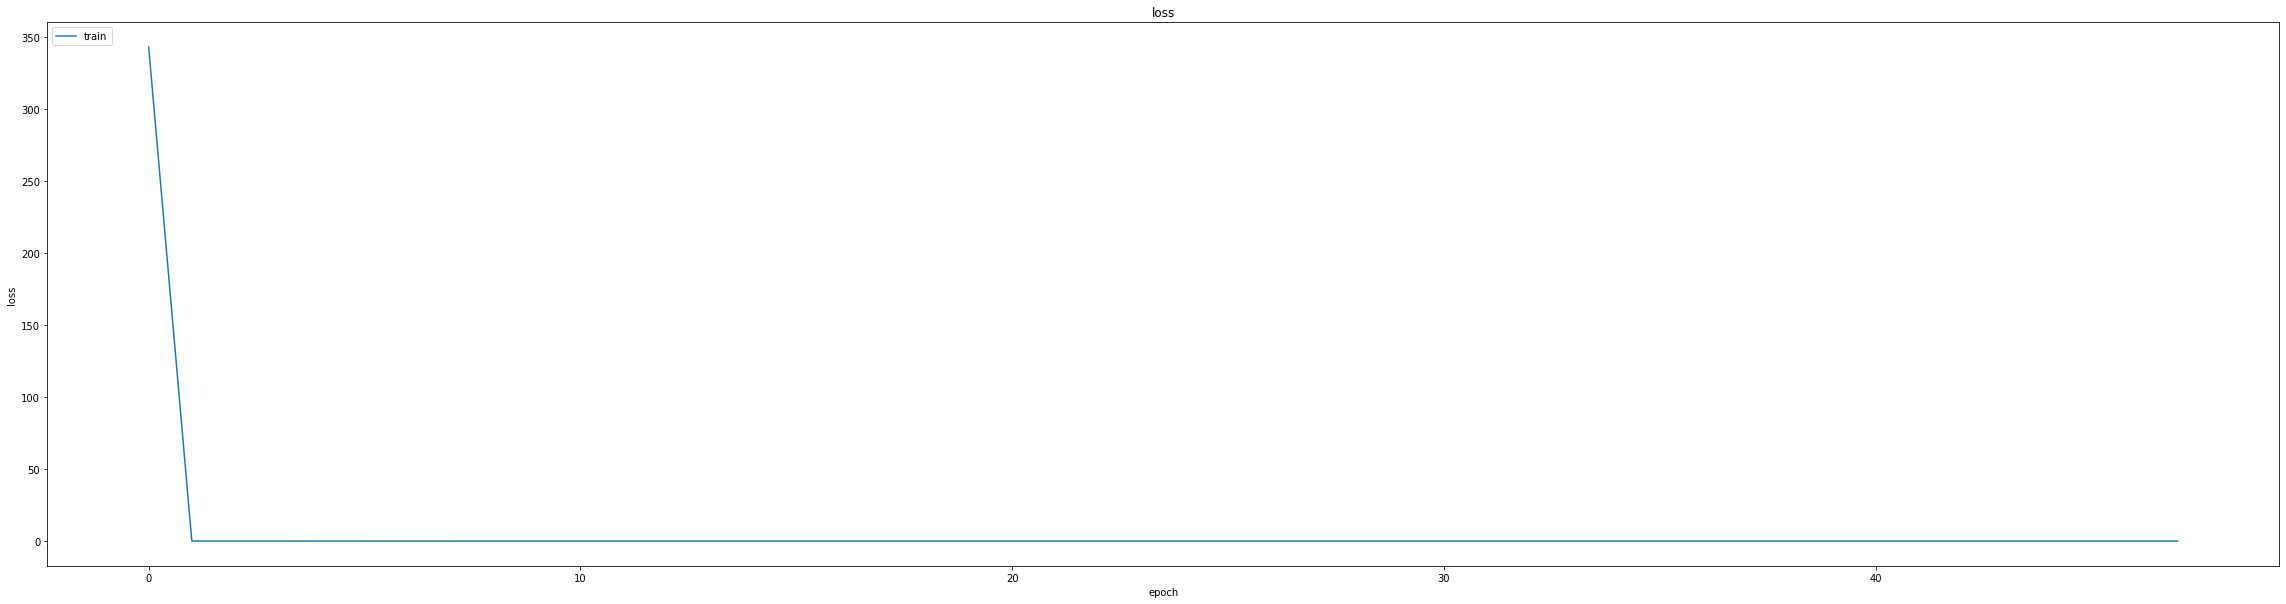

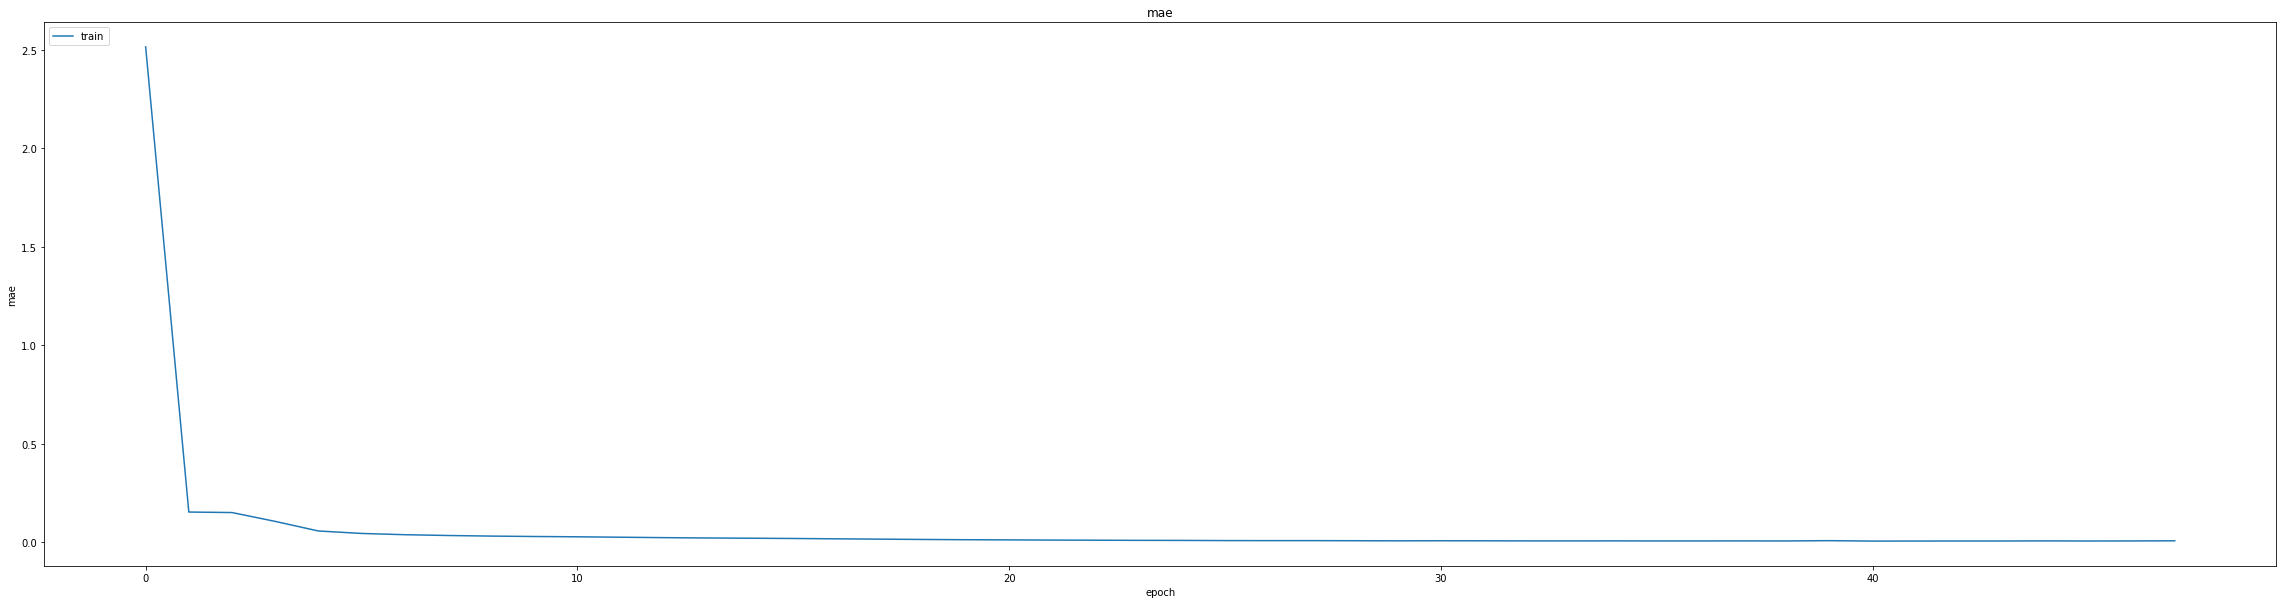

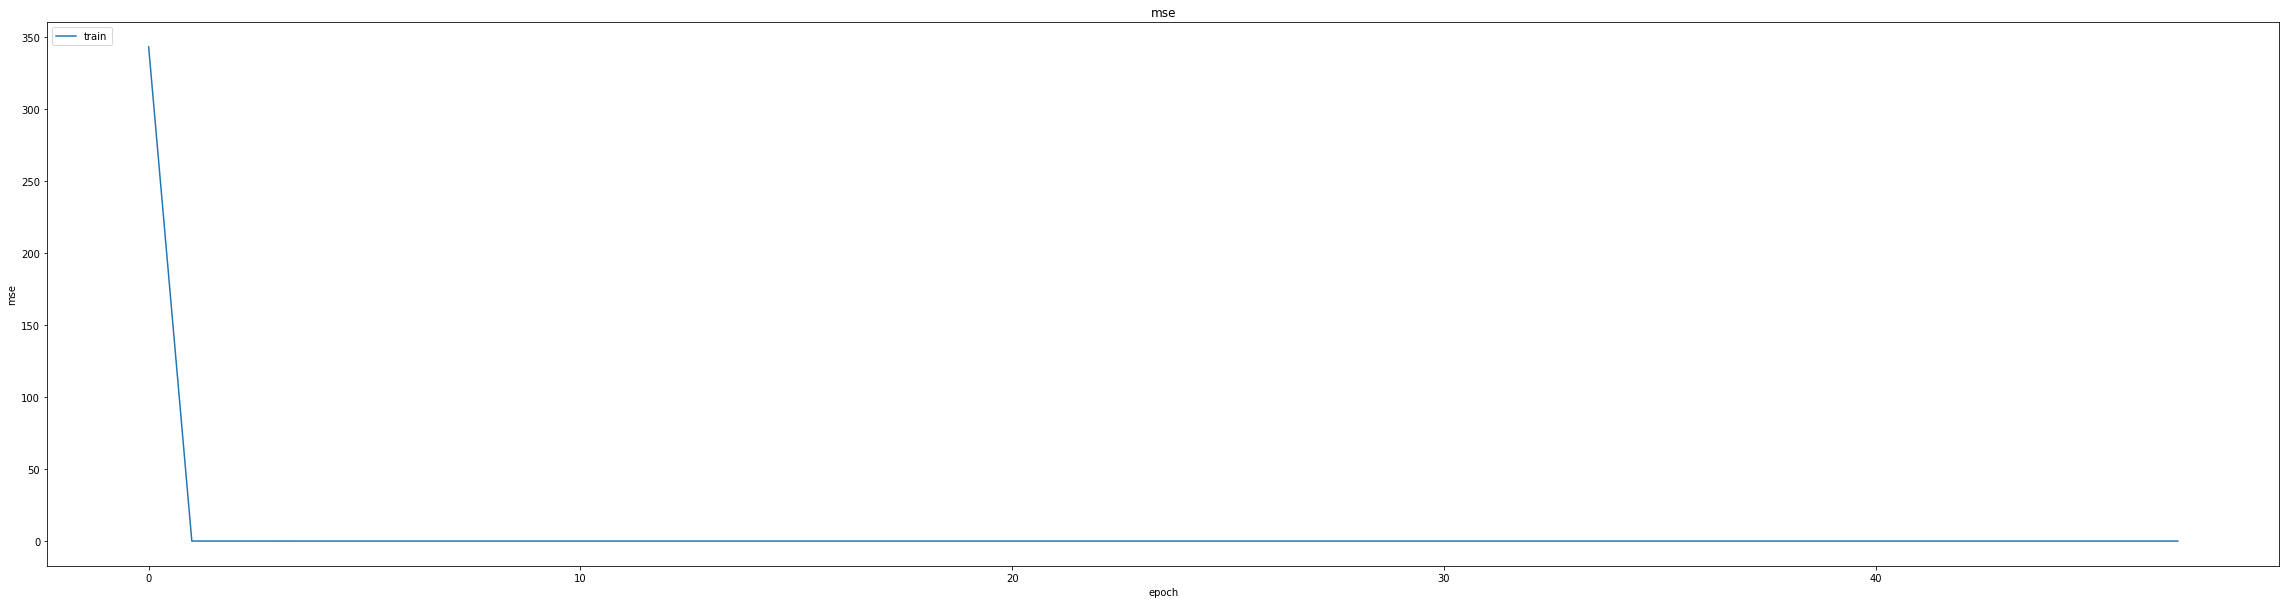

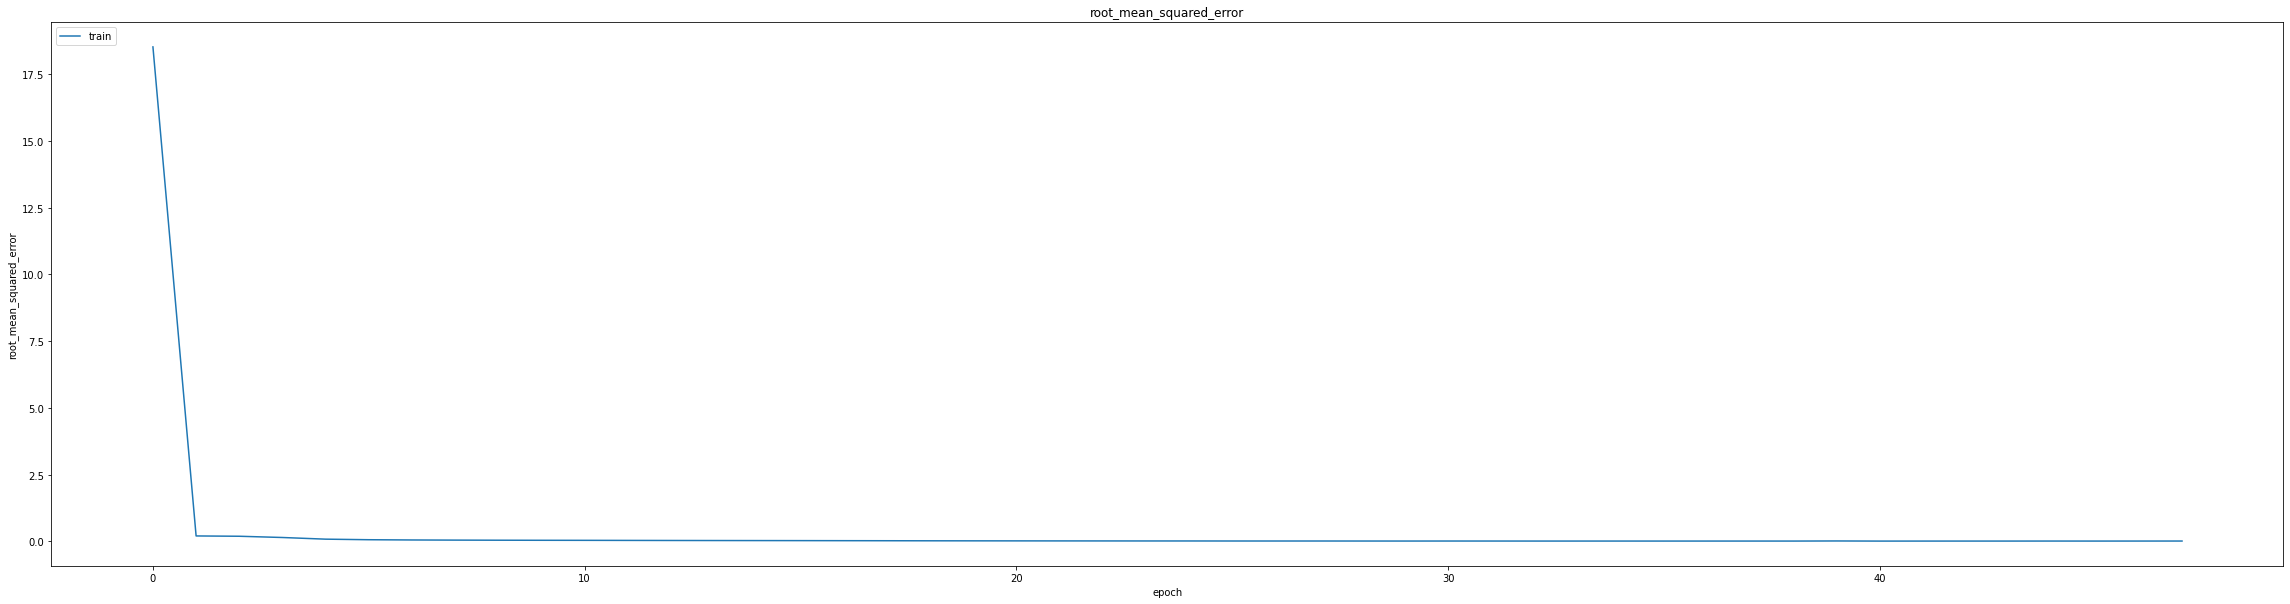

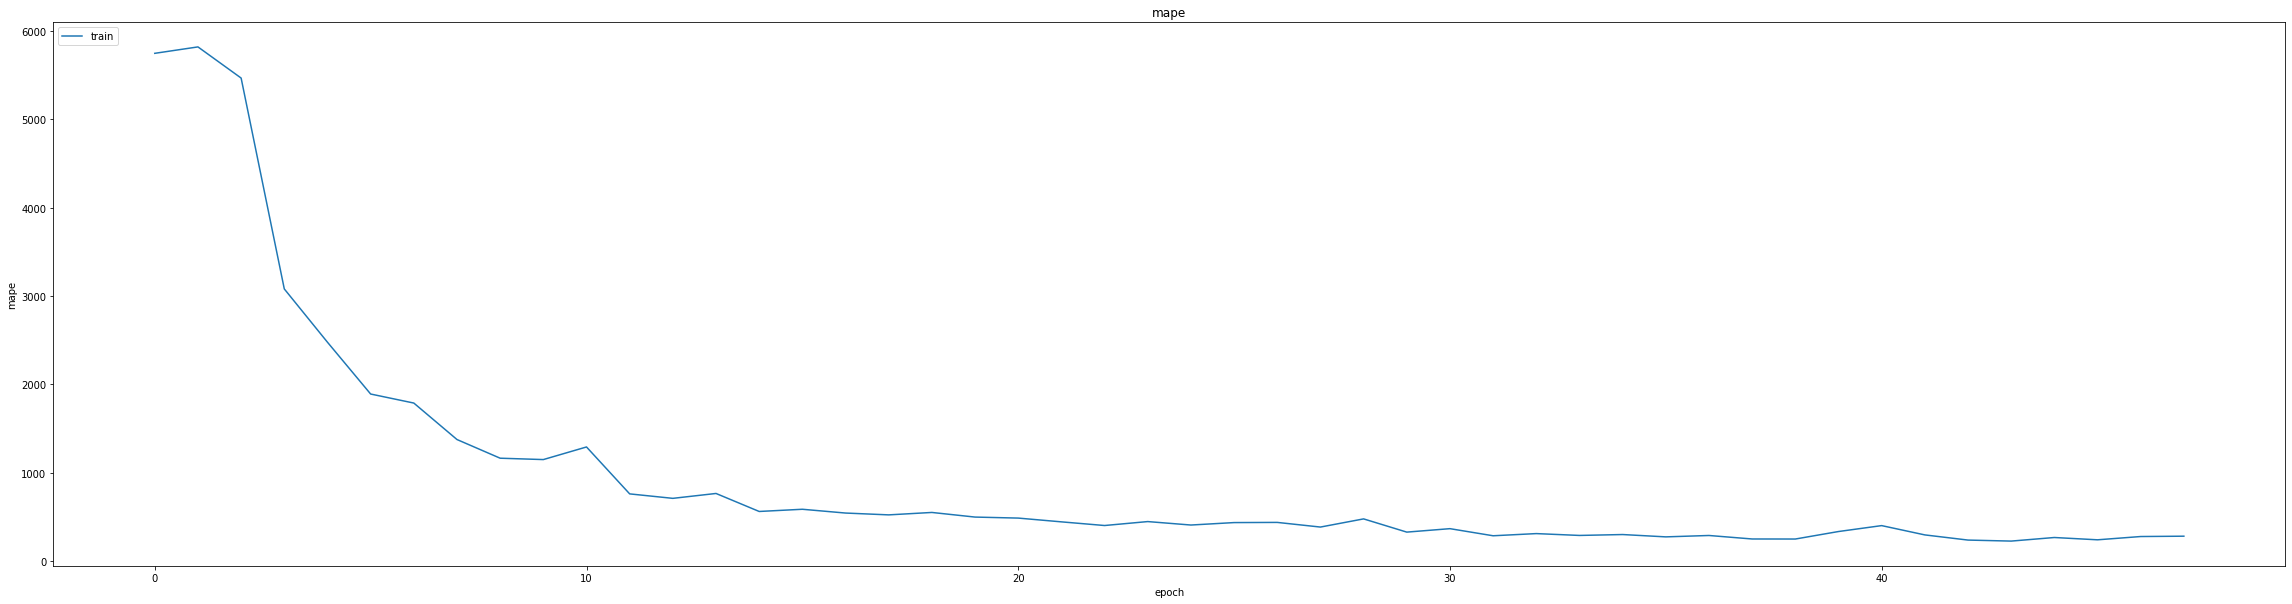

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0278254896402359
0.03680727630853653
234/234 [==============================] - 15s 49ms/step
0.9007041506762725


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0163 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 388.9611
Epoch 1: val_mse did not improve from 0.00135
464/464 [==============================] - 150s 306ms/step - loss: 0.0011 - mae: 0.0163 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 388.9611 - val_loss: 0.0018 - val_mae: 0.0327 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 1804.9178 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.2175e-04 - mae: 0.0082 - mse: 1.2175e-04 - root_mean_squared_error: 0.0110 - mape: 287.8632
Epoch 2: val_mse improved from 0.00135 to 0.00113, saving model to weights.best.hdf5
464/464 [==============================] - 138s 298ms/step - loss: 1.2175e-04 - mae: 0.0082 - mse: 1.2175e-04 - root_mean_squared_error: 0.0110 - mape: 287.8632 - val_loss: 0.0011 - val_mae: 0.0250 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 18

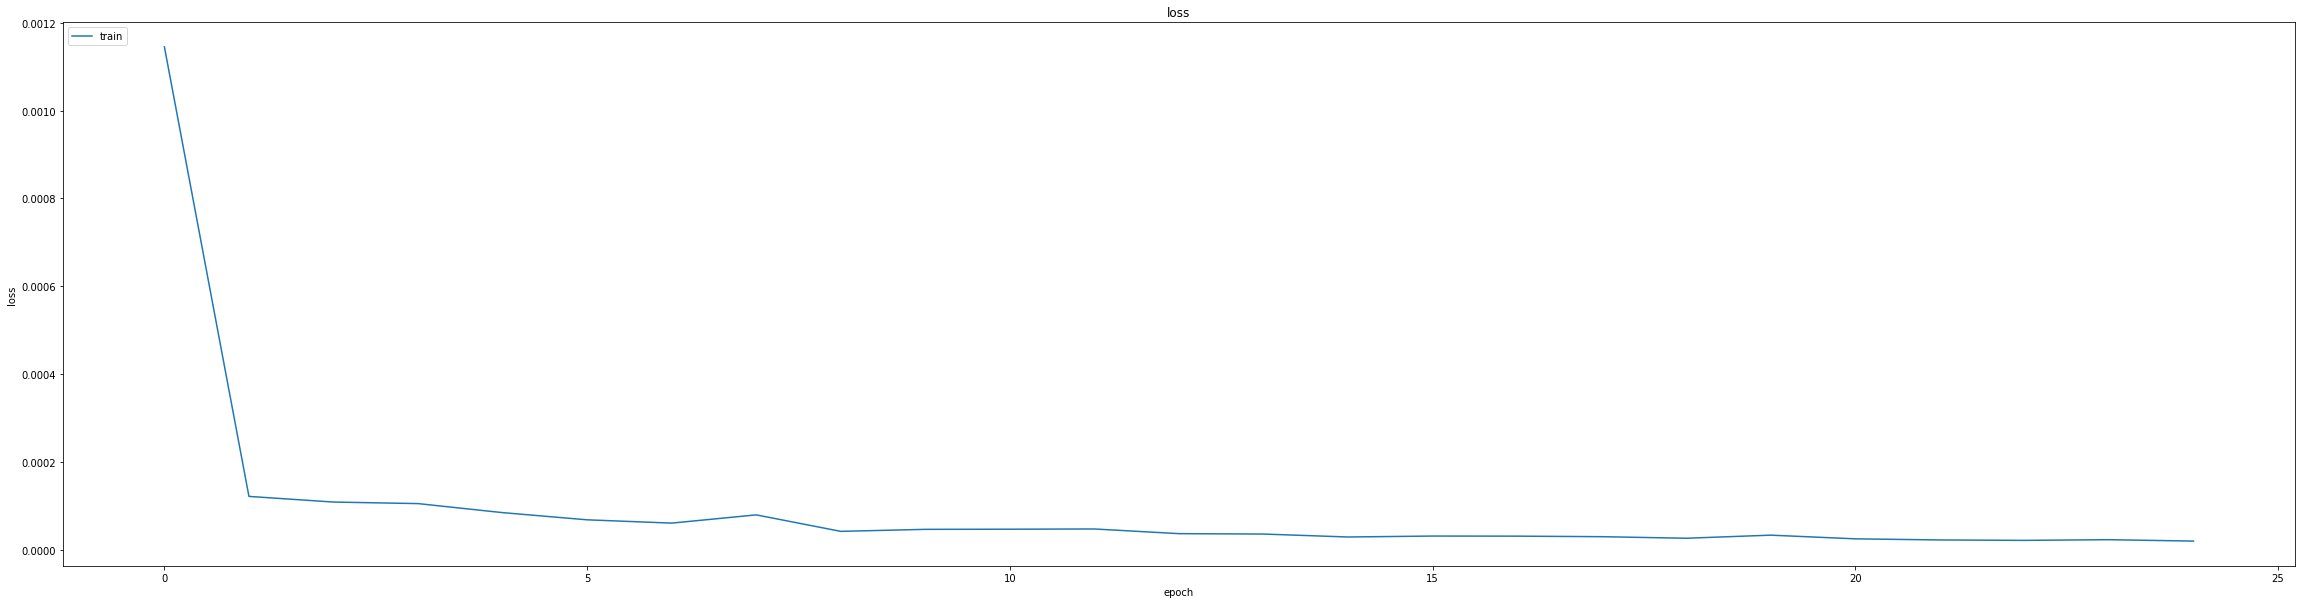

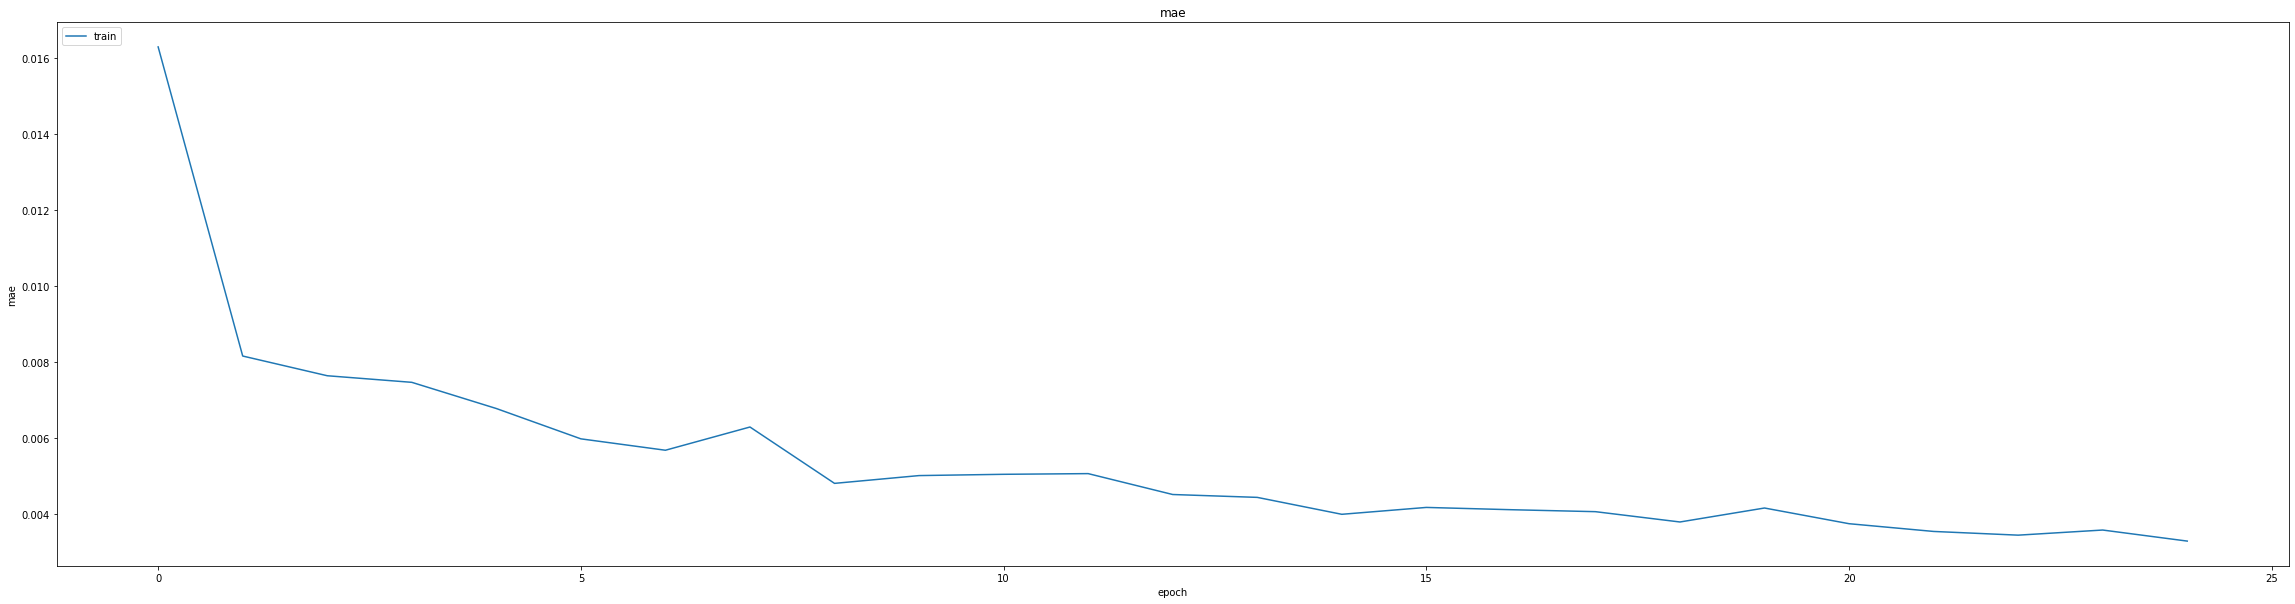

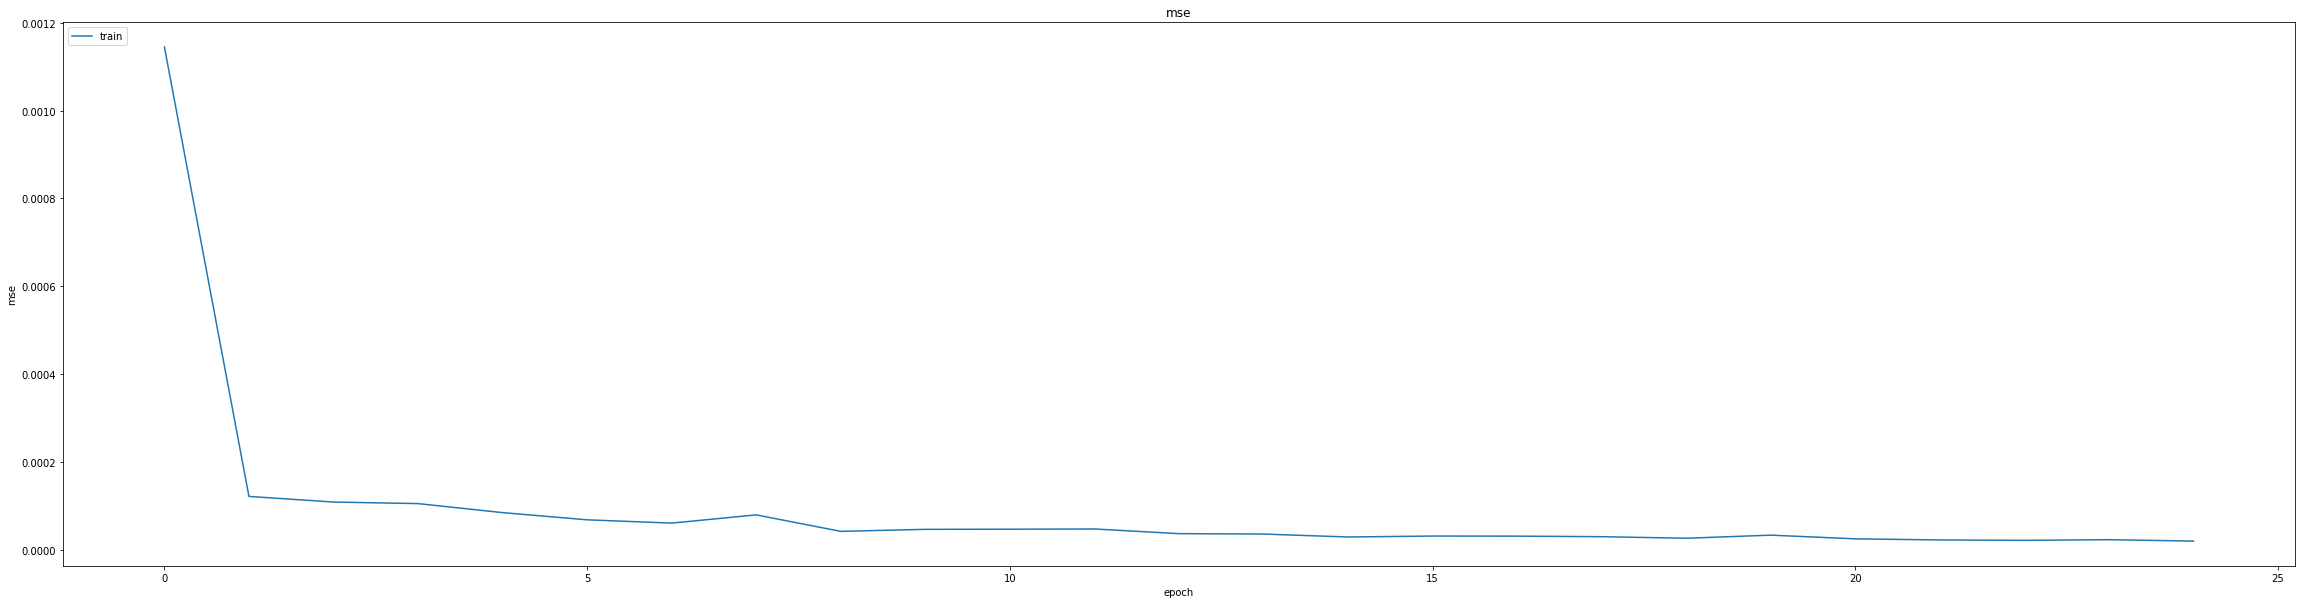

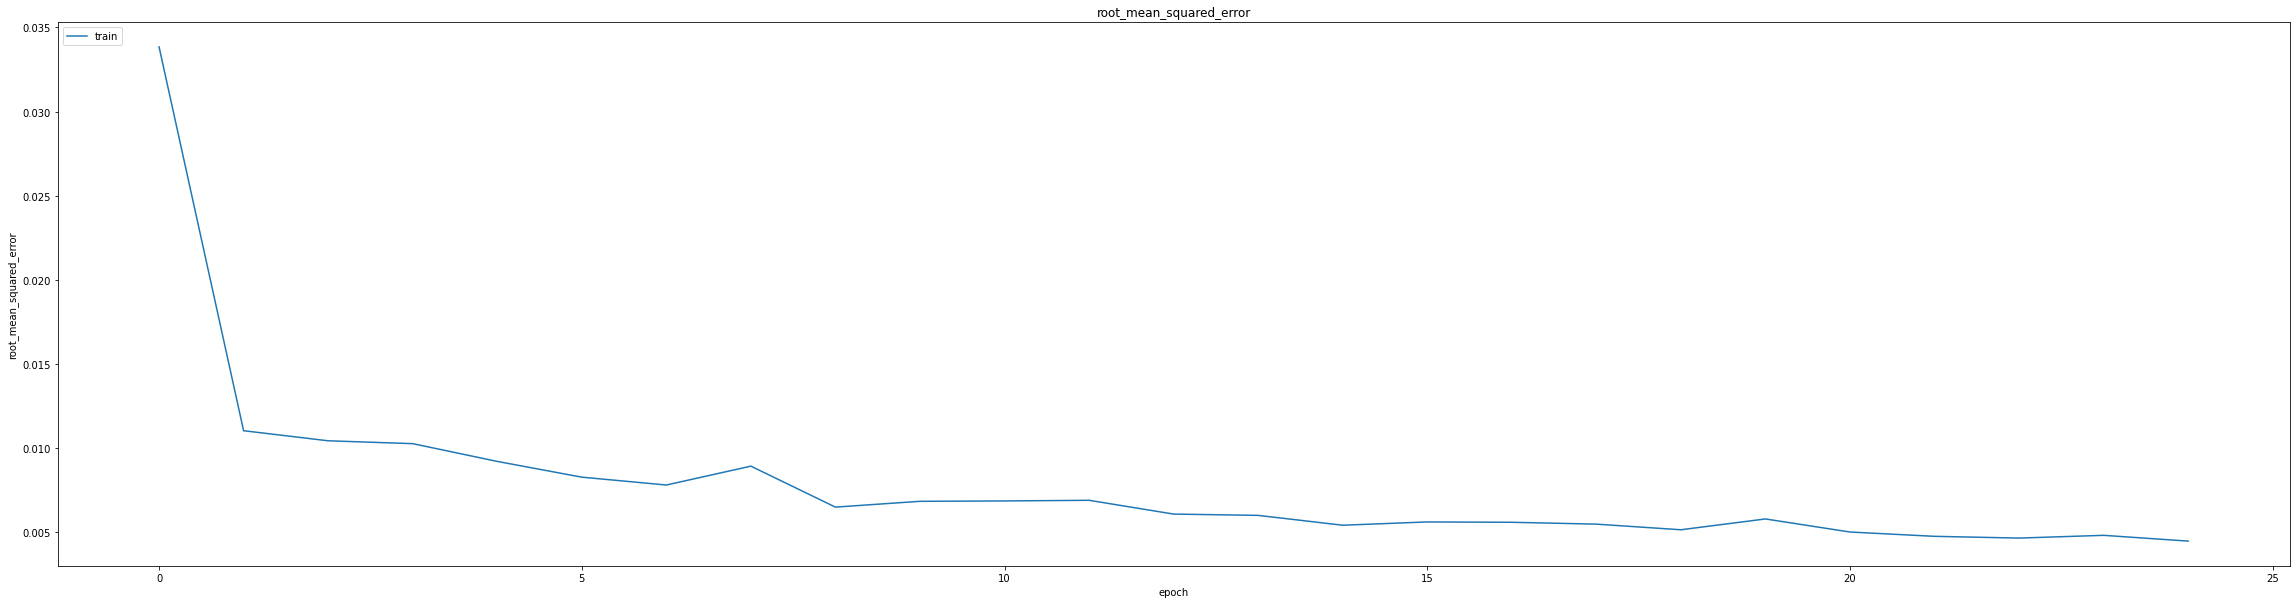

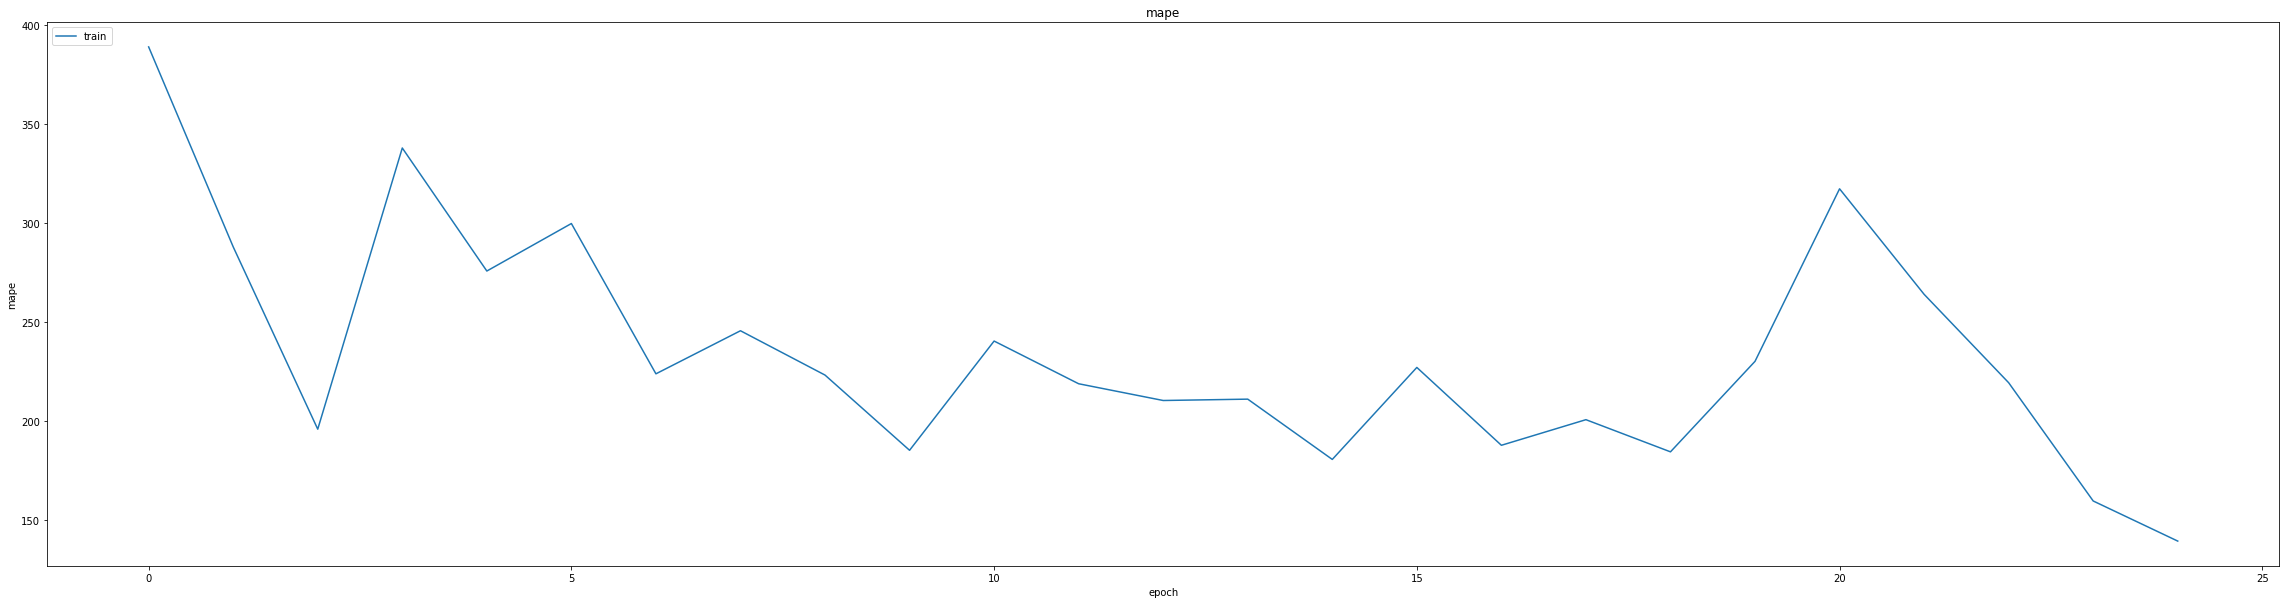

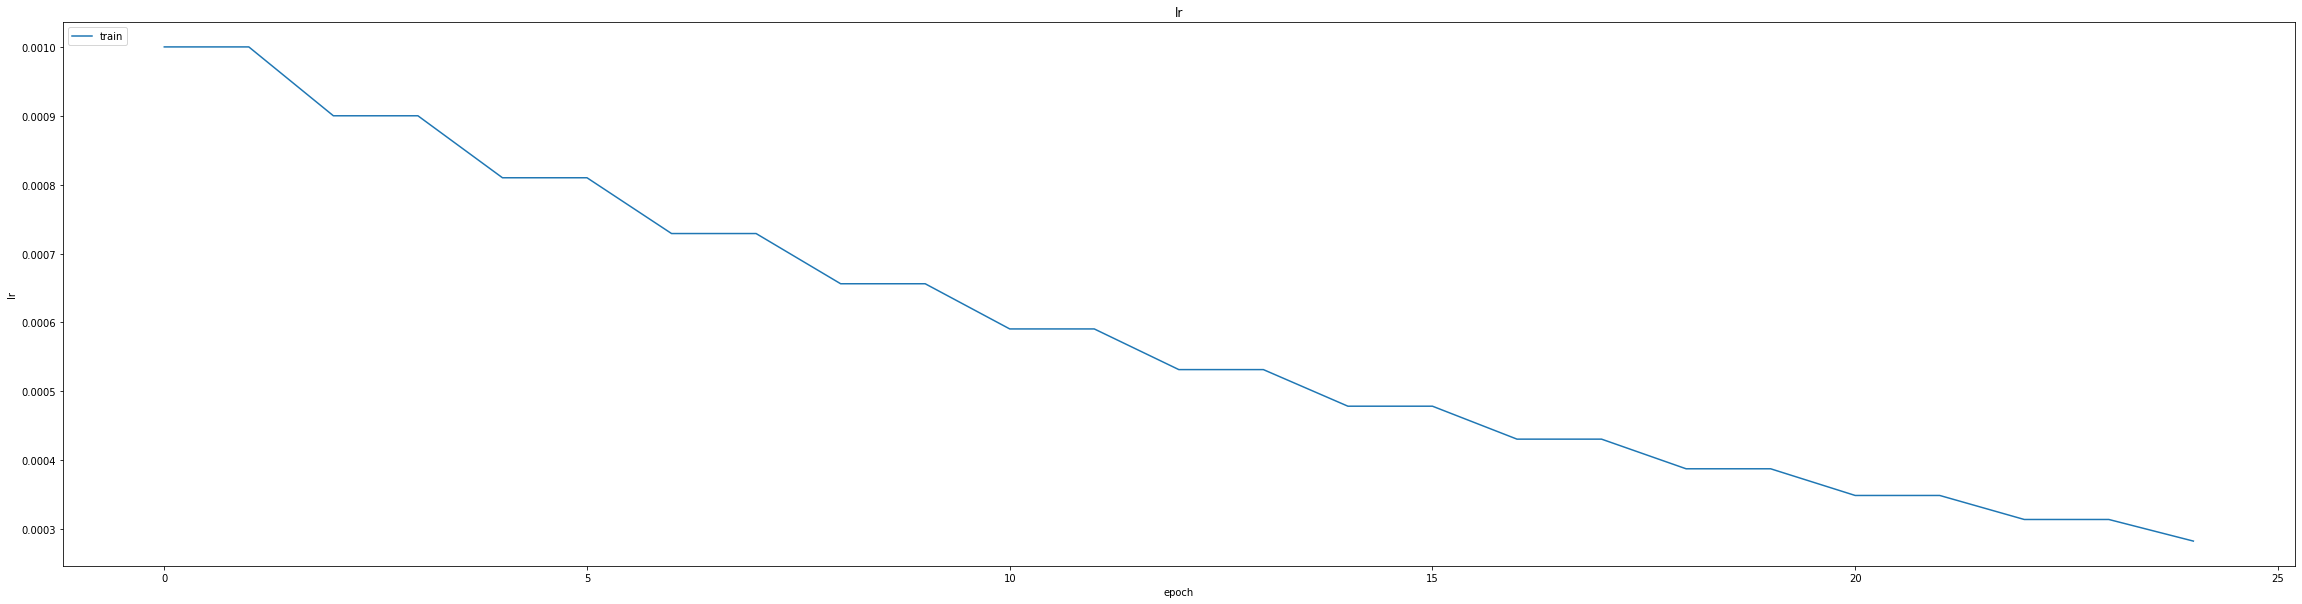

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.023100661113858223
0.02885967679321766
234/234 [==============================] - 10s 37ms/step
0.9601305890757976


234/234 [==============================] - 14s 59ms/step


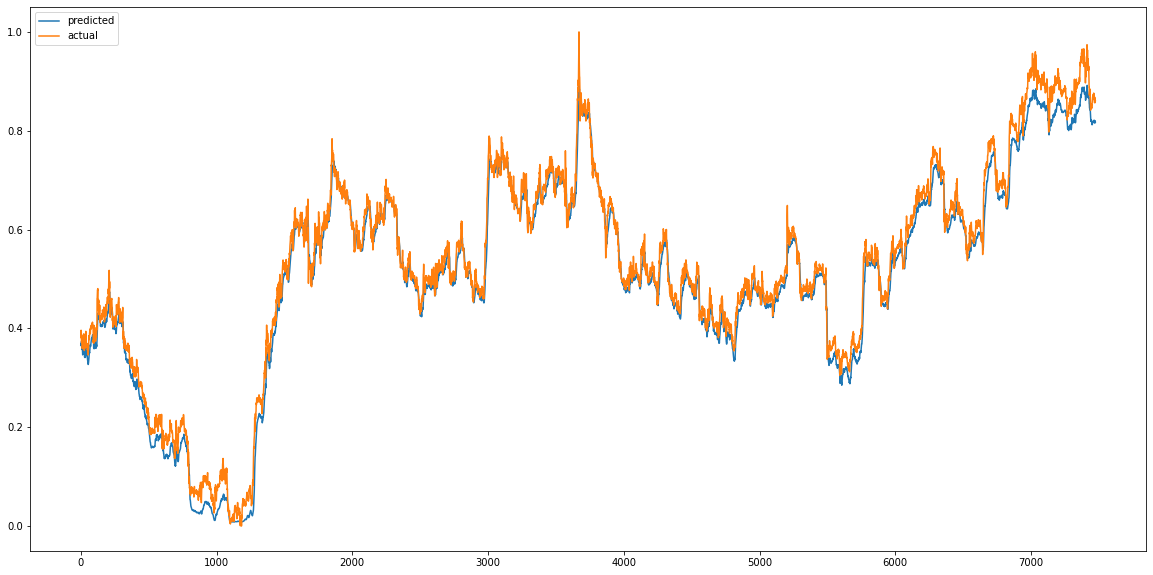

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


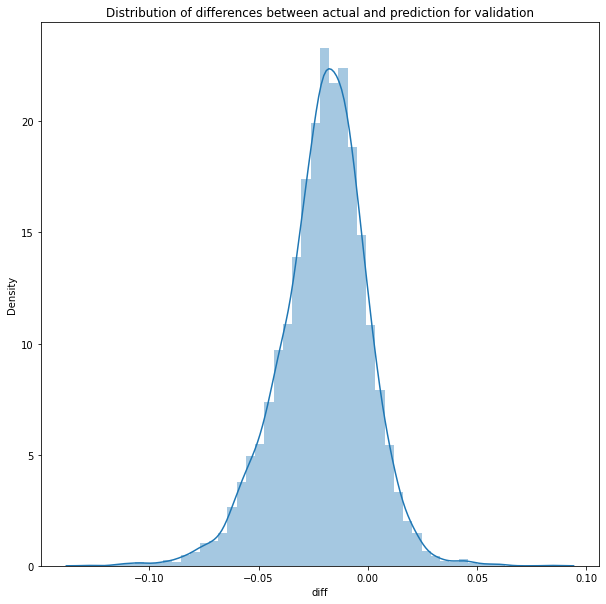

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 38ms/step


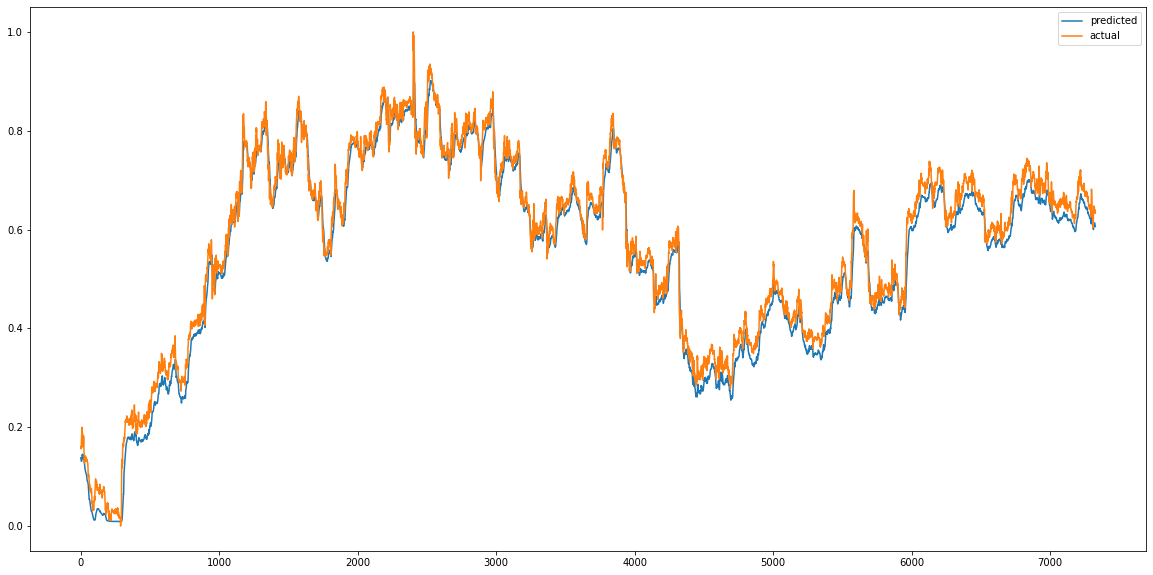

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


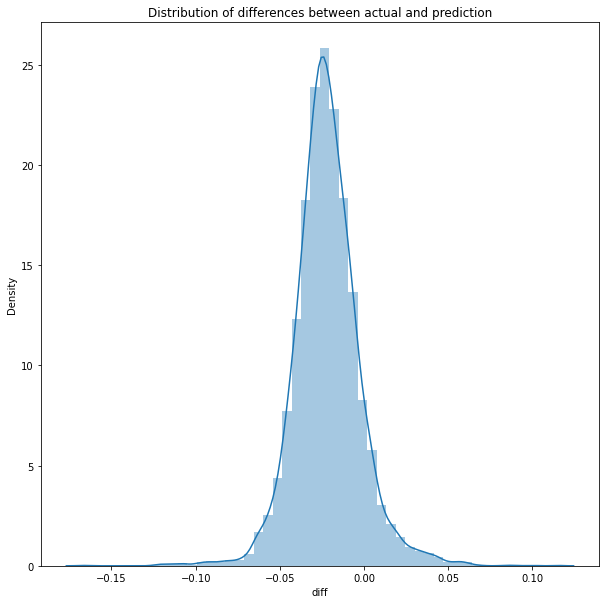

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0008633953526445796
MAE :  0.02489382309565121
RMSE  : 0.029383589852919258
229/229 [==============================] - 9s 38ms/step
R2_Score  : 0.9775609092642253


count    7328.000000
mean       -0.021983
std         0.019499
min        -0.166964
25%        -0.033041
50%        -0.022882
75%        -0.011464
max         0.114584
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 299.5937 - mae: 2.3418 - mse: 299.5937 - root_mean_squared_error: 17.3088 - mape: 11063.2617
Epoch 1: val_mse improved from inf to 0.04610, saving model to weights.best.hdf5
464/464 [==============================] - 106s 220ms/step - loss: 299.5937 - mae: 2.3418 - mse: 299.5937 - root_mean_squared_error: 17.3088 - mape: 11063.2617 - val_loss: 0.0461 - val_mae: 0.1661 - val_mse: 0.0461 - val_root_mean_squared_error: 0.2147 - val_mape: 66266.3125
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0406 - mae: 0.1682 - mse: 0.0406 - root_mean_squared_error: 0.2014 - mape: 7136.0991
Epoch 2: val_mse improved from 0.04610 to 0.01081, saving model to weights.best.hdf5
464/464 [==============================] - 101s 217ms/step - loss: 0.0406 - mae: 0.1682 - mse: 0.0406 - root_mean_squared_error: 0.2014 - mape: 7136.0991 - val_loss: 0.0108 - val_mae: 0.0610 - val_mse: 0.0108 - val_root_mean_squared_error

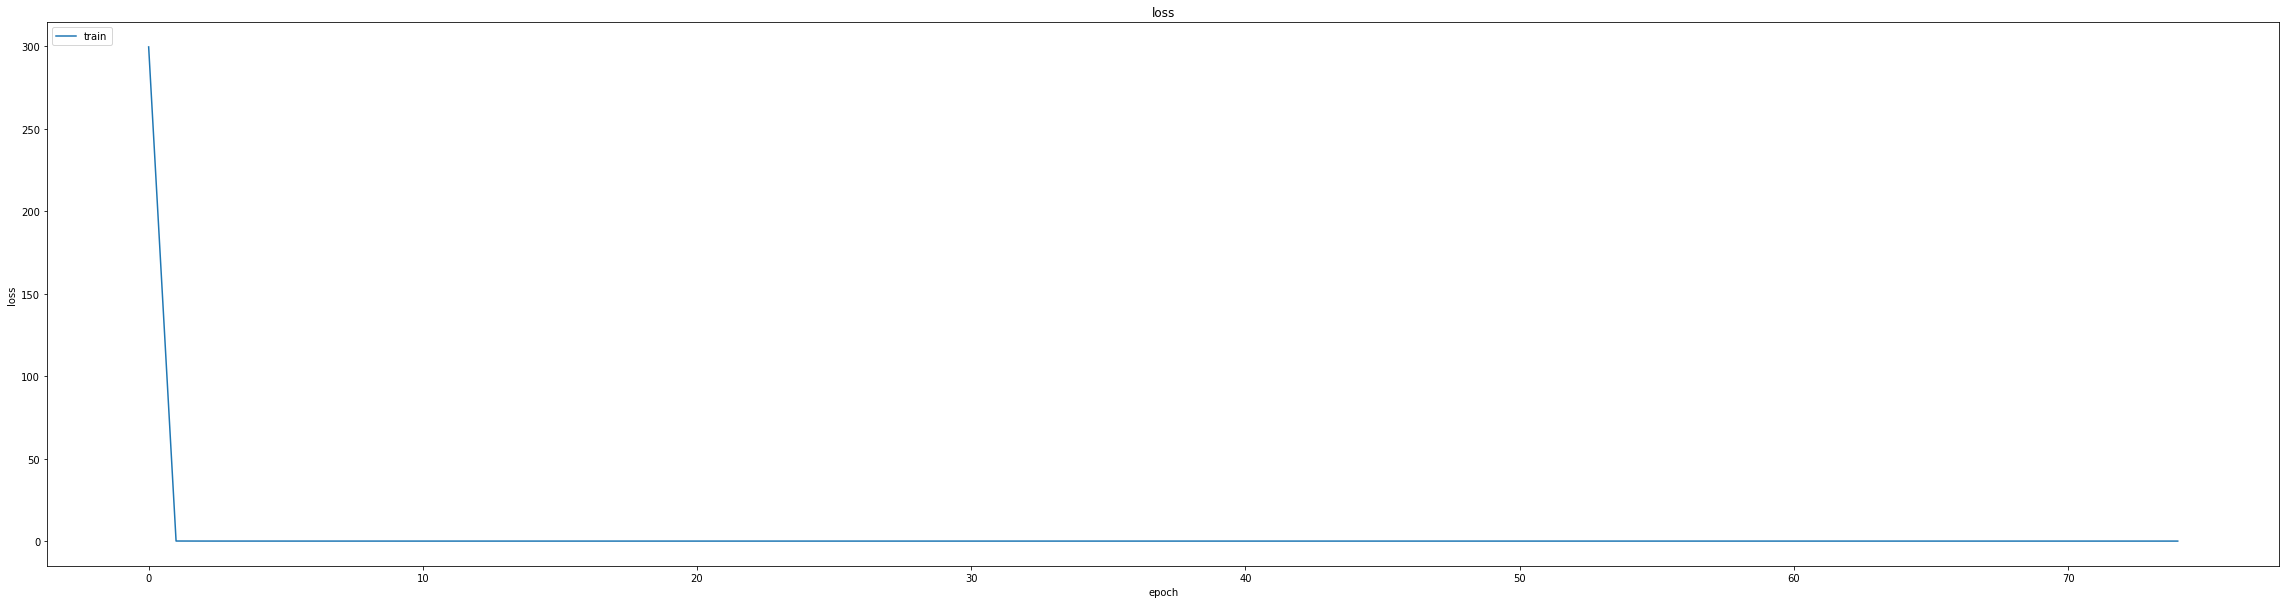

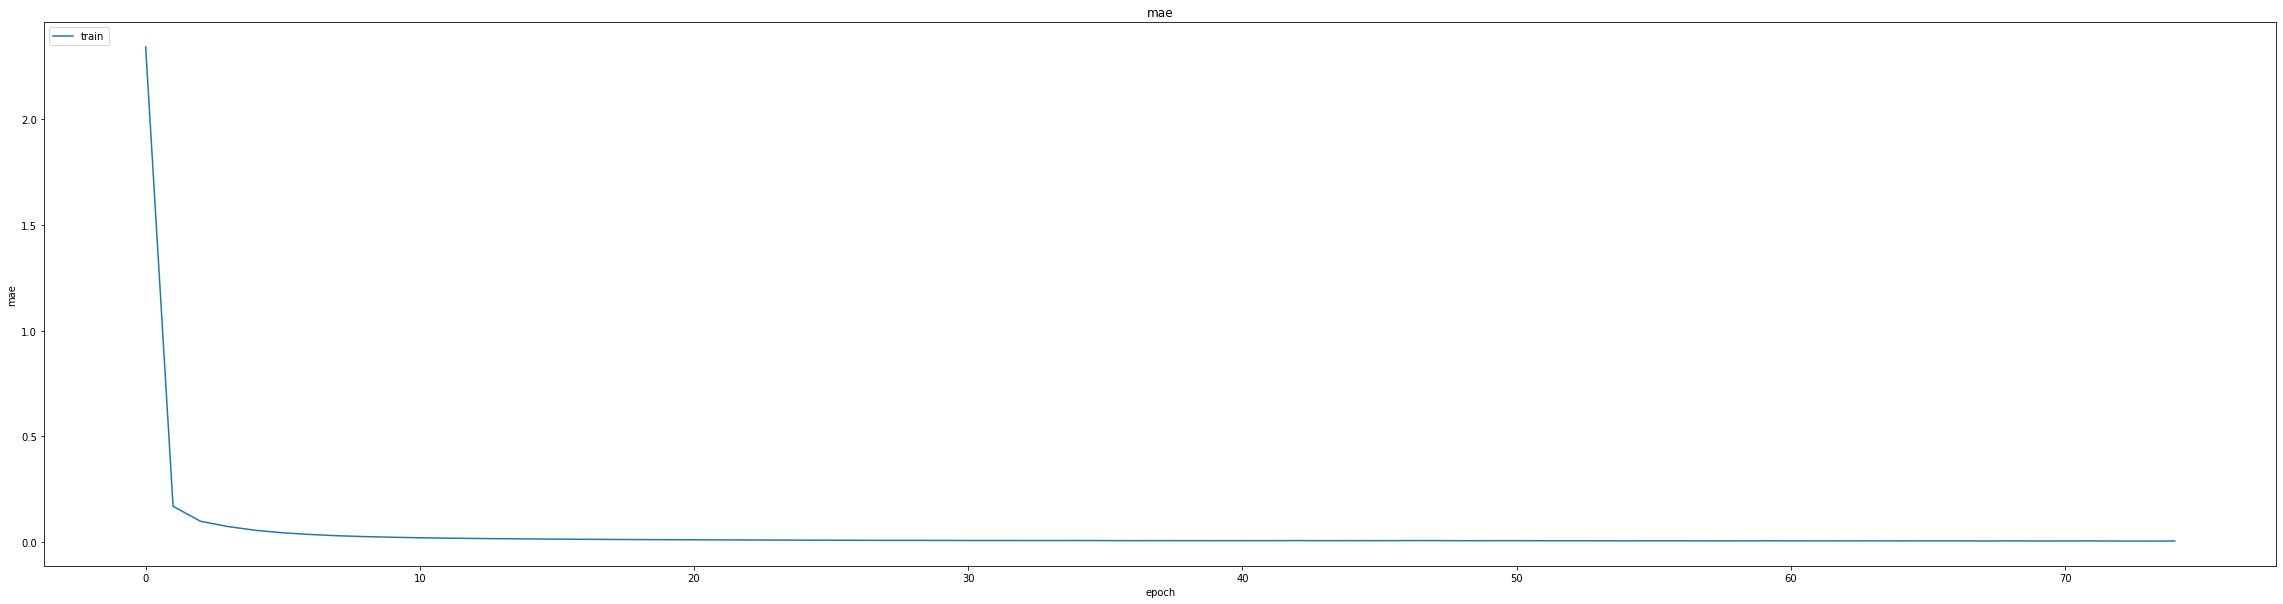

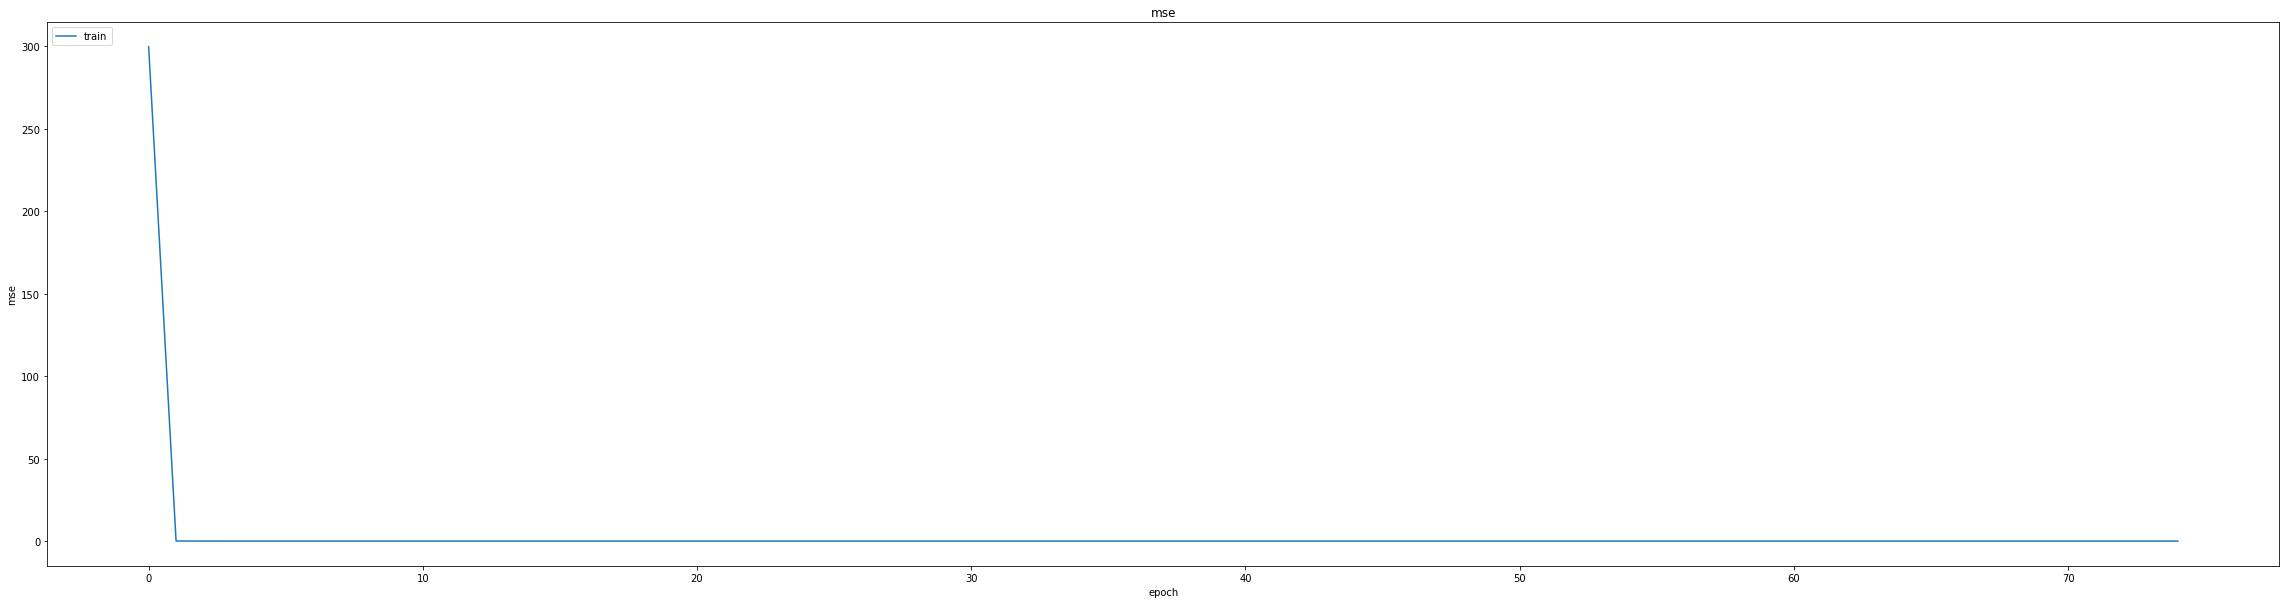

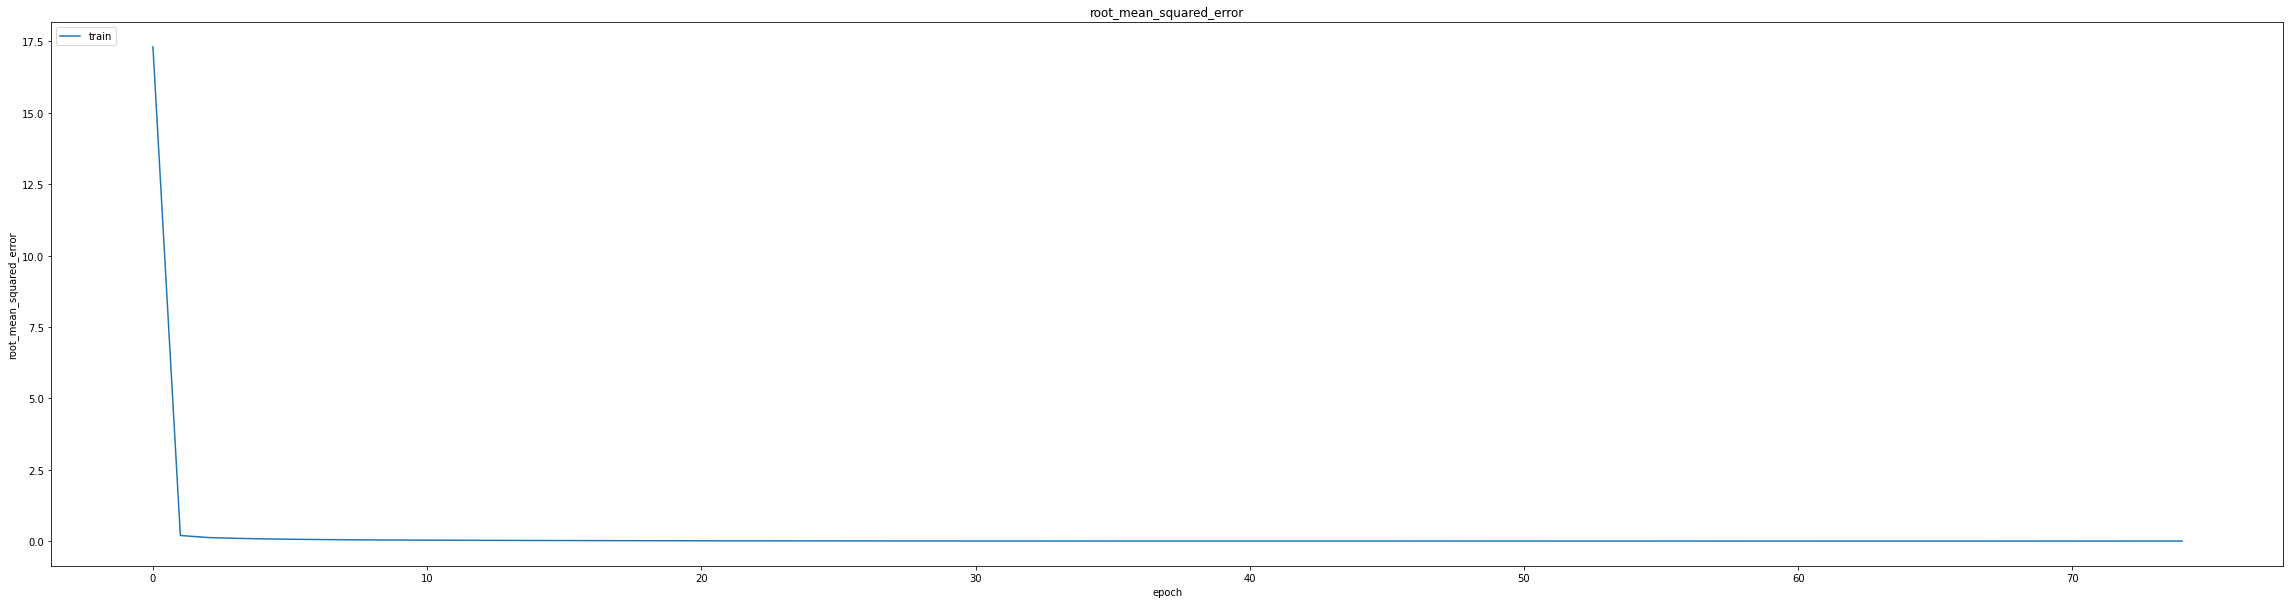

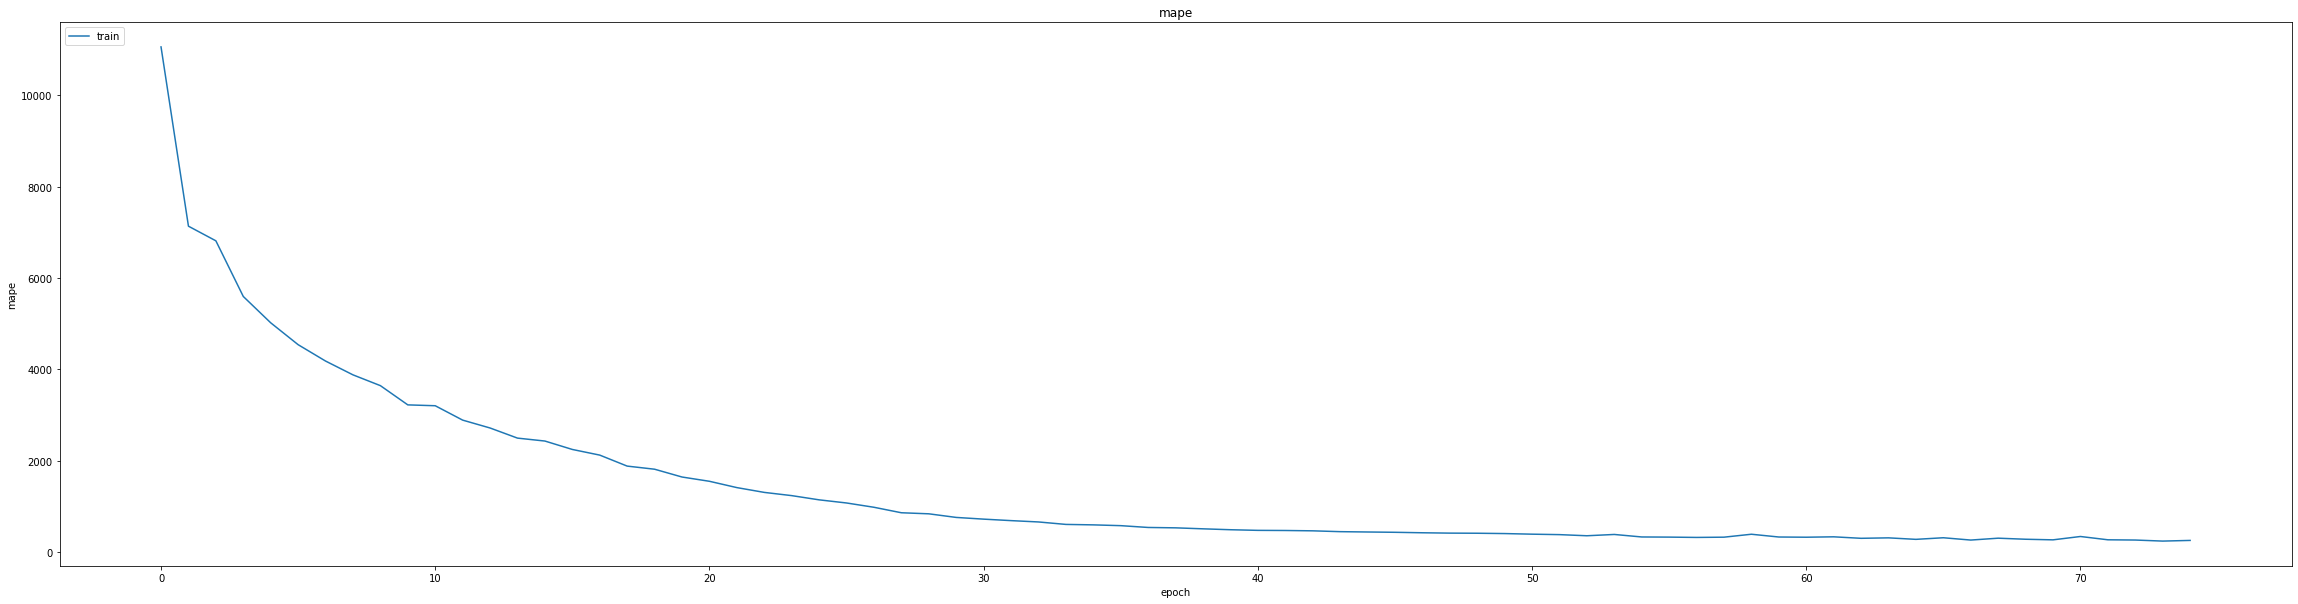

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014126133173704147
0.01901952177286148
234/234 [==============================] - 7s 29ms/step
0.9883944389964134


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 9.4324e-05 - mae: 0.0046 - mse: 9.4324e-05 - root_mean_squared_error: 0.0097 - mape: 340.9438
Epoch 1: val_mse did not improve from 0.00036
464/464 [==============================] - 119s 248ms/step - loss: 9.4324e-05 - mae: 0.0046 - mse: 9.4324e-05 - root_mean_squared_error: 0.0097 - mape: 340.9438 - val_loss: 7.0670e-04 - val_mae: 0.0225 - val_mse: 7.0670e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 2519.3186 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.9887e-05 - mae: 0.0032 - mse: 1.9887e-05 - root_mean_squared_error: 0.0045 - mape: 261.3970
Epoch 2: val_mse did not improve from 0.00036
464/464 [==============================] - 108s 232ms/step - loss: 1.9887e-05 - mae: 0.0032 - mse: 1.9887e-05 - root_mean_squared_error: 0.0045 - mape: 261.3970 - val_loss: 4.6576e-04 - val_mae: 0.0169 - val_mse: 4.6576e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 2426.9436

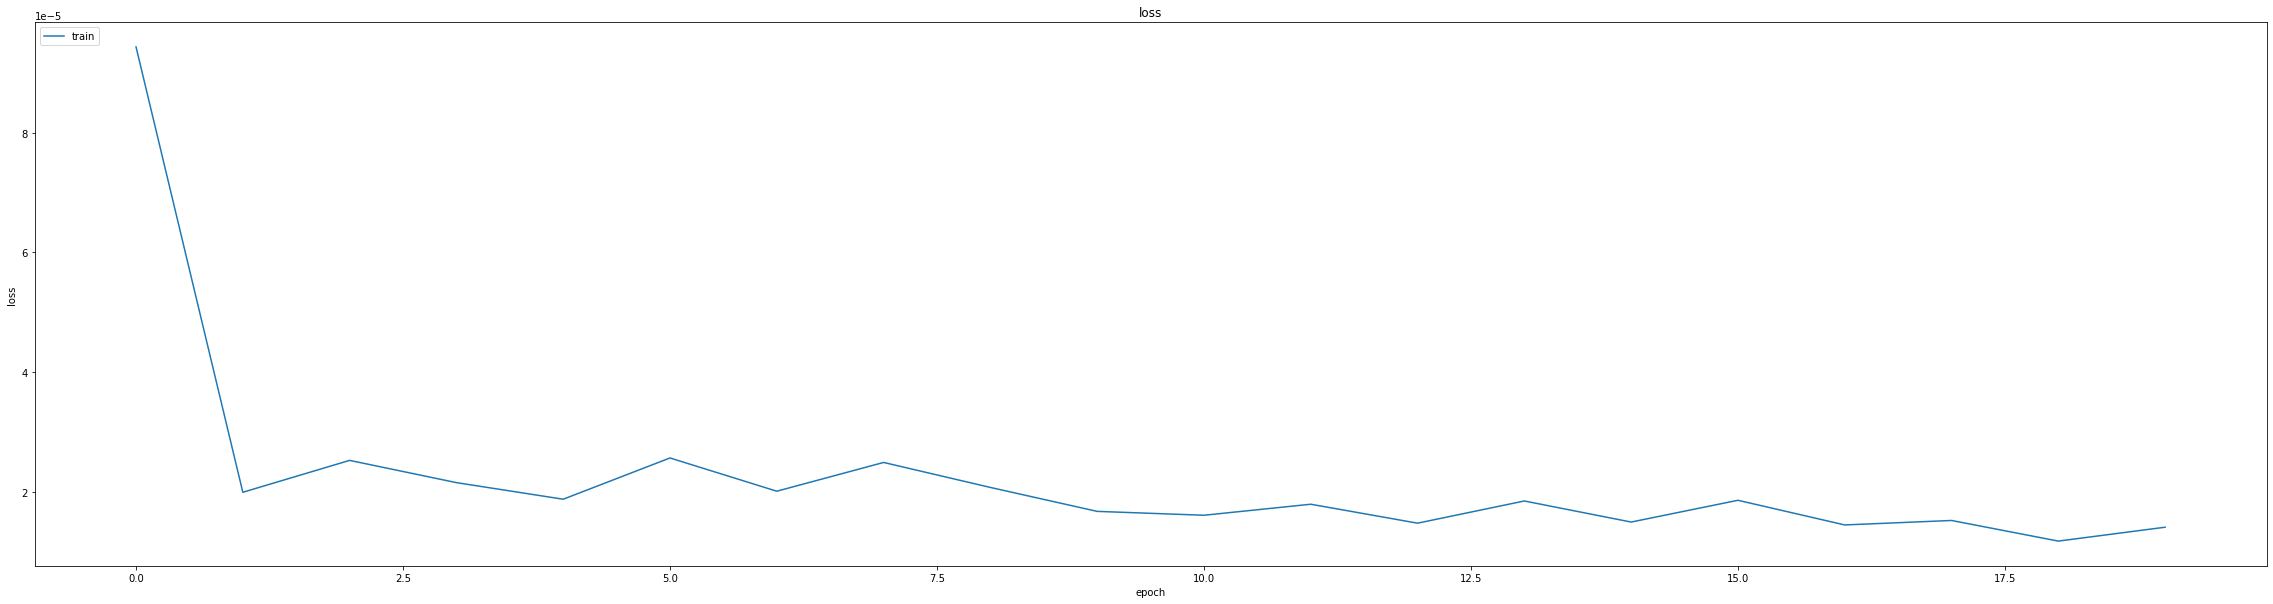

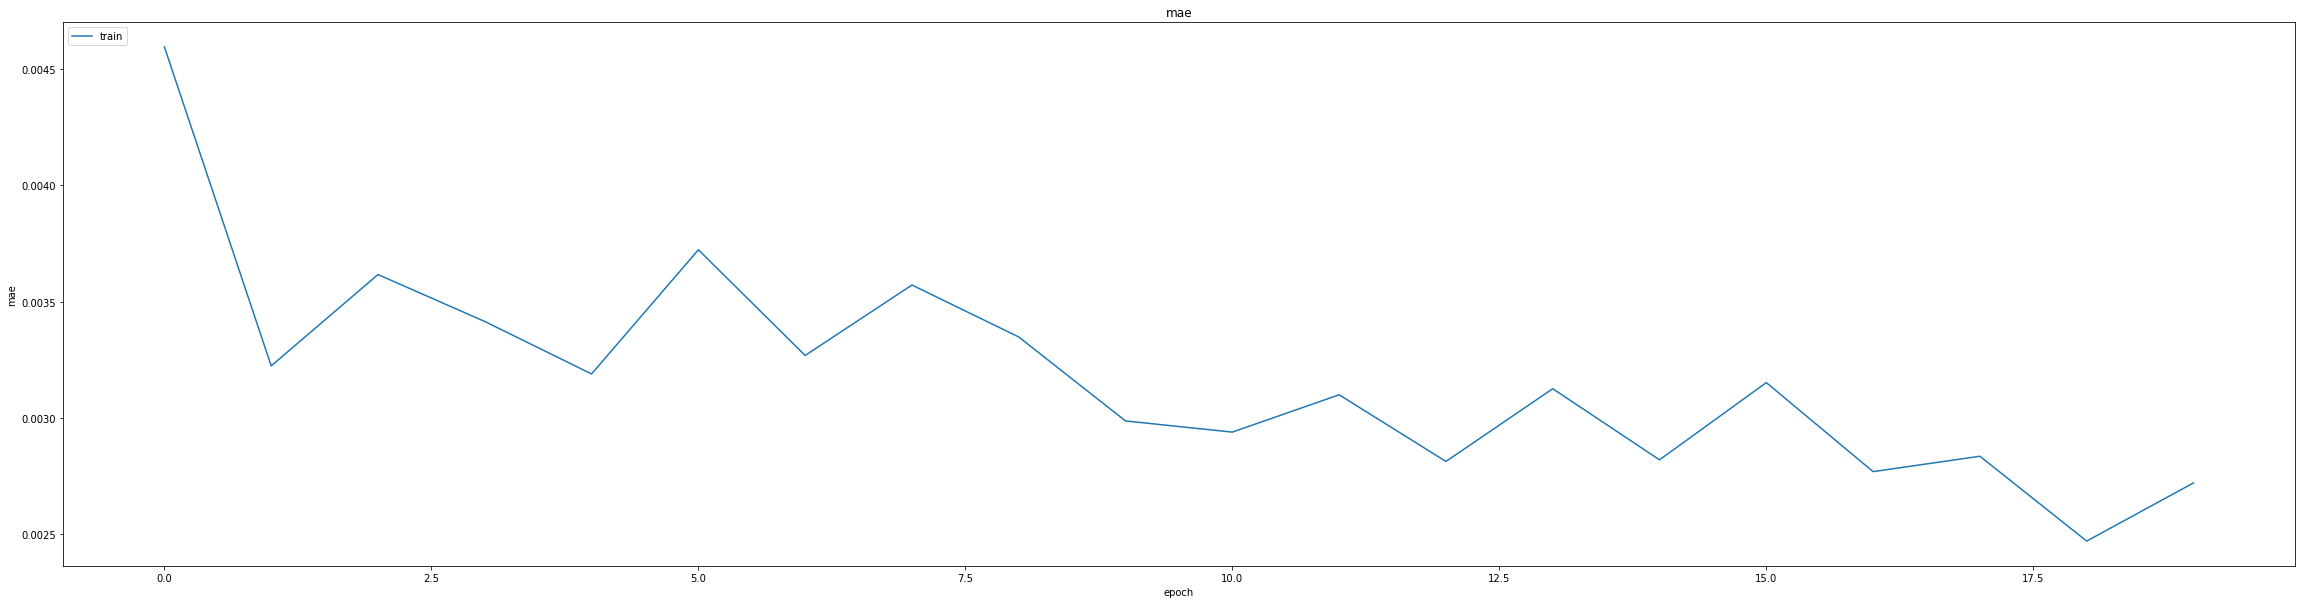

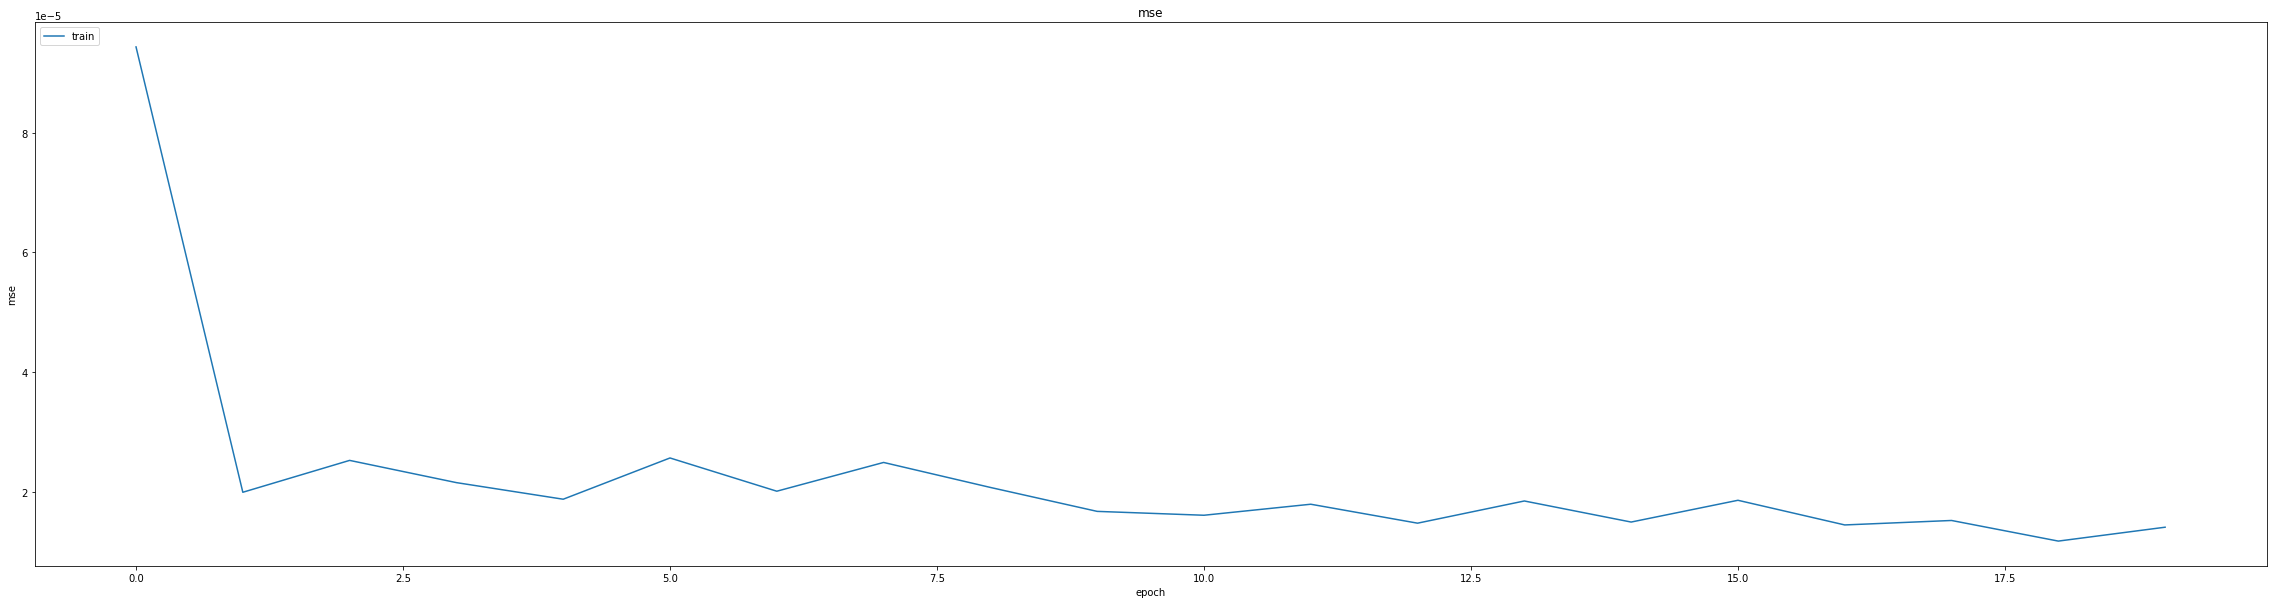

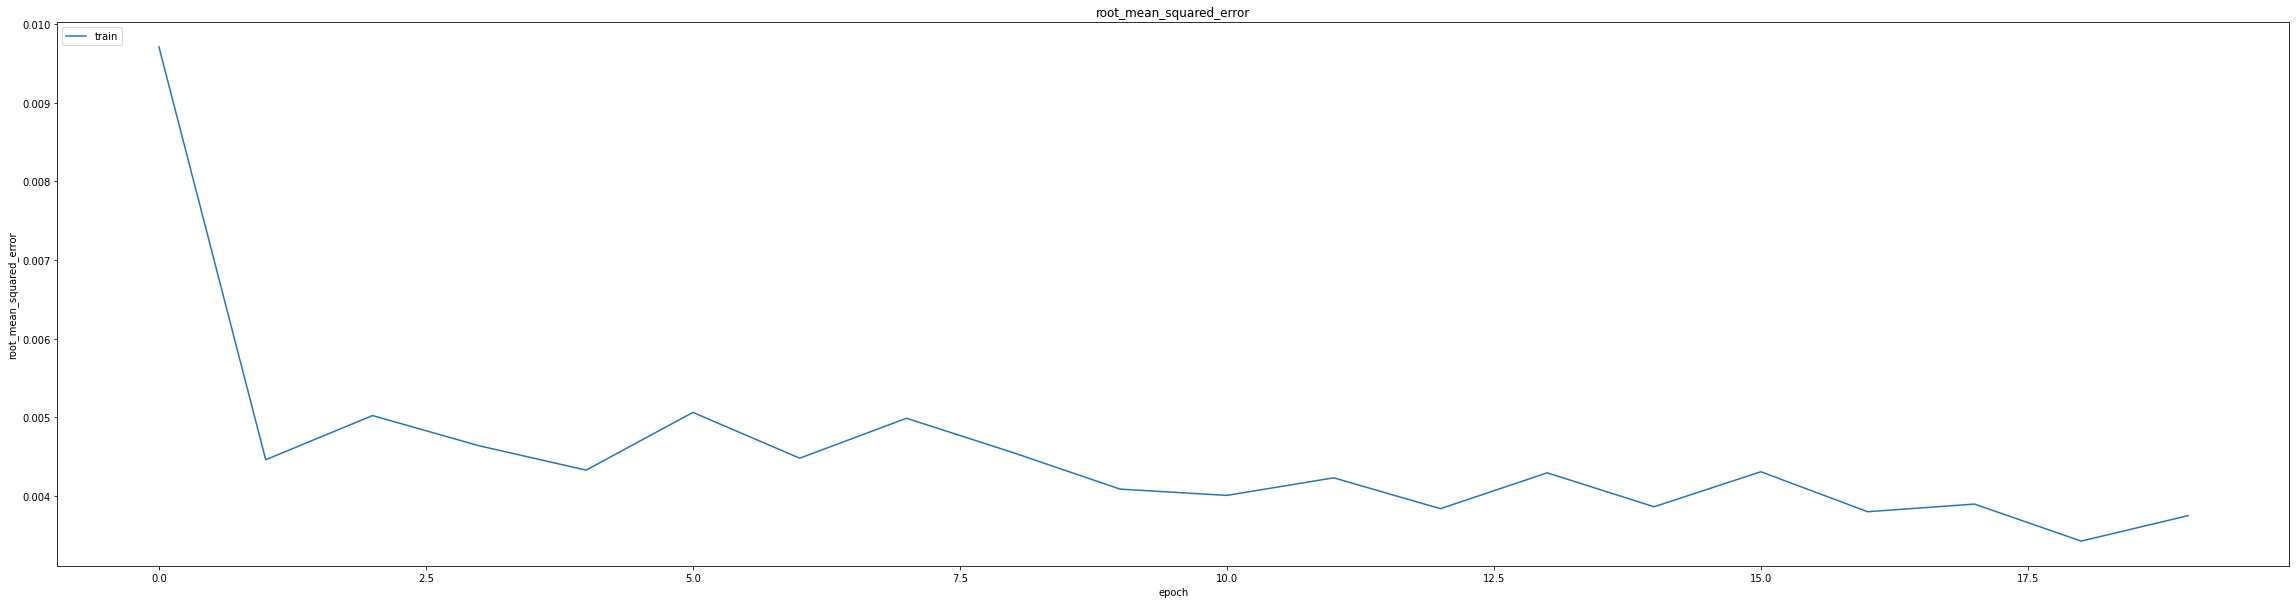

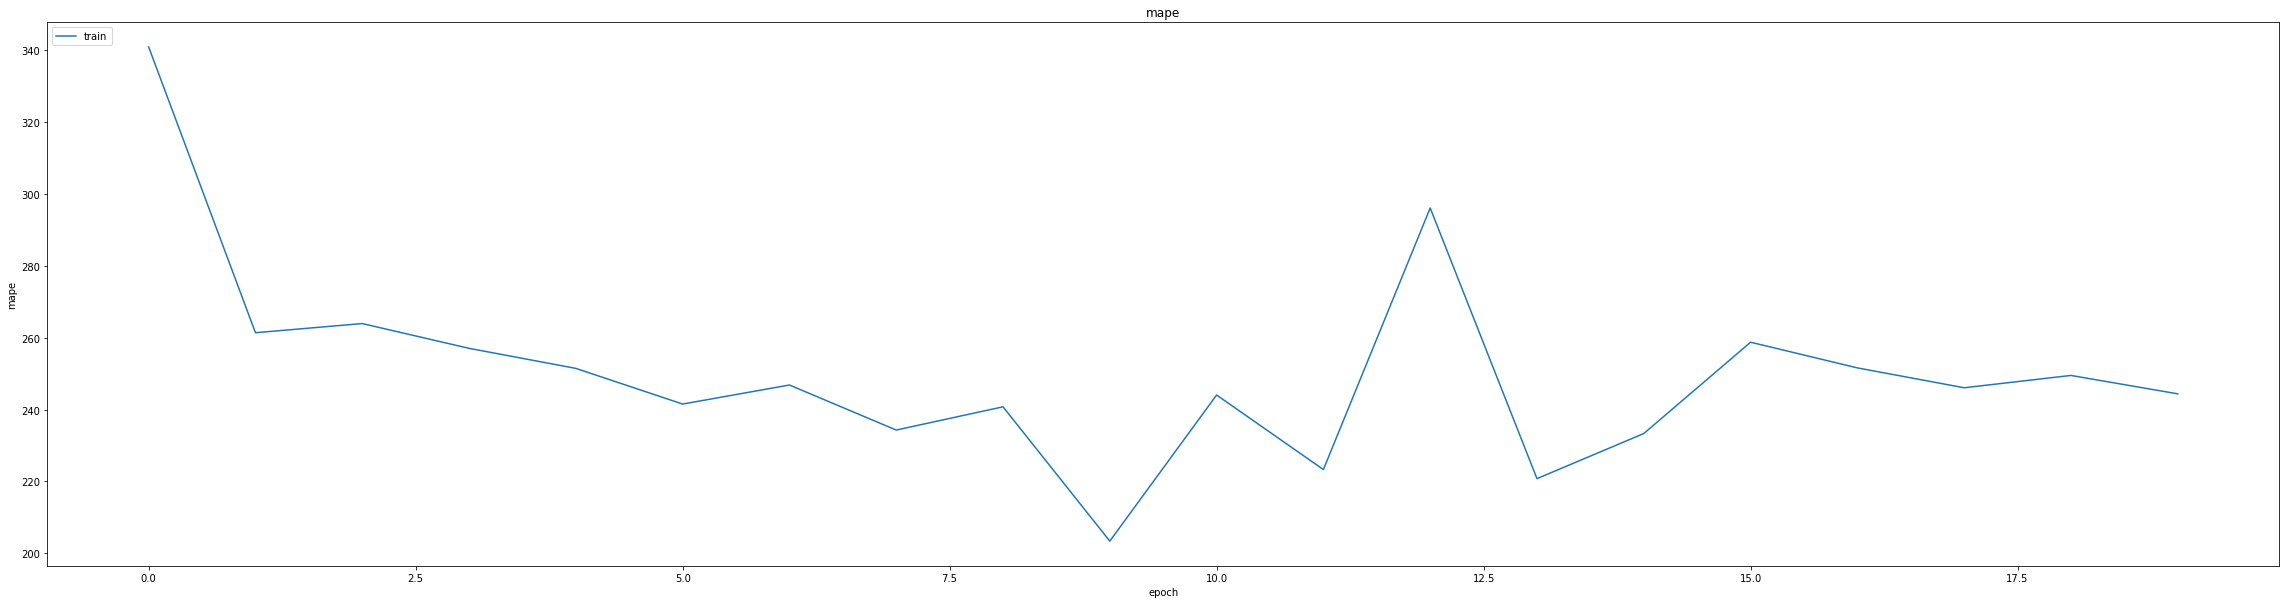

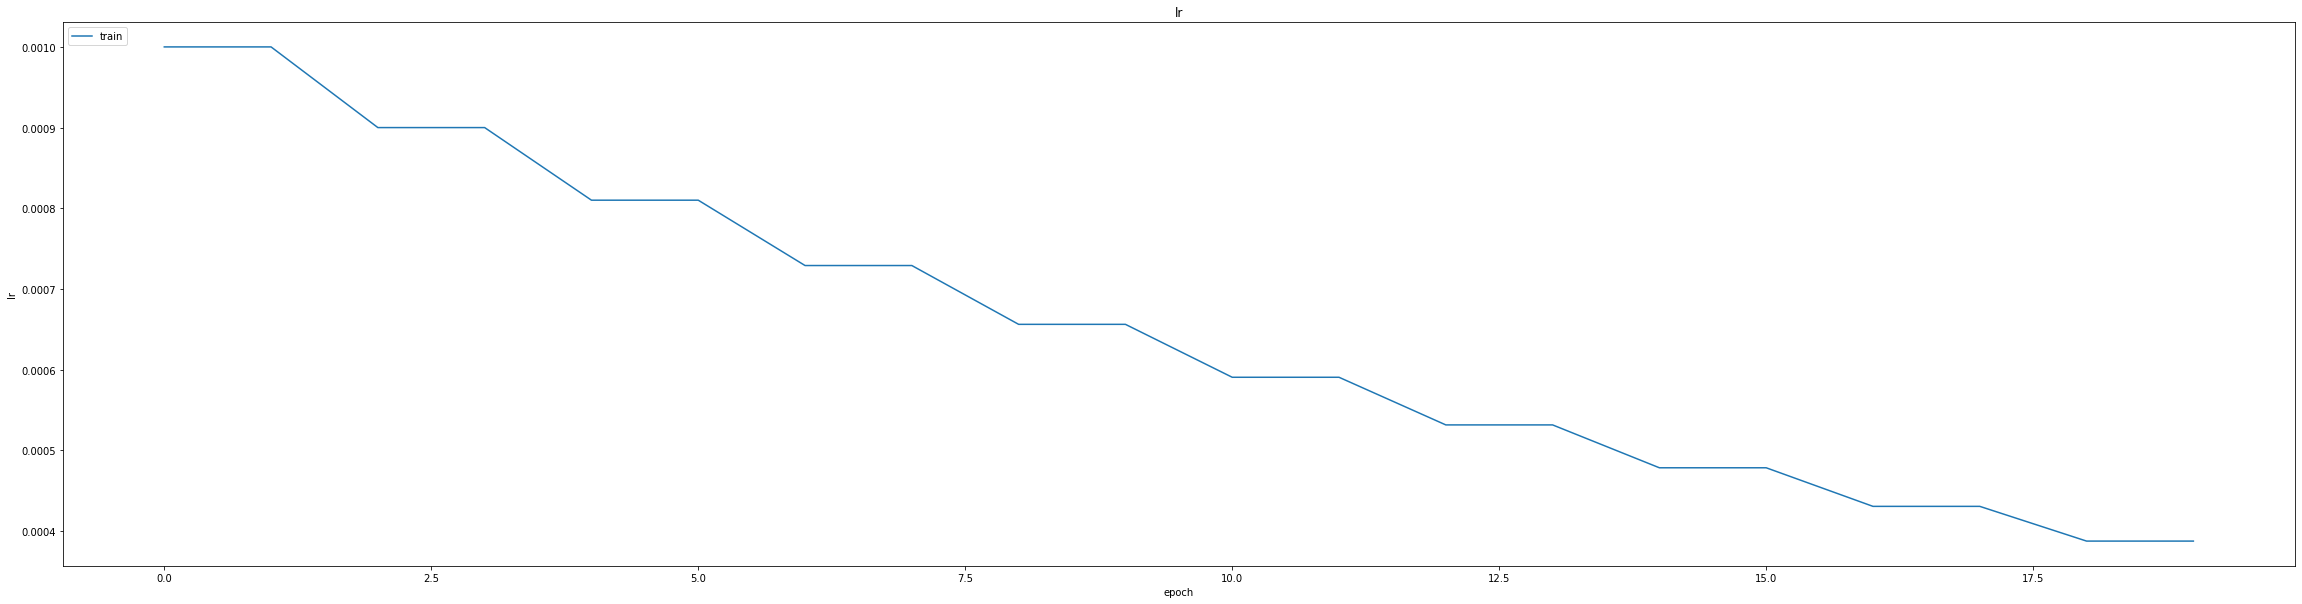

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012621219269931316
0.017257096245884895
234/234 [==============================] - 8s 28ms/step
0.9883269867094873


234/234 [==============================] - 7s 29ms/step


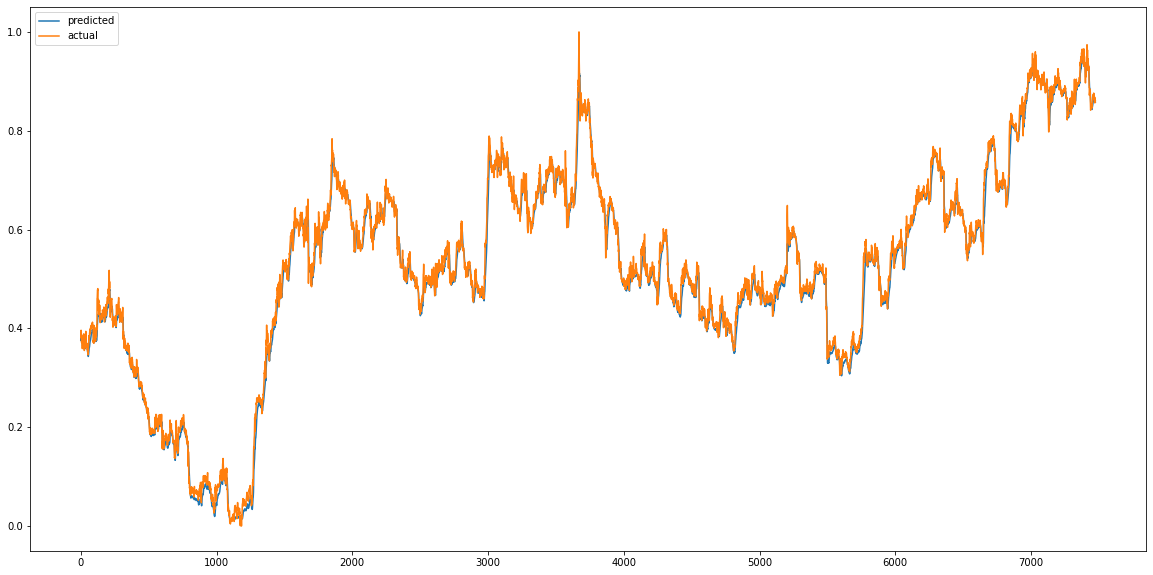

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


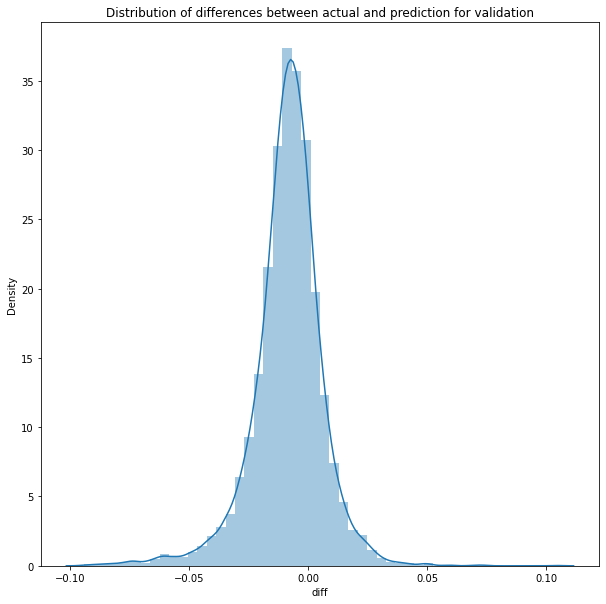

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 7s 29ms/step


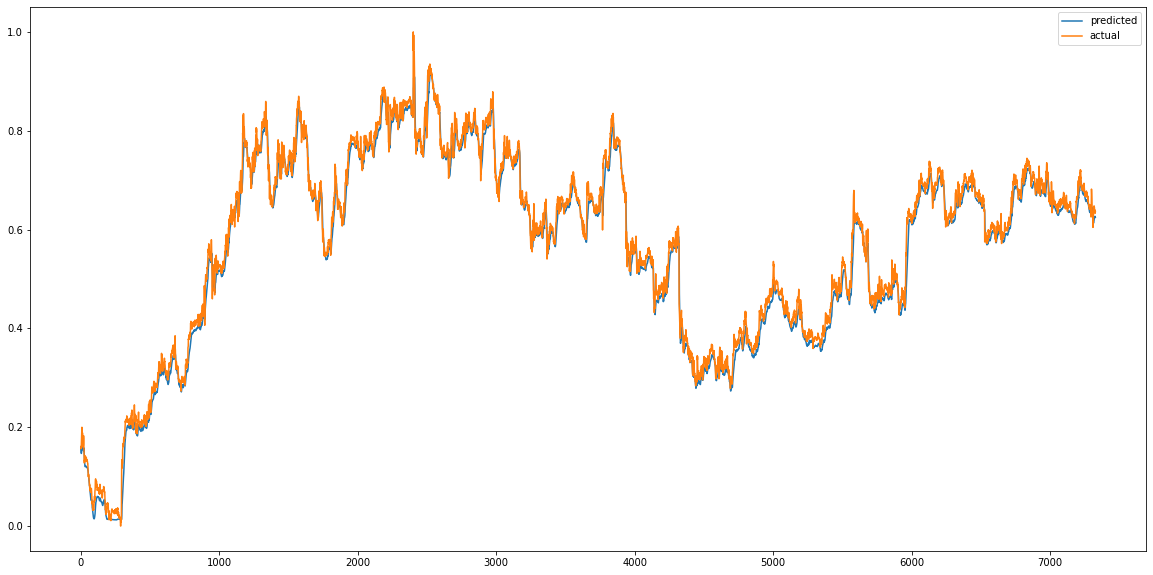

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


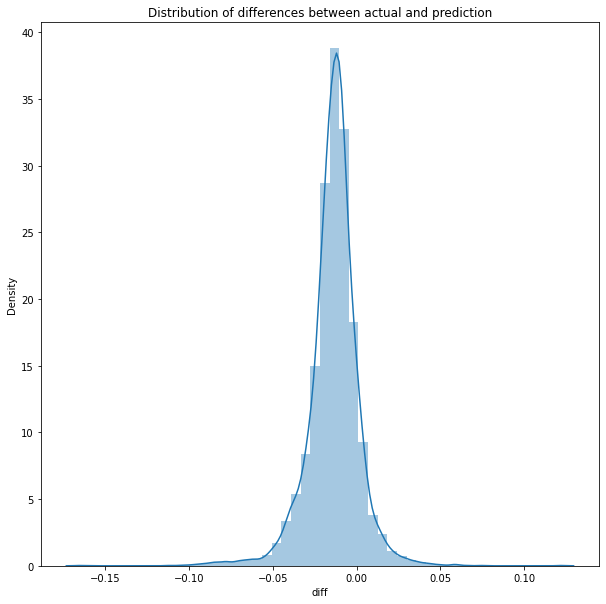

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.000420745033555958
MAE :  0.016077458198633713
RMSE  : 0.020512070435622972
229/229 [==============================] - 7s 29ms/step
R2_Score  : 0.9890651067735723


count    7328.000000
mean       -0.013834
std         0.015146
min        -0.165539
25%        -0.020379
50%        -0.012821
75%        -0.006242
max         0.121776
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value

early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size= 128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 281.2386 - mae: 2.2747 - mse: 281.2386 - root_mean_squared_error: 16.7702 - mape: 23917.1875
Epoch 1: val_mse improved from inf to 0.04839, saving model to weights.best.hdf5
464/464 [==============================] - 140s 292ms/step - loss: 281.2386 - mae: 2.2747 - mse: 281.2386 - root_mean_squared_error: 16.7702 - mape: 23917.1875 - val_loss: 0.0484 - val_mae: 0.1732 - val_mse: 0.0484 - val_root_mean_squared_error: 0.2200 - val_mape: 63847.7227
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0460 - mae: 0.1836 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 7334.4897
Epoch 2: val_mse did not improve from 0.04839
464/464 [==============================] - 132s 285ms/step - loss: 0.0460 - mae: 0.1836 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 7334.4897 - val_loss: 0.0618 - val_mae: 0.2087 - val_mse: 0.0618 - val_root_mean_squared_error: 0.2487 - val_mape: 53297.7812
Epoch 3

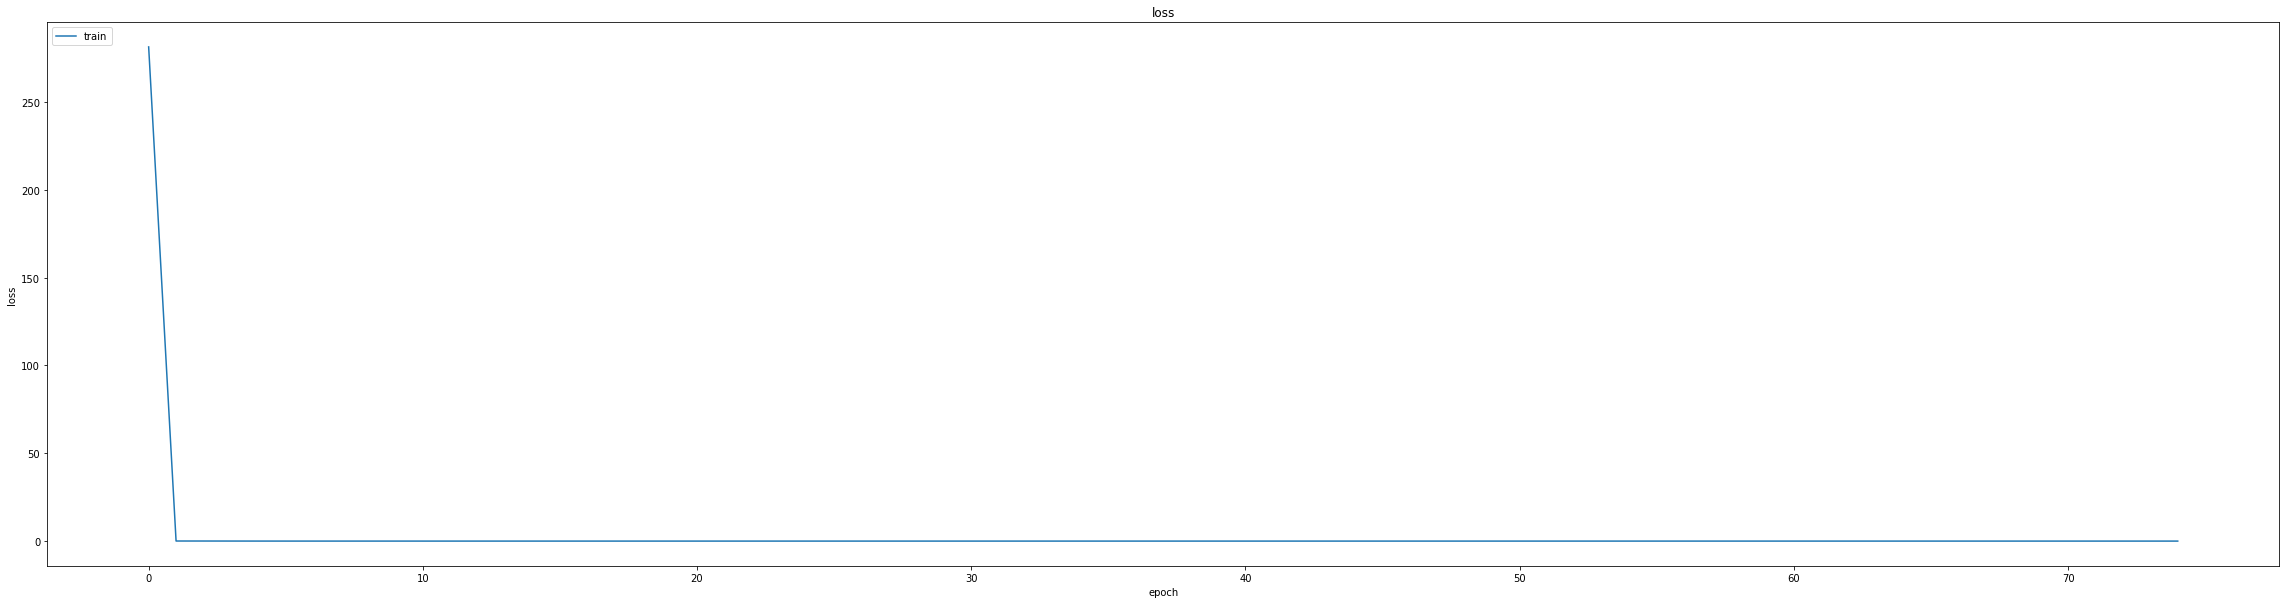

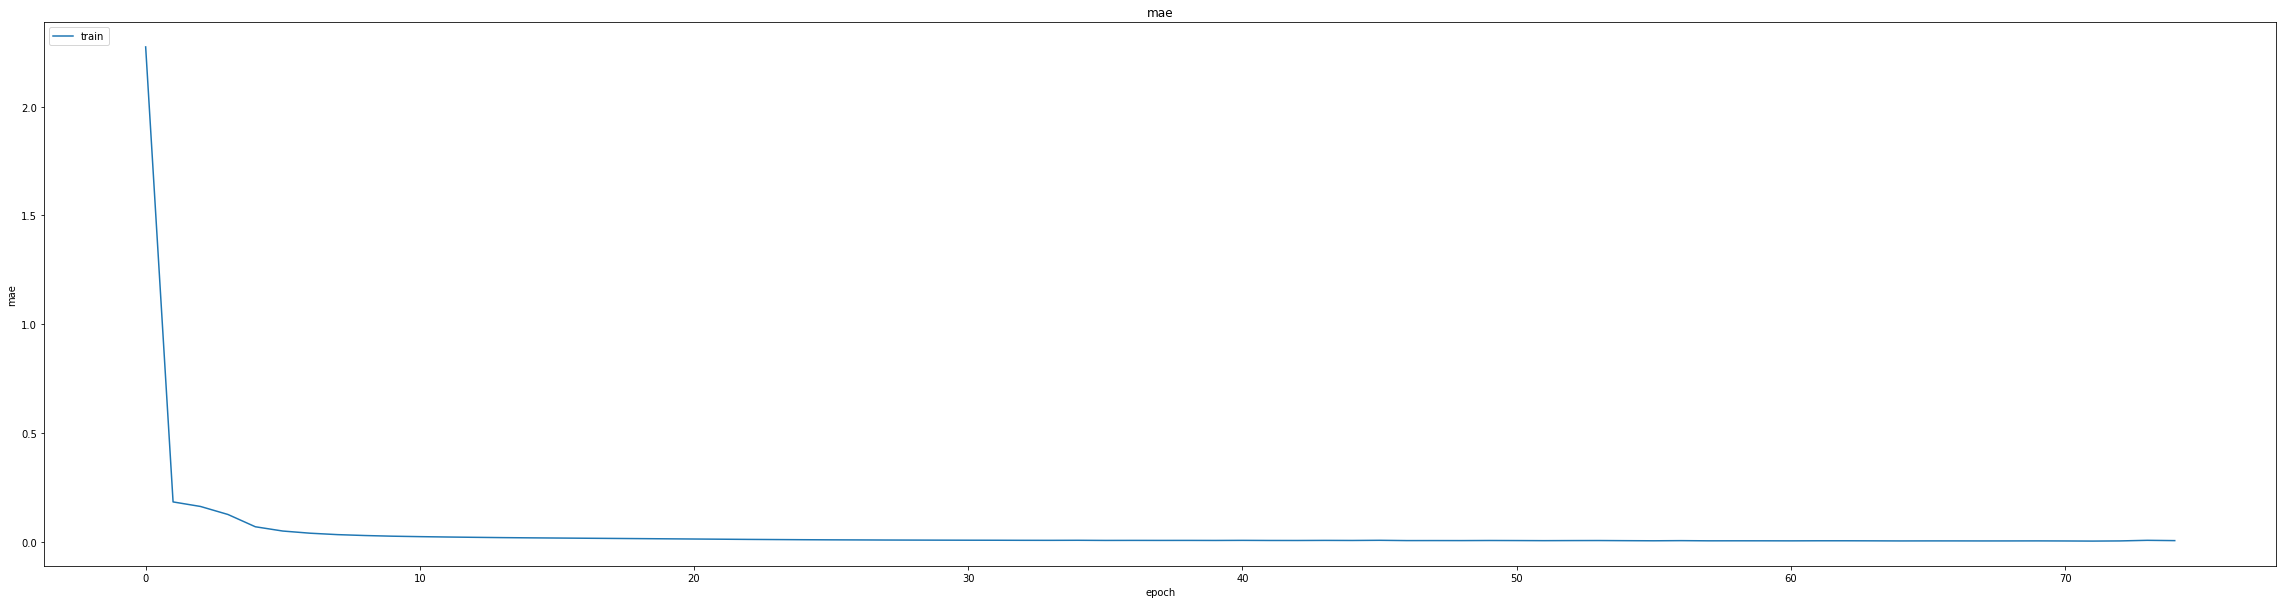

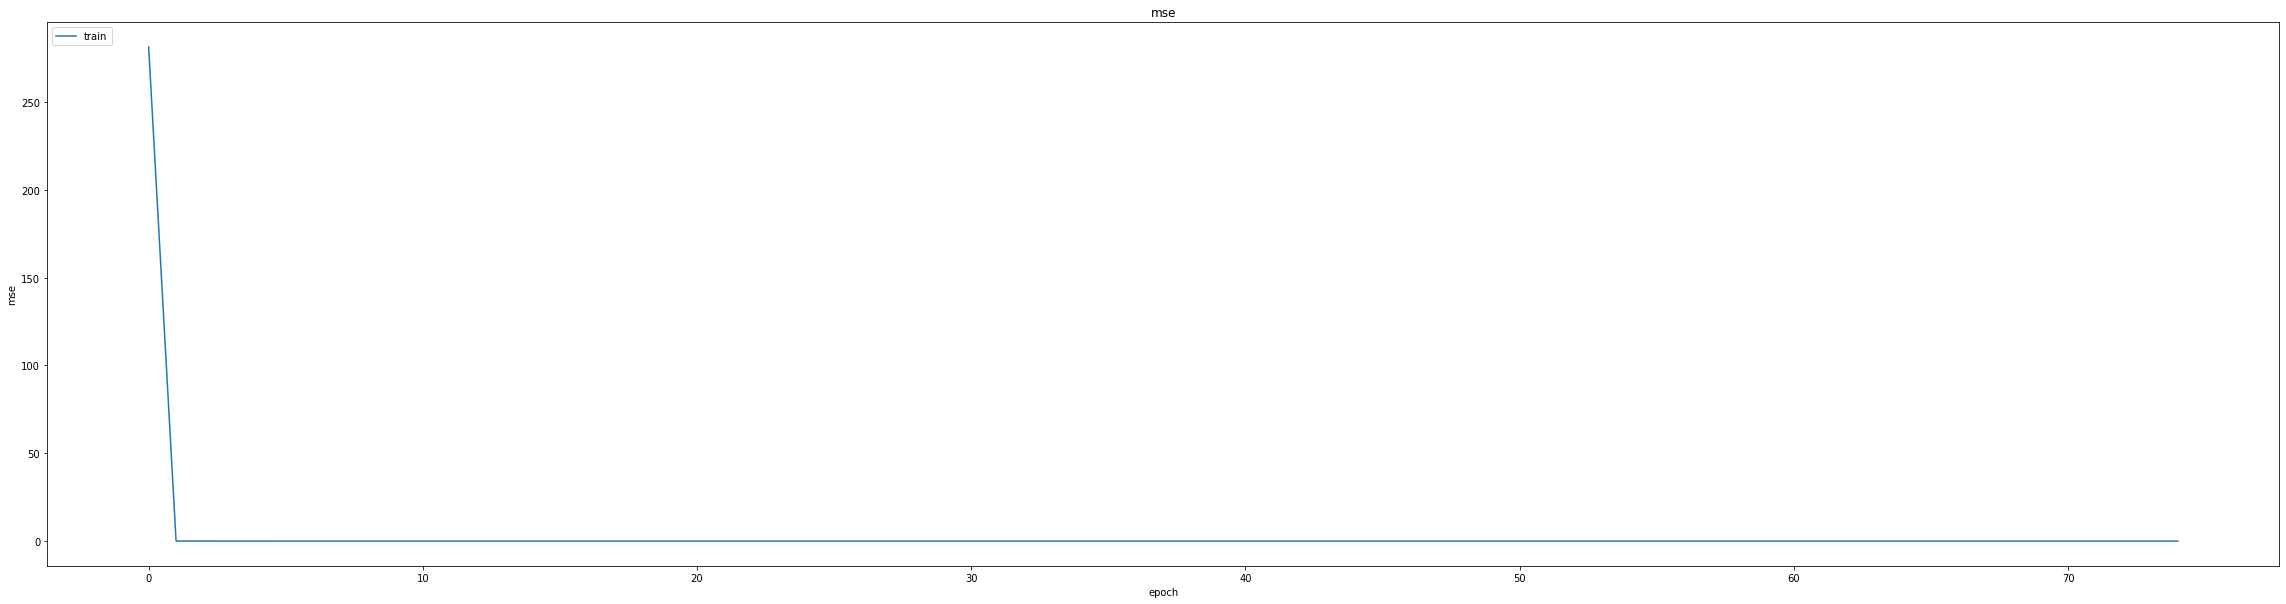

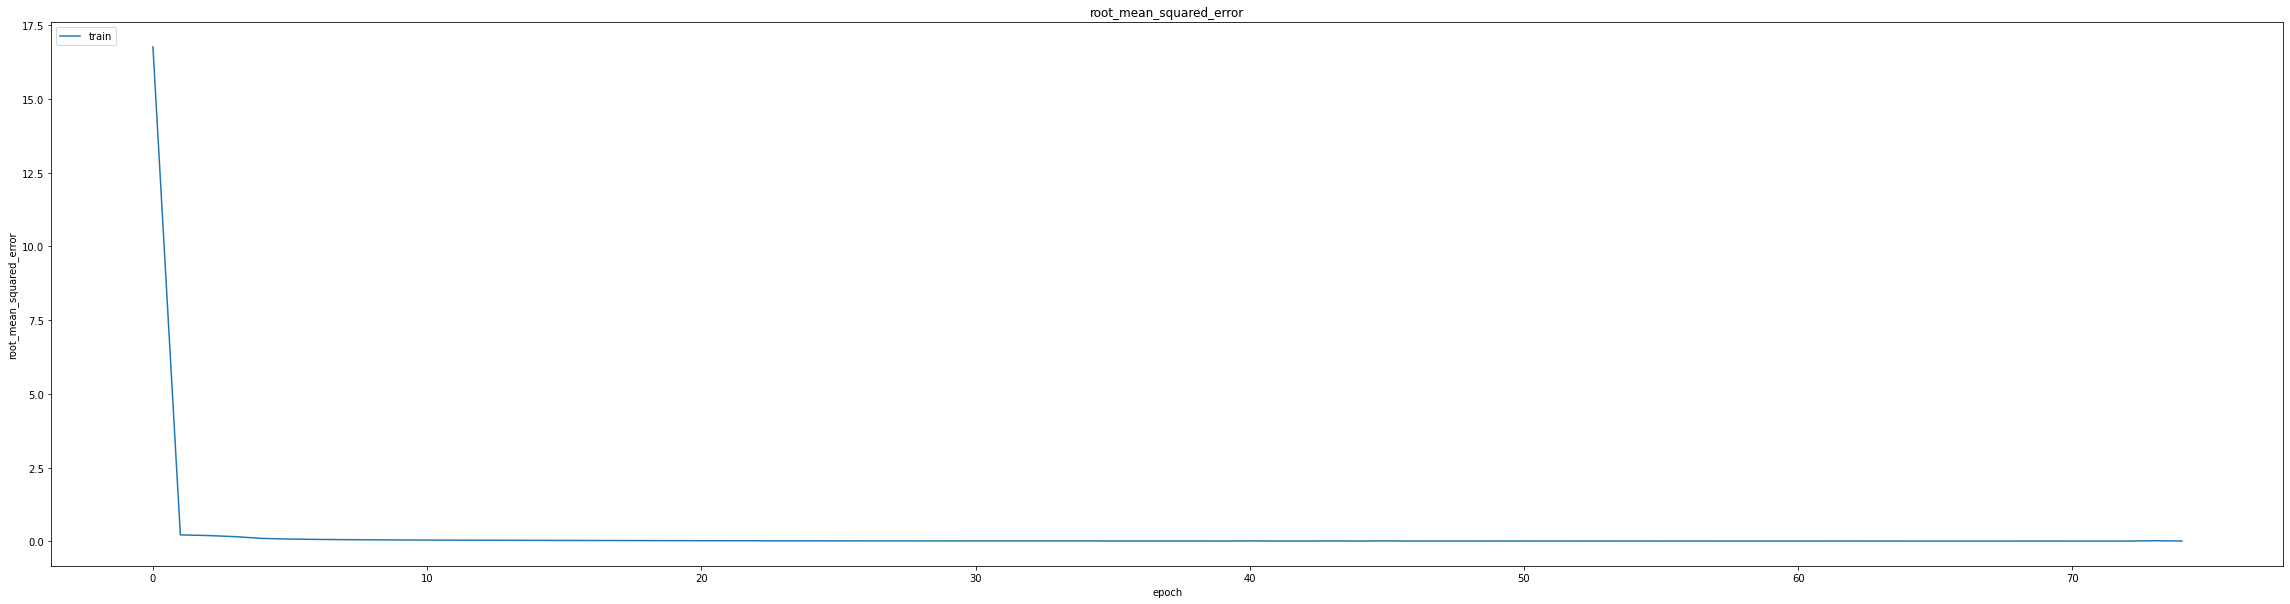

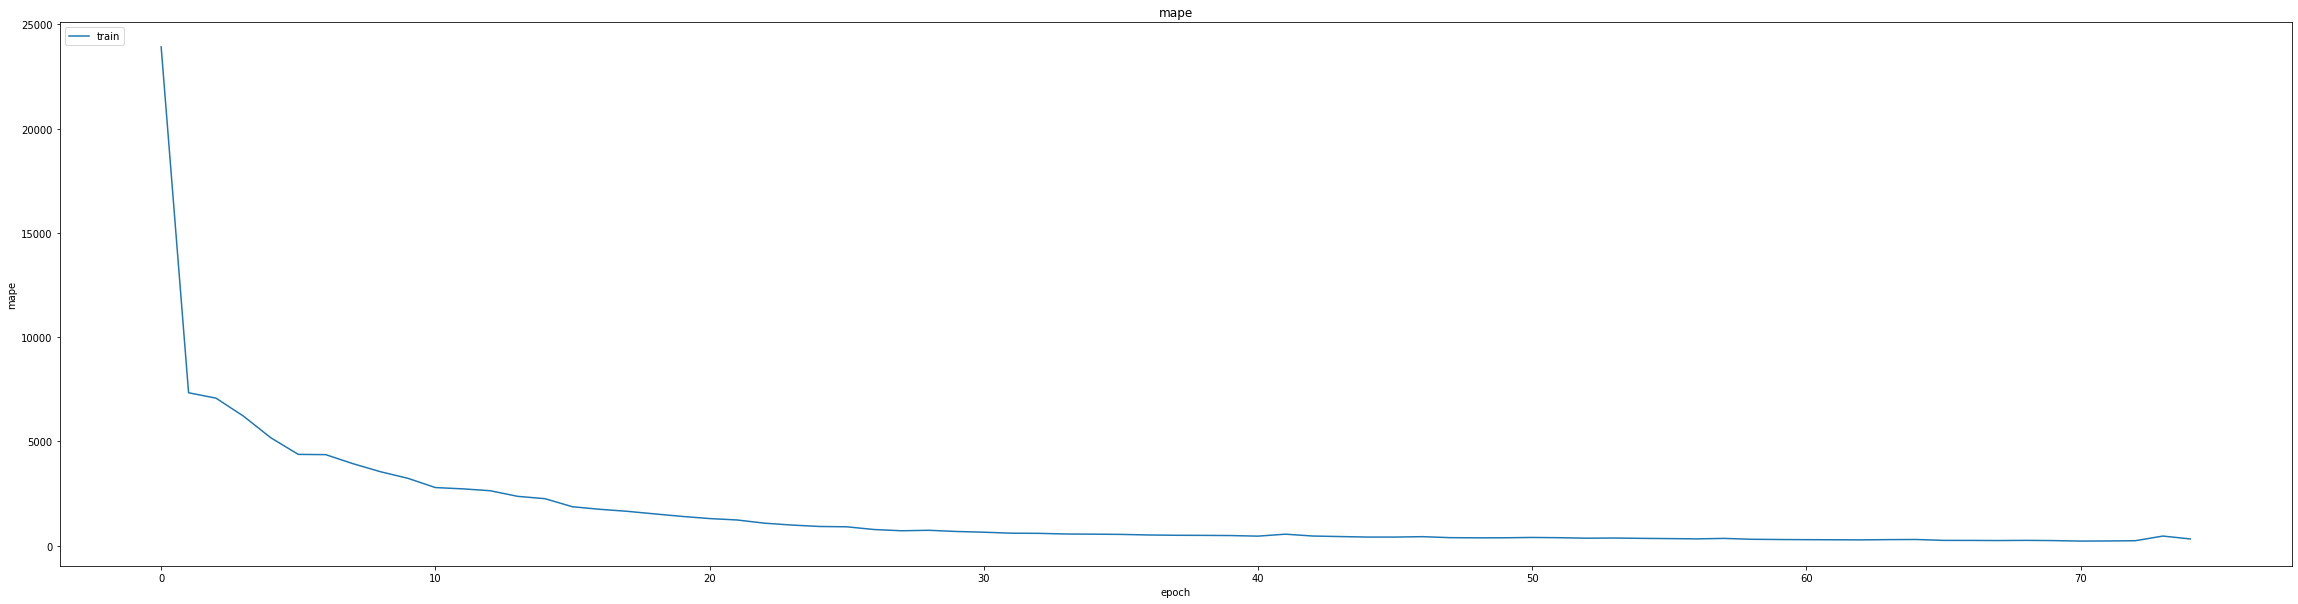

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009852222166955471
0.013717195019125938
234/234 [==============================] - 10s 40ms/step
0.989671735579251


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

In [ ]:
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.0707e-04 - mae: 0.0048 - mse: 1.0707e-04 - root_mean_squared_error: 0.0103 - mape: 216.6543
Epoch 1: val_mse did not improve from 0.00019
464/464 [==============================] - 142s 298ms/step - loss: 1.0707e-04 - mae: 0.0048 - mse: 1.0707e-04 - root_mean_squared_error: 0.0103 - mape: 216.6543 - val_loss: 2.6910e-04 - val_mae: 0.0125 - val_mse: 2.6910e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 2172.9116 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.9378e-05 - mae: 0.0033 - mse: 1.9378e-05 - root_mean_squared_error: 0.0044 - mape: 207.9485
Epoch 2: val_mse did not improve from 0.00019
464/464 [==============================] - 139s 300ms/step - loss: 1.9378e-05 - mae: 0.0033 - mse: 1.9378e-05 - root_mean_squared_error: 0.0044 - mape: 207.9485 - val_loss: 2.4319e-04 - val_mae: 0.0119 - val_mse: 2.4319e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 2359.2517

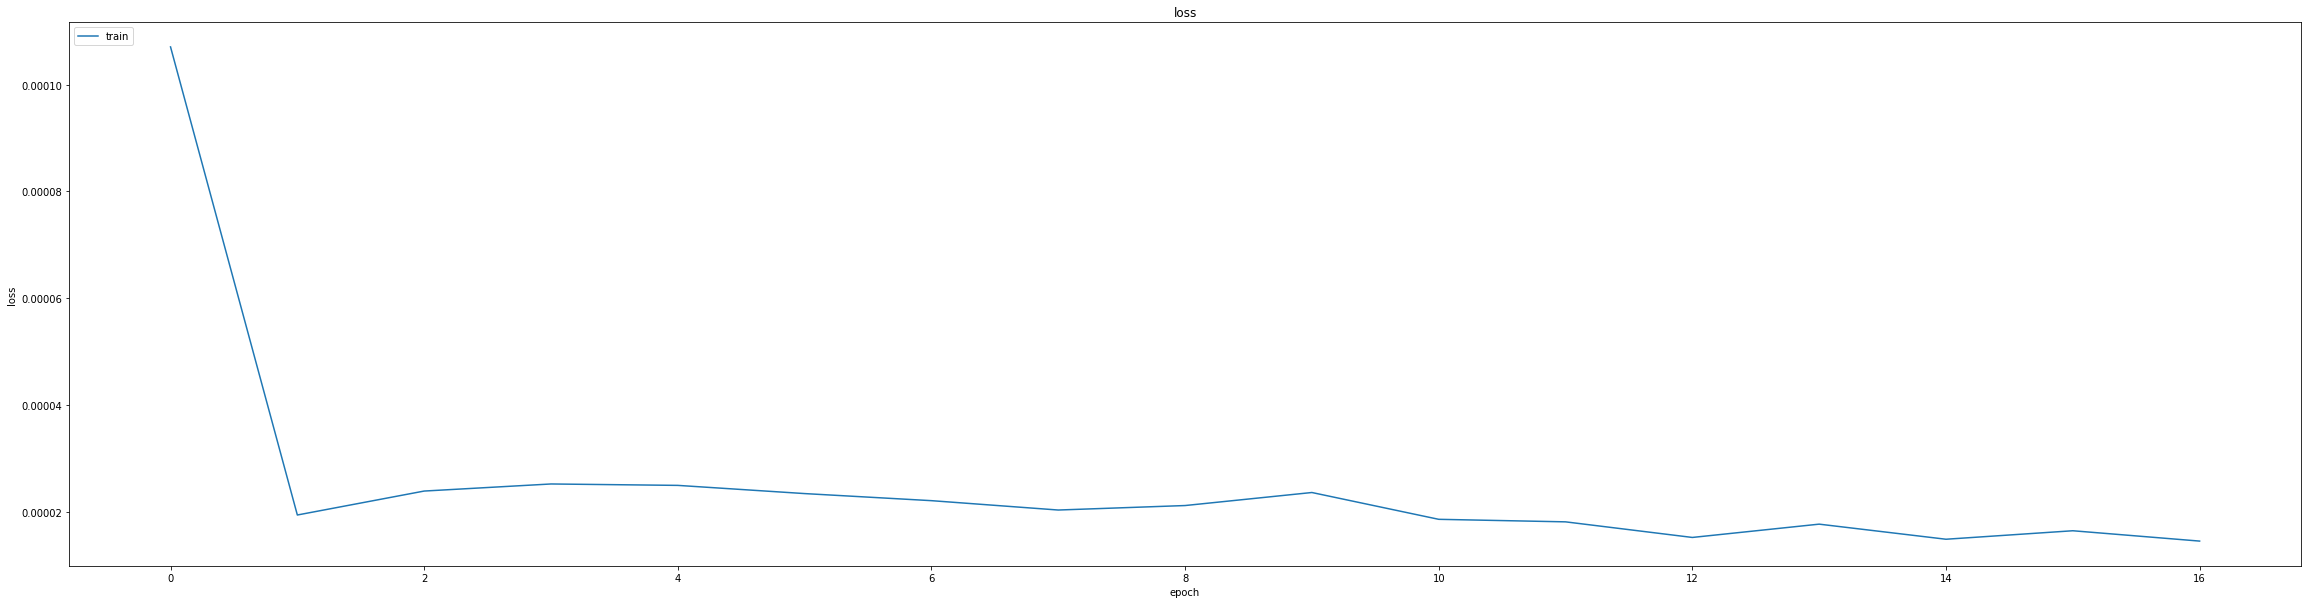

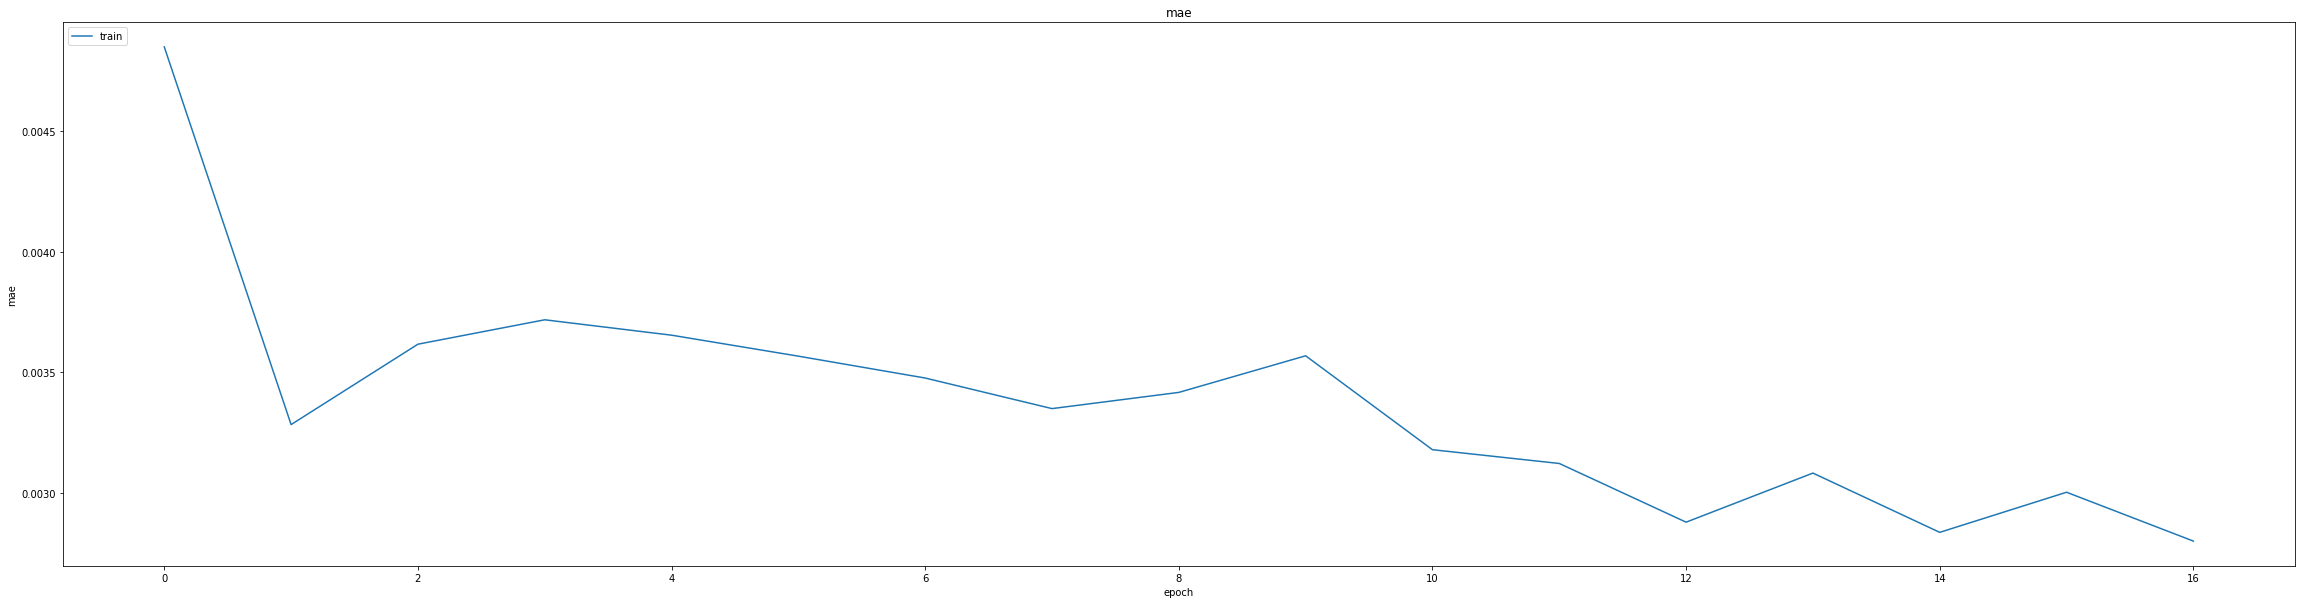

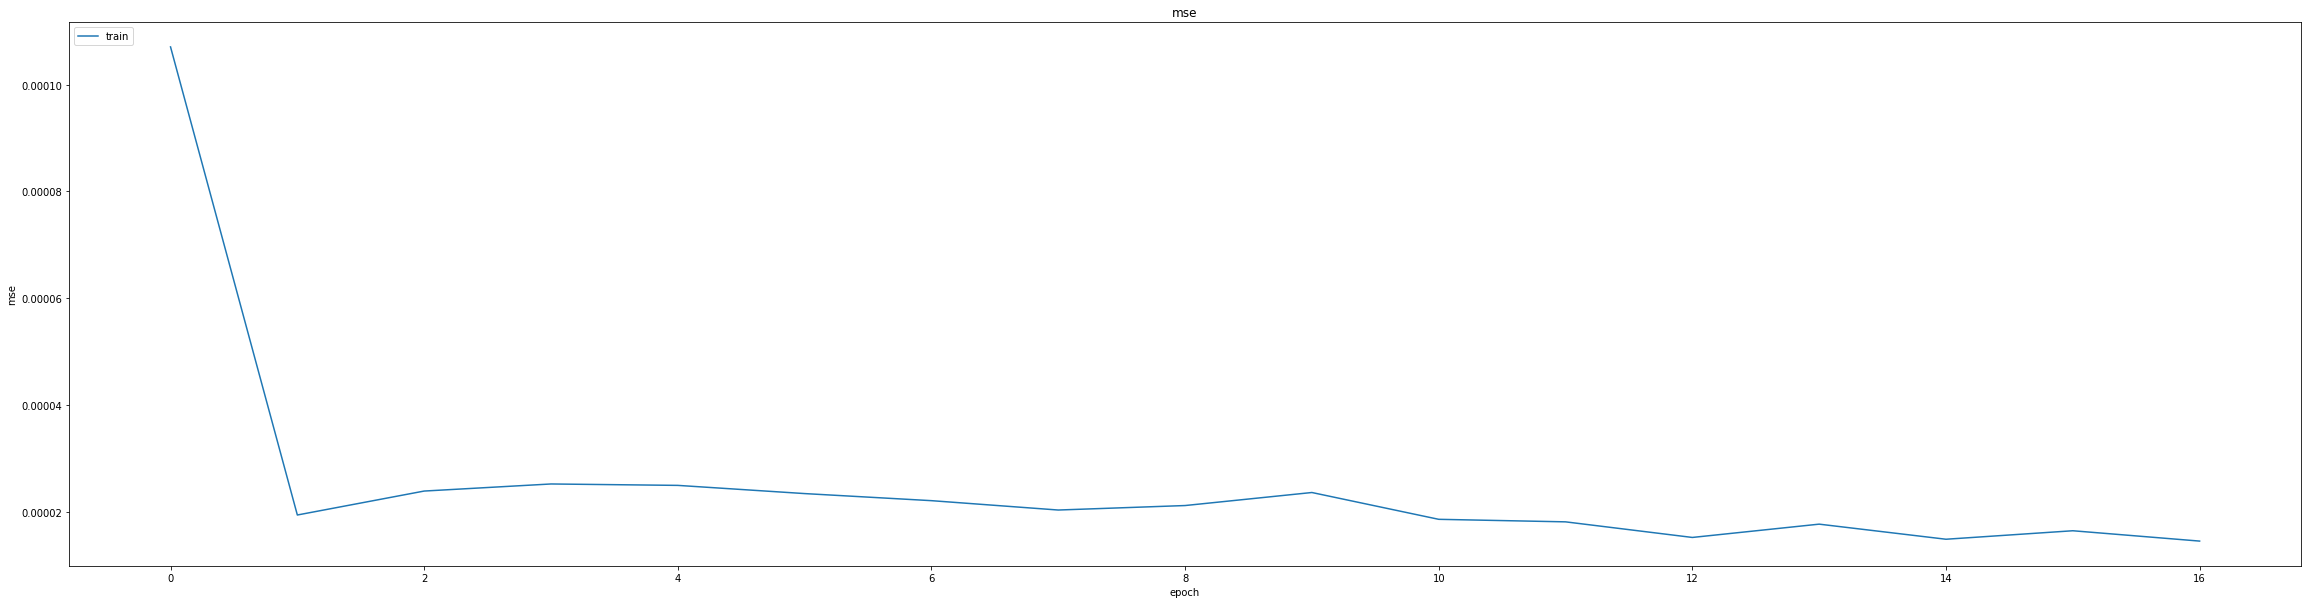

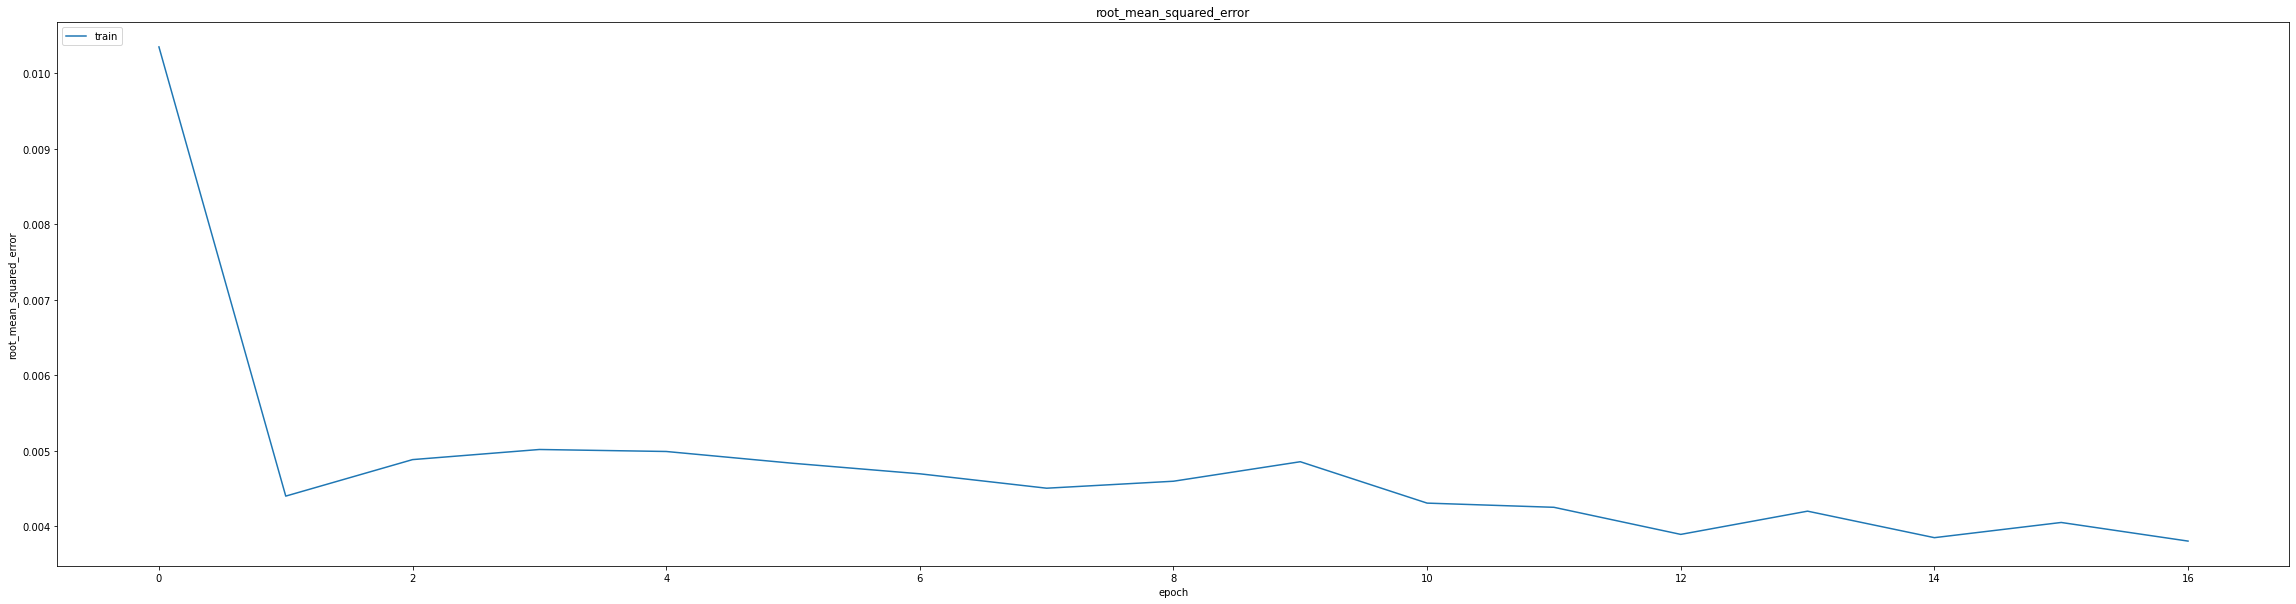

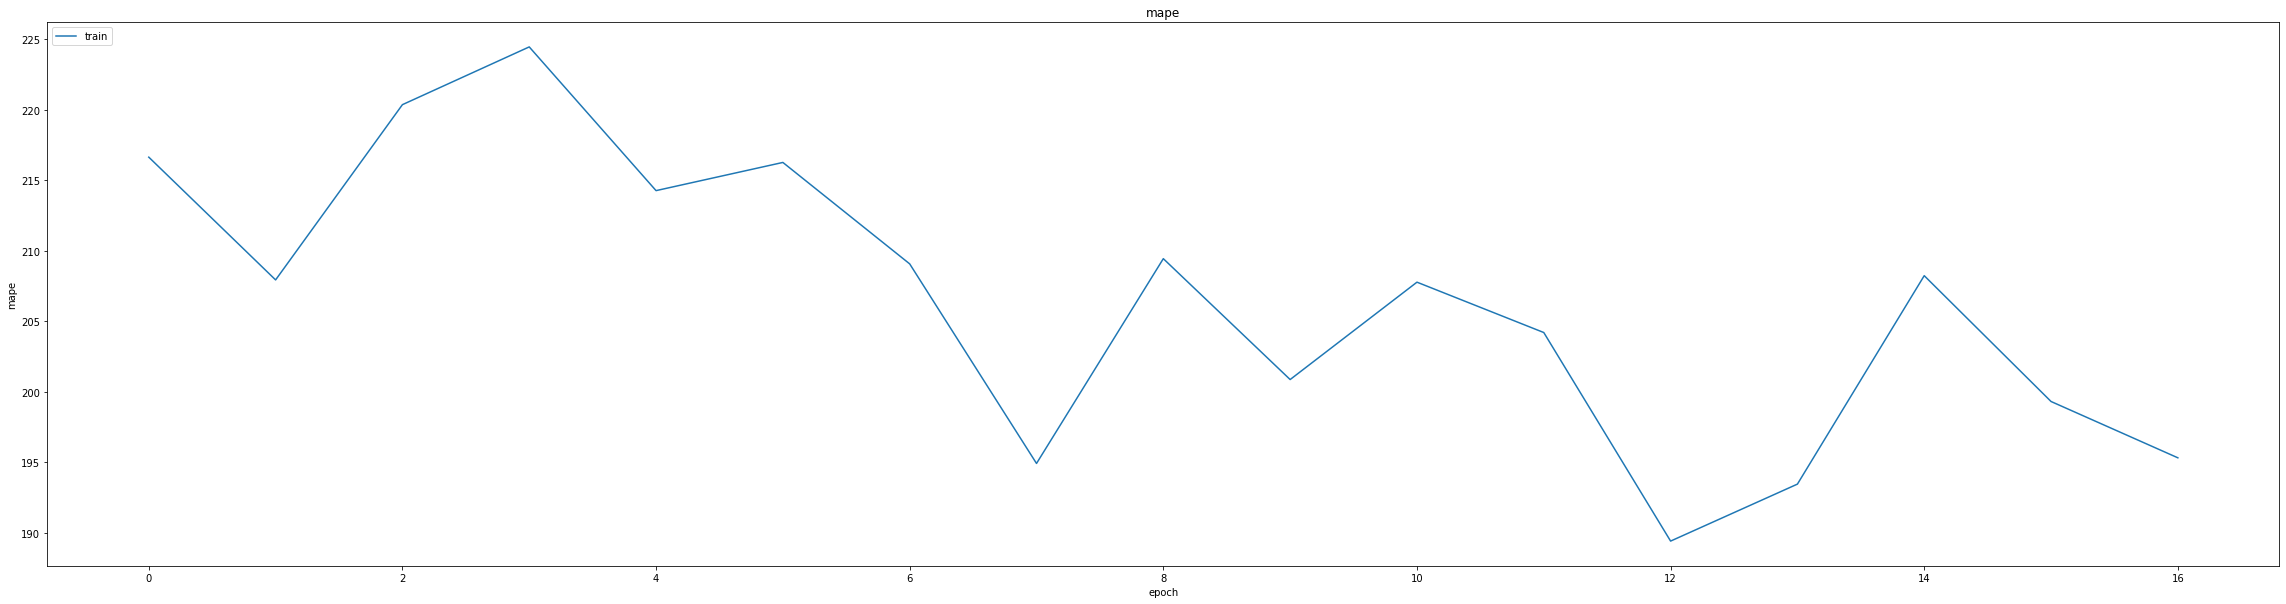

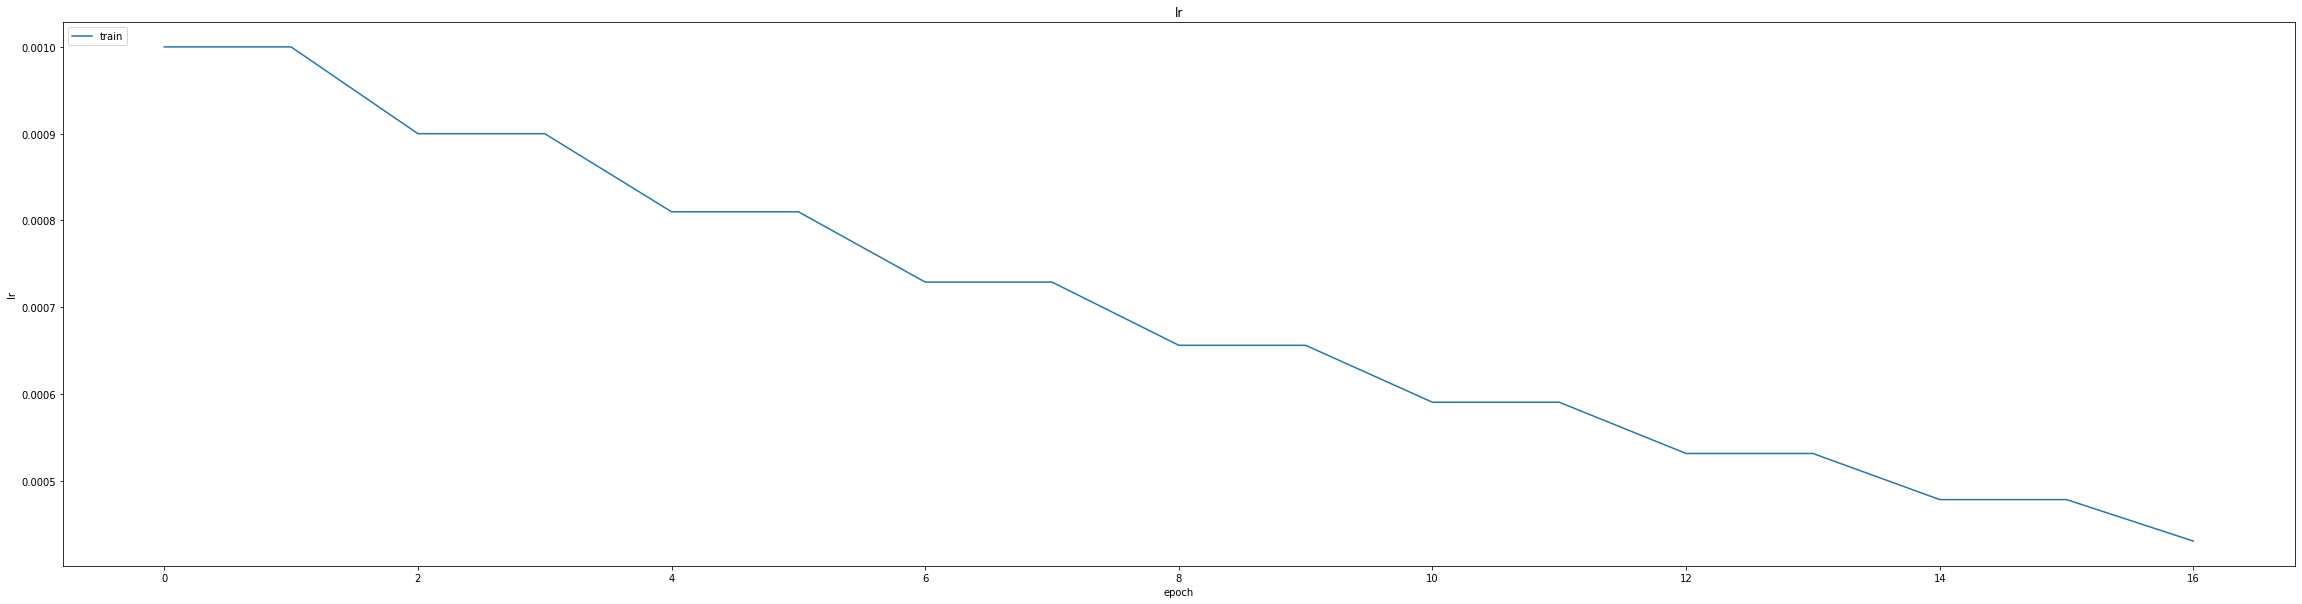

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009451397694647312
0.01320744026452303
234/234 [==============================] - 10s 40ms/step
0.9932729887919735


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 10s 45ms/step


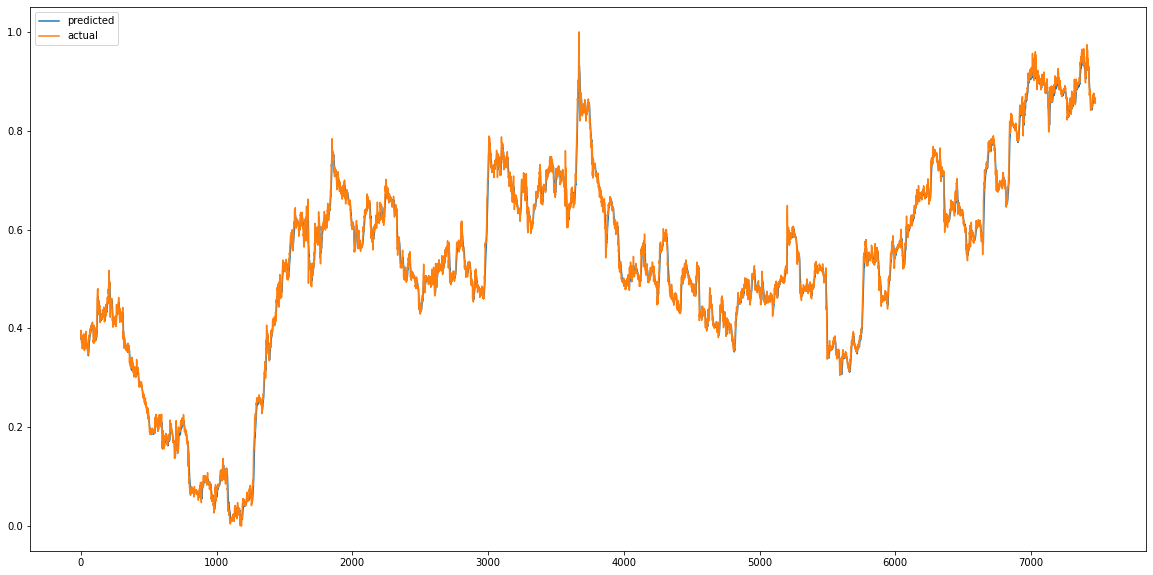

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


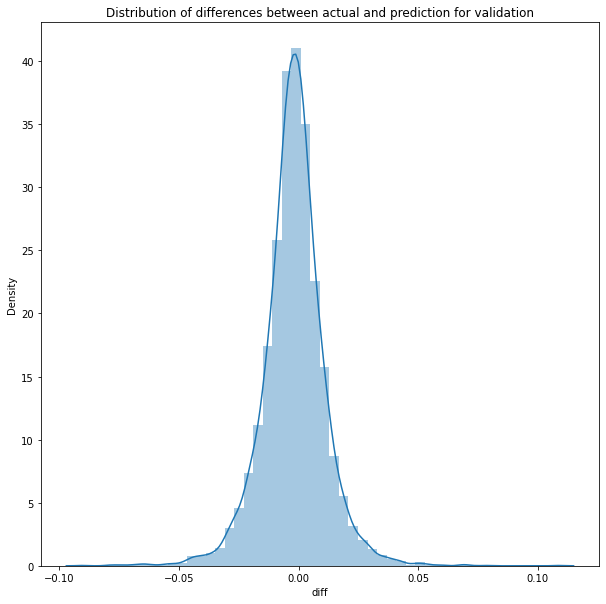

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 12s 55ms/step


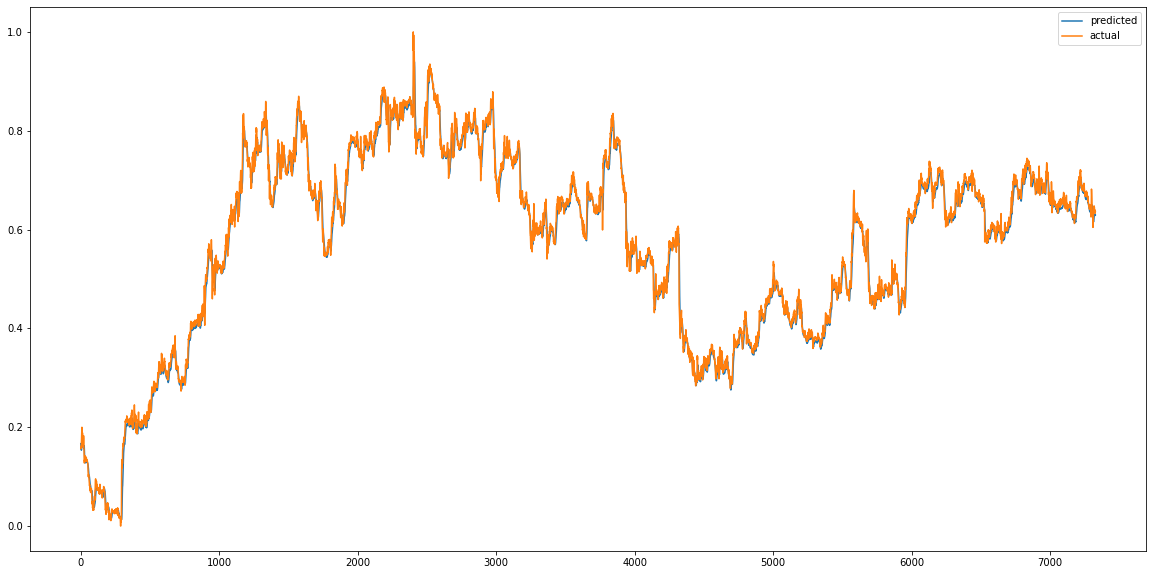

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


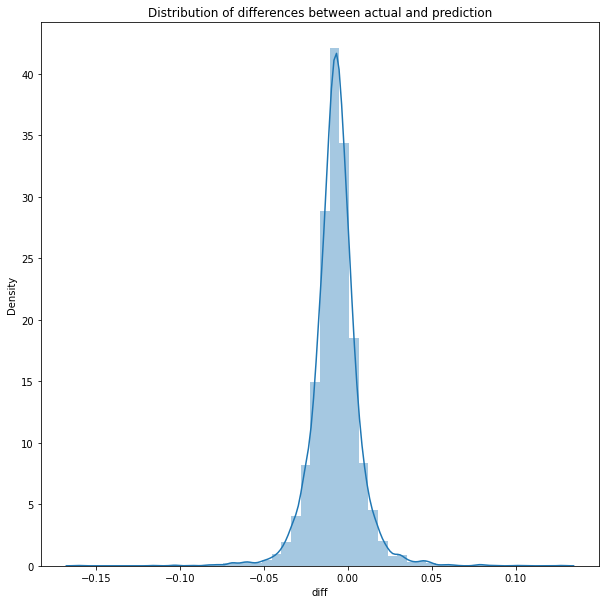

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print(test_r2_scr)

predictions['diff'].describe()

MSE :  0.00024601429826834136
MAE :  0.011504248898948124
229/229 [==============================] - 9s 40ms/step
0.9936062463709721


count    7328.000000
mean       -0.007281
std         0.013894
min        -0.160550
25%        -0.013811
50%        -0.007165
75%        -0.000606
max         0.127481
Name: diff, dtype: float64